importing  the  necessary libraries and frameworks 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing the dataset

In [2]:
data=pd.read_csv('D:\PROJECTS\project csv files\Electric_Vehicle_Population_Data.csv')
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194227,5YJYGDEE1M,Franklin,Pasco,WA,99301.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,179707937,POINT (-119.1429639 46.2546529),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
194228,5YJ3E1EA7P,Clallam,Sequim,WA,98382.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,24.0,241584416,POINT (-123.1090862 48.0805816),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
194229,5YJ3E1EB6P,Snohomish,Everett,WA,98208.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,38.0,249701056,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
194230,5YJ3E1EA5K,King,Issaquah,WA,98029.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,5.0,106197619,POINT (-122.0209893 47.5632565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


checking the null values in the dataset

In [3]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 9
City                                                   9
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         2
Base MSRP                                              2
Legislative District                                 432
DOL Vehicle ID                                         0
Vehicle Location                                      13
Electric Utility                                       9
2020 Census Tract                                      9
dtype: int64

check for the duplicate rows

In [4]:
data.duplicated().sum()

0

How many BEVs and PHEVs are registered in Washington State?

In [5]:
vriw=data.groupby('State')['Electric Vehicle Type'].count().sum()
vriw

194232

What is the distribution of BEVs and PHEVs across different counties in Washington State?

In [6]:
doepiw=data['County'].value_counts()
print(doepiw)
doepiws=doepiw.values.sum()
print(doepiws)

County
King            100061
Snohomish        23117
Pierce           15257
Clark            11517
Thurston          7076
                 ...  
Sarpy                1
Brown                1
San Joaquin          1
Rockdale             1
Williamsburg         1
Name: count, Length: 198, dtype: int64
194223


graphical distribution of BEVs and PHEVs across different counties in Washington State

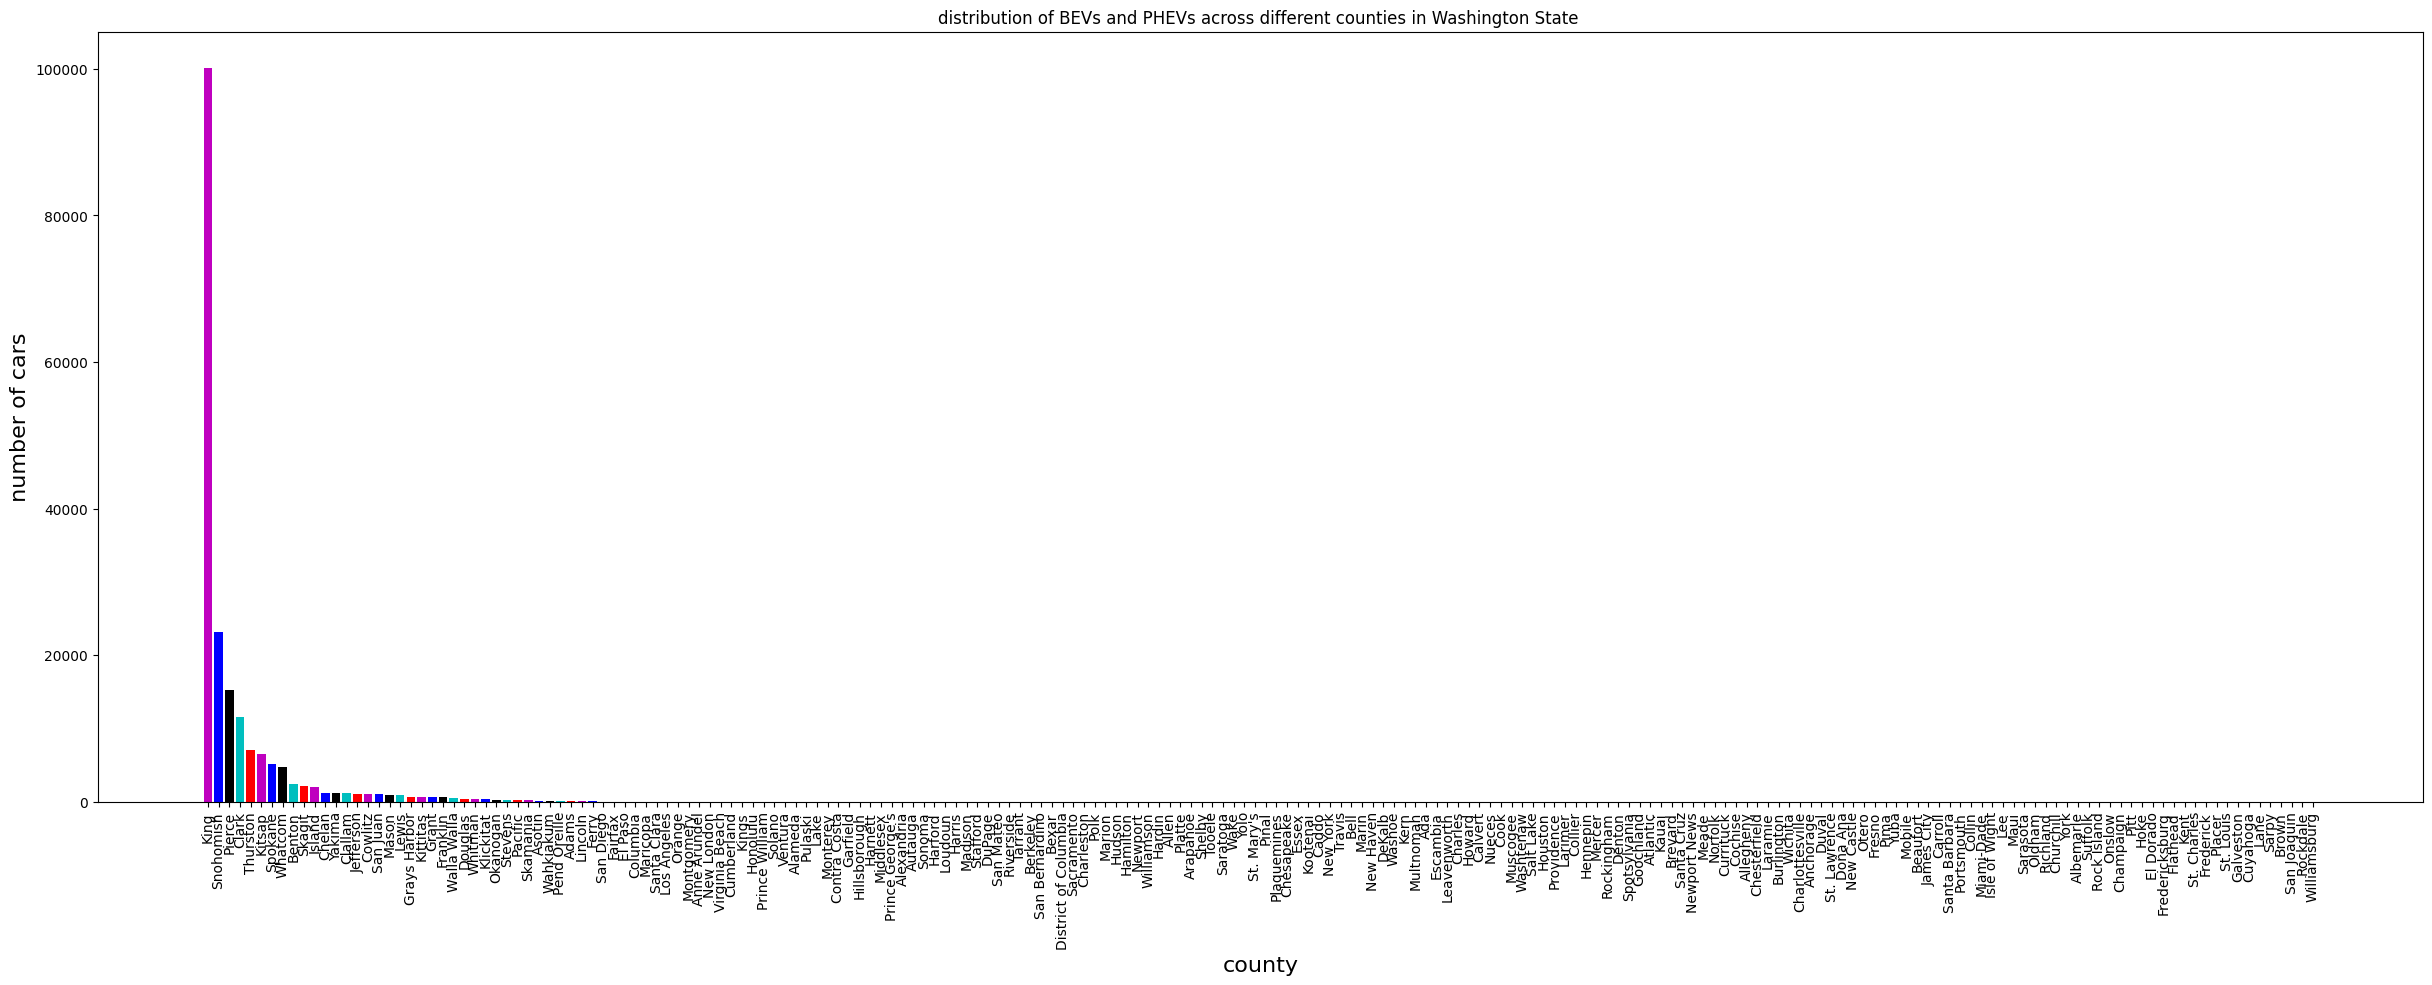

In [7]:
plt.figure(figsize=(30, 10))
plt.bar(doepiw.index,doepiw.values,color=['m','b','k','c','r'])
plt.xlabel("county",size=16)
plt.ylabel(" number of cars ",size=16)
plt.xticks(rotation=90,size=10)
plt.title(f"distribution of BEVs and PHEVs across different counties in Washington State ")
plt.show()

What are the top 10 counties of Washington with the highest number of BEVs and PHEVs registrations?

In [8]:
tdoepiw=data['County'].value_counts()[:10]
print(tdoepiw)
#tdoepiws=tdoepiw.values.sum()
#print(tdoepiws)

County
King         100061
Snohomish     23117
Pierce        15257
Clark         11517
Thurston       7076
Kitsap         6488
Spokane        5103
Whatcom        4688
Benton         2372
Skagit         2115
Name: count, dtype: int64


 graphical representation of the top 10 counties of Washington with the highest number of BEVs and PHEVs registrations

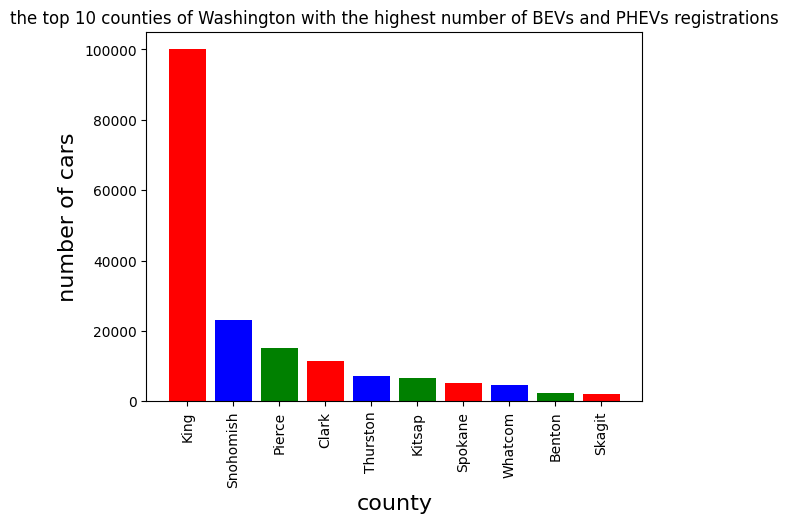

In [9]:

plt.bar(tdoepiw.index,tdoepiw.values,color=['r','b','g'])
plt.xlabel("county",size=16)
plt.ylabel(" number of cars ",size=16)
plt.xticks(rotation=90,size=10)
plt.title(f"the top 10 counties of Washington with the highest number of BEVs and PHEVs registrations")
plt.show()

Which manufacturers have the highest number of BEVs registered?

In [10]:
becc=data[data['Electric Vehicle Type']=="Battery Electric Vehicle (BEV)"]['Make'].value_counts()
becc

Make
TESLA             85320
NISSAN            14360
CHEVROLET          9745
FORD               6539
KIA                5869
VOLKSWAGEN         5483
RIVIAN             4912
HYUNDAI            4433
BMW                2969
AUDI               2463
VOLVO              1490
MERCEDES-BENZ      1431
POLESTAR           1039
SUBARU             1004
FIAT                793
MINI                778
TOYOTA              708
PORSCHE             694
CADILLAC            542
LEXUS               294
LUCID               265
SMART               259
GENESIS             239
JAGUAR              234
FISKER              172
MITSUBISHI           60
HONDA                38
GMC                  17
ACURA                 8
MAZDA                 7
TH!NK                 5
AZURE DYNAMICS        5
ROLLS-ROYCE           2
RAM                   2
Name: count, dtype: int64

manufacturers have the highest number of BEVs registered

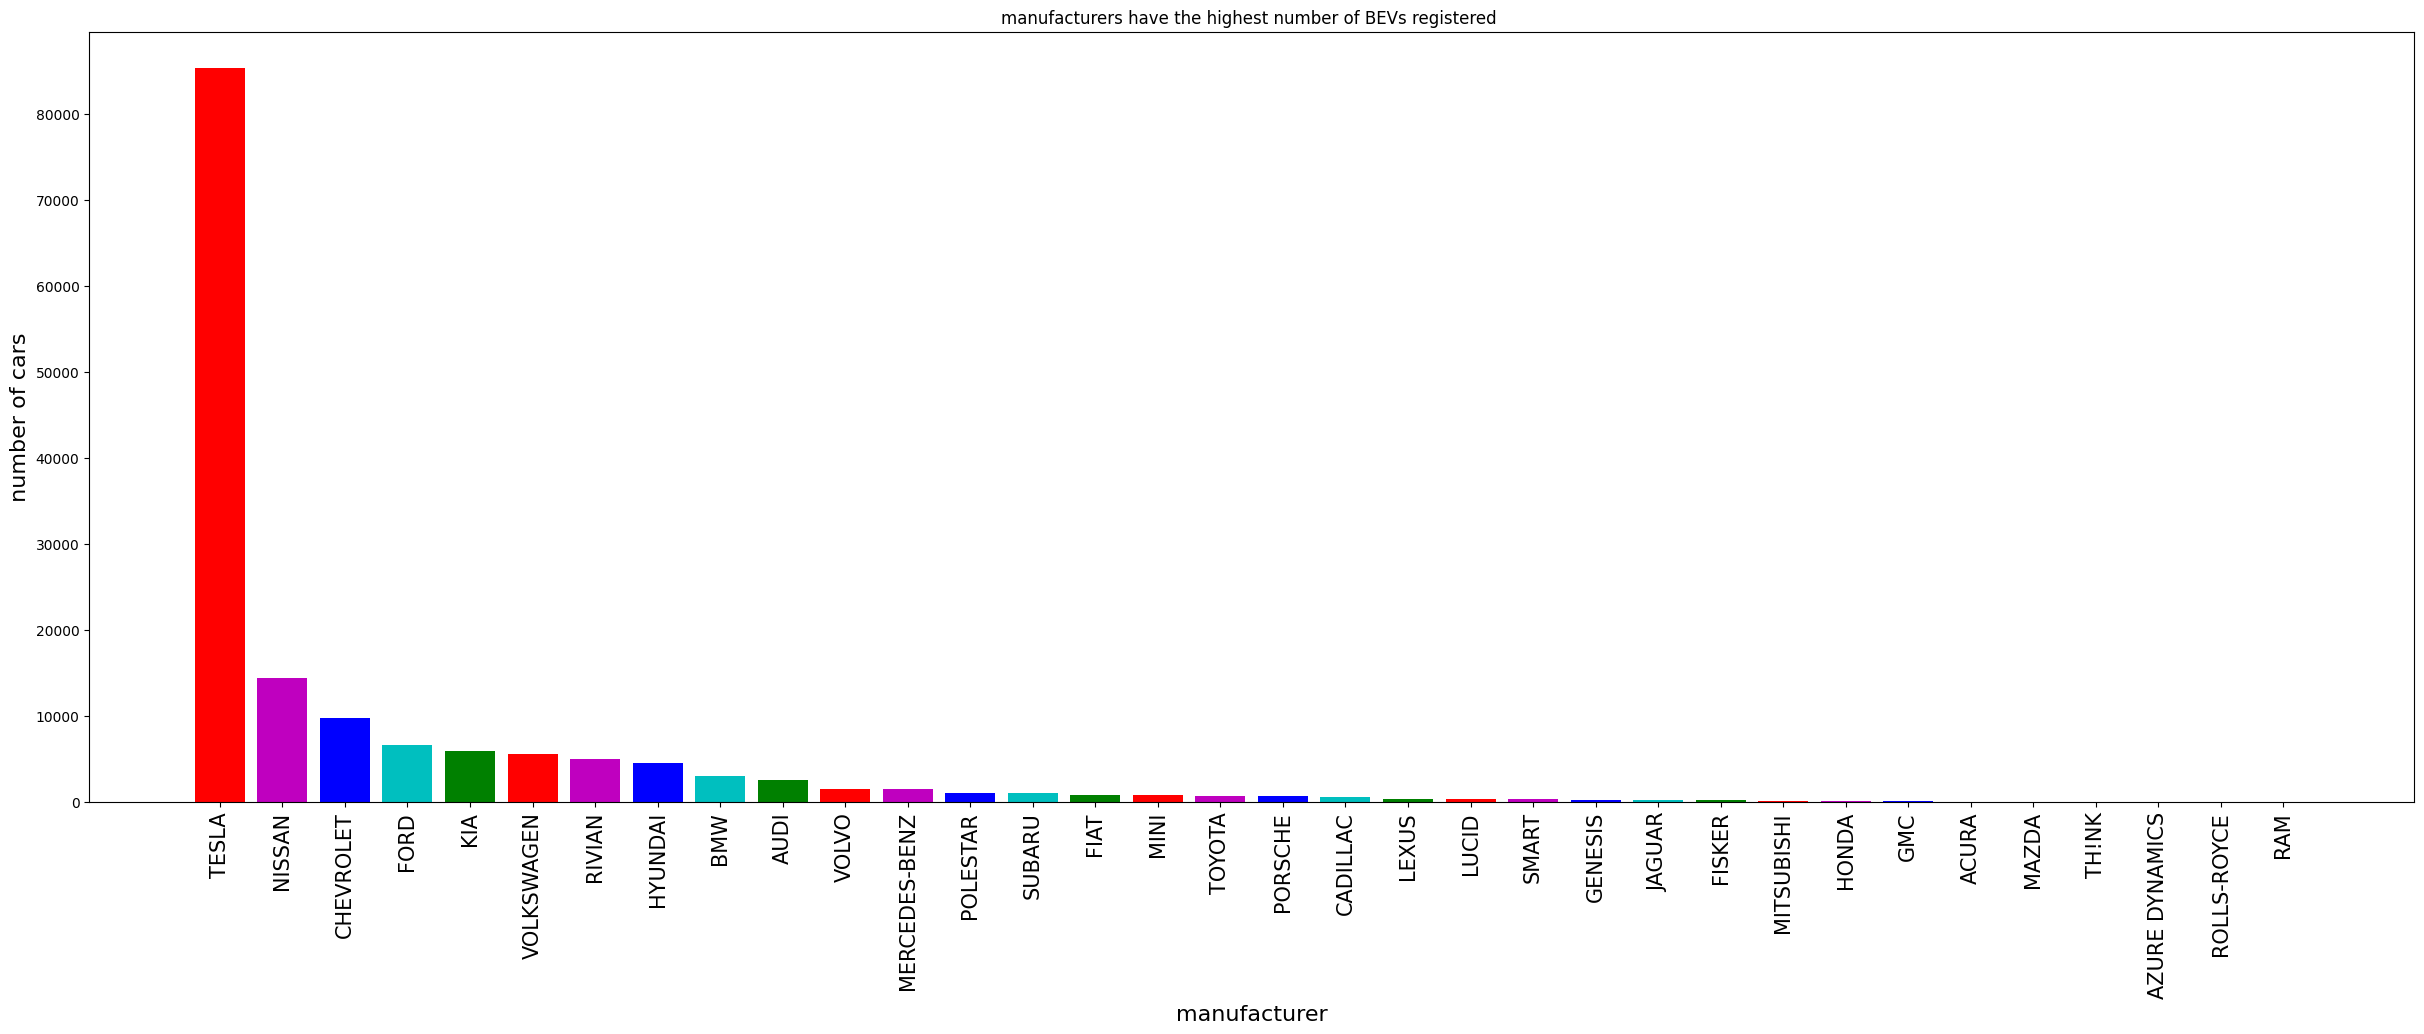

In [11]:
plt.figure(figsize=(30, 10))
plt.bar(becc.index,becc.values,color=['r','m','b','c','g'])
plt.xlabel("manufacturer",size=16)
plt.ylabel(" number of cars ",size=16)
plt.xticks(rotation=90,size=15)
plt.title(f"manufacturers have the highest number of BEVs registered ")
plt.show()

Which manufacturers have the highest number of PHEVs registered?


In [12]:
phecc=data[data['Electric Vehicle Type']=="Plug-in Hybrid Electric Vehicle (PHEV)"]['Make'].value_counts()
phecc

Make
TOYOTA                  6664
BMW                     5181
JEEP                    5141
CHEVROLET               4833
FORD                    3727
CHRYSLER                3484
VOLVO                   3076
KIA                     2628
AUDI                    1524
MITSUBISHI               944
HONDA                    844
HYUNDAI                  682
DODGE                    631
MAZDA                    623
PORSCHE                  515
MERCEDES-BENZ            402
LEXUS                    347
LINCOLN                  288
MINI                     221
CADILLAC                  88
SUBARU                    67
LAND ROVER                63
ALFA ROMEO                59
FISKER                    14
BENTLEY                    4
WHEEGO ELECTRIC CARS       3
Name: count, dtype: int64

manufacturers have the highest number of PHEVs registered

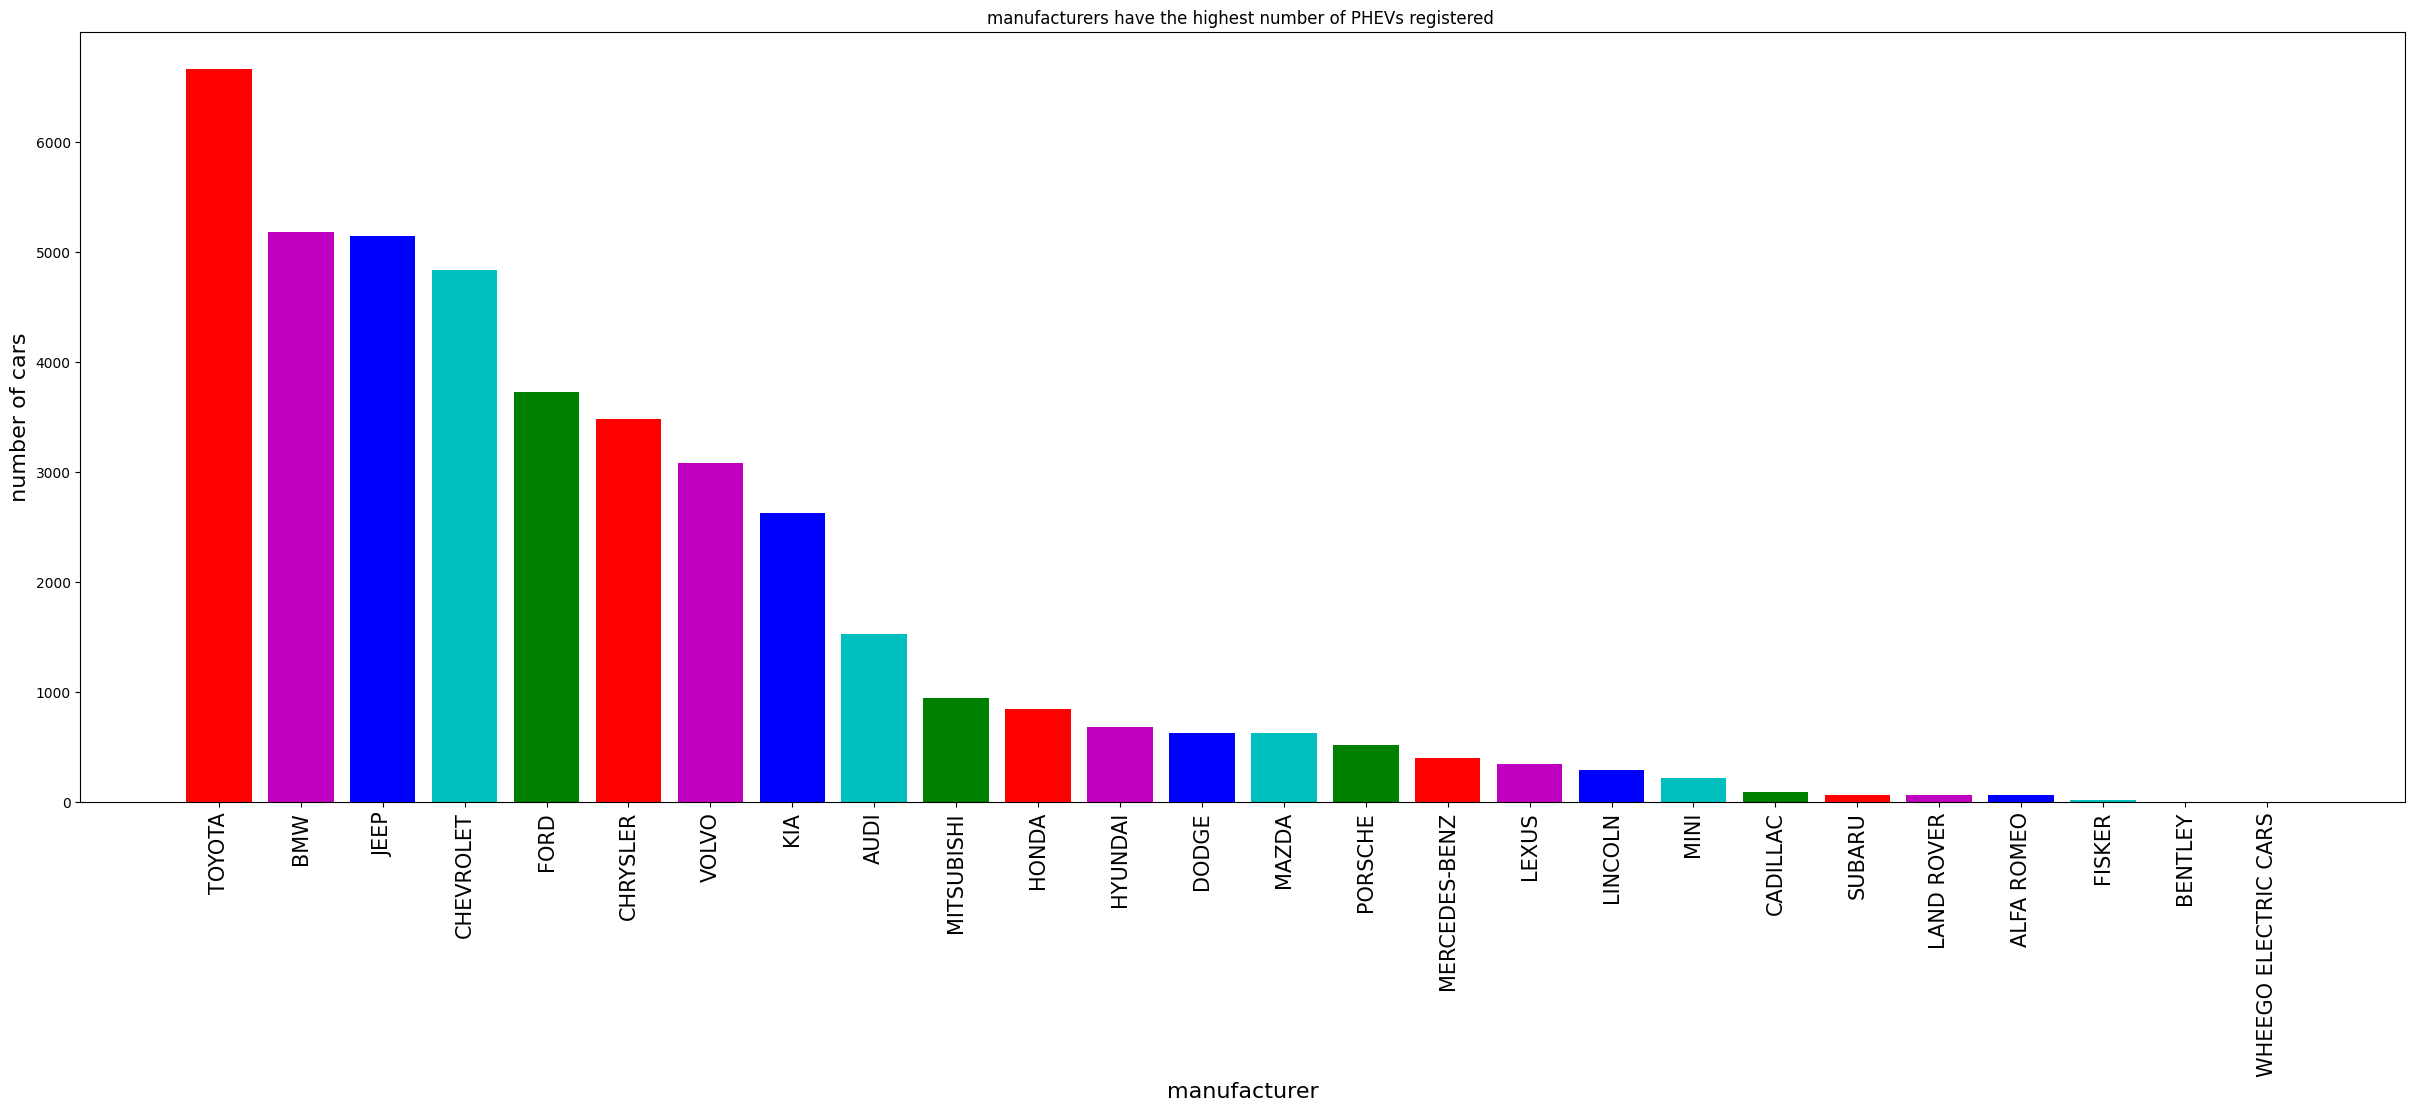

In [13]:
plt.figure(figsize=(30, 10))
plt.bar(phecc.index,phecc.values,color=['r','m','b','c','g'])
plt.xlabel("manufacturer",size=16)
plt.ylabel(" number of cars ",size=16)
plt.xticks(rotation=90,size=15)
plt.title(f"manufacturers have the highest number of PHEVs registered ")
plt.show()

 What are the most popular models of BEVs and PHEVs?


In [14]:
mpBEVm=becc[:5]
print("the most popular models of BEVs are ",mpBEVm)
mpPHEVm=phecc[:5]
print("the most popular models of PHEVs are ",mpPHEVm)

the most popular models of BEVs are  Make
TESLA        85320
NISSAN       14360
CHEVROLET     9745
FORD          6539
KIA           5869
Name: count, dtype: int64
the most popular models of PHEVs are  Make
TOYOTA       6664
BMW          5181
JEEP         5141
CHEVROLET    4833
FORD         3727
Name: count, dtype: int64


 market share of BEV and PHEV in Washington ?

152179
42053


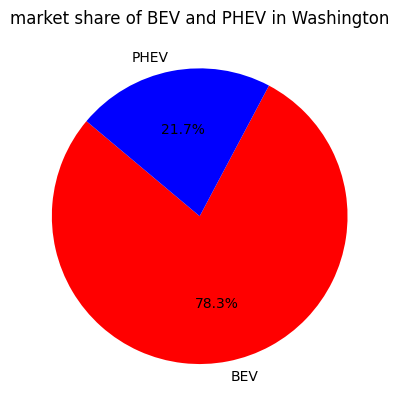

In [15]:
tBEV=becc.values.sum()
print(tBEV)
tPHEV=phecc.values.sum()
print(tPHEV)
indd=["BEV","PHEV"]
nums=[tBEV,tPHEV]
plt.pie(nums, labels=indd, autopct='%1.1f%%', startangle=140,colors=['r','b'])
plt.title('market share of BEV and PHEV in Washington')
plt.show()

What is the average range (in miles) of BEVs and PHEVs?

average range (in miles) of BEVs is  61.45813154245987
average range (in miles) of PHEVs is 30.868564362321944


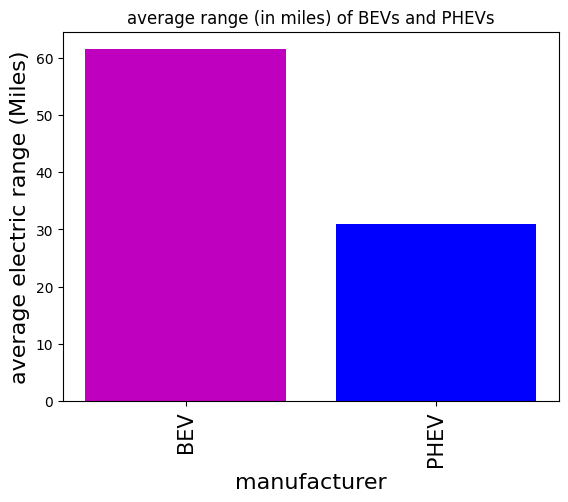

In [16]:
arBEV=data[data['Electric Vehicle Type']=="Battery Electric Vehicle (BEV)"]['Electric Range'].mean()
print("average range (in miles) of BEVs is ",arBEV)
arPHEV=data[data['Electric Vehicle Type']=="Plug-in Hybrid Electric Vehicle (PHEV)"]['Electric Range'].mean()
print("average range (in miles) of PHEVs is",arPHEV)
inde=["BEV","PHEV"]
valo=[arBEV,arPHEV]
plt.bar(inde,valo,color=['m','b'])
plt.xlabel("manufacturer",size=16)
plt.ylabel("average electric range (Miles)",size=16)
plt.xticks(rotation=90,size=15)
plt.title(f"average range (in miles) of BEVs and PHEVs")
plt.show()


How does the range of vehicles vary by manufacturer and model?

 Average electric range(miles) of TESLA  is Electric Range    72.17364
dtype: float64
          Model  Electric Range
2       MODEL 3           266.0
6       MODEL S           208.0
10      MODEL 3           215.0
12      MODEL S           208.0
13      MODEL 3           266.0
...         ...             ...
194227  MODEL Y             0.0
194228  MODEL 3             0.0
194229  MODEL 3             0.0
194230  MODEL 3           220.0
194231  MODEL 3           220.0

[85320 rows x 2 columns]


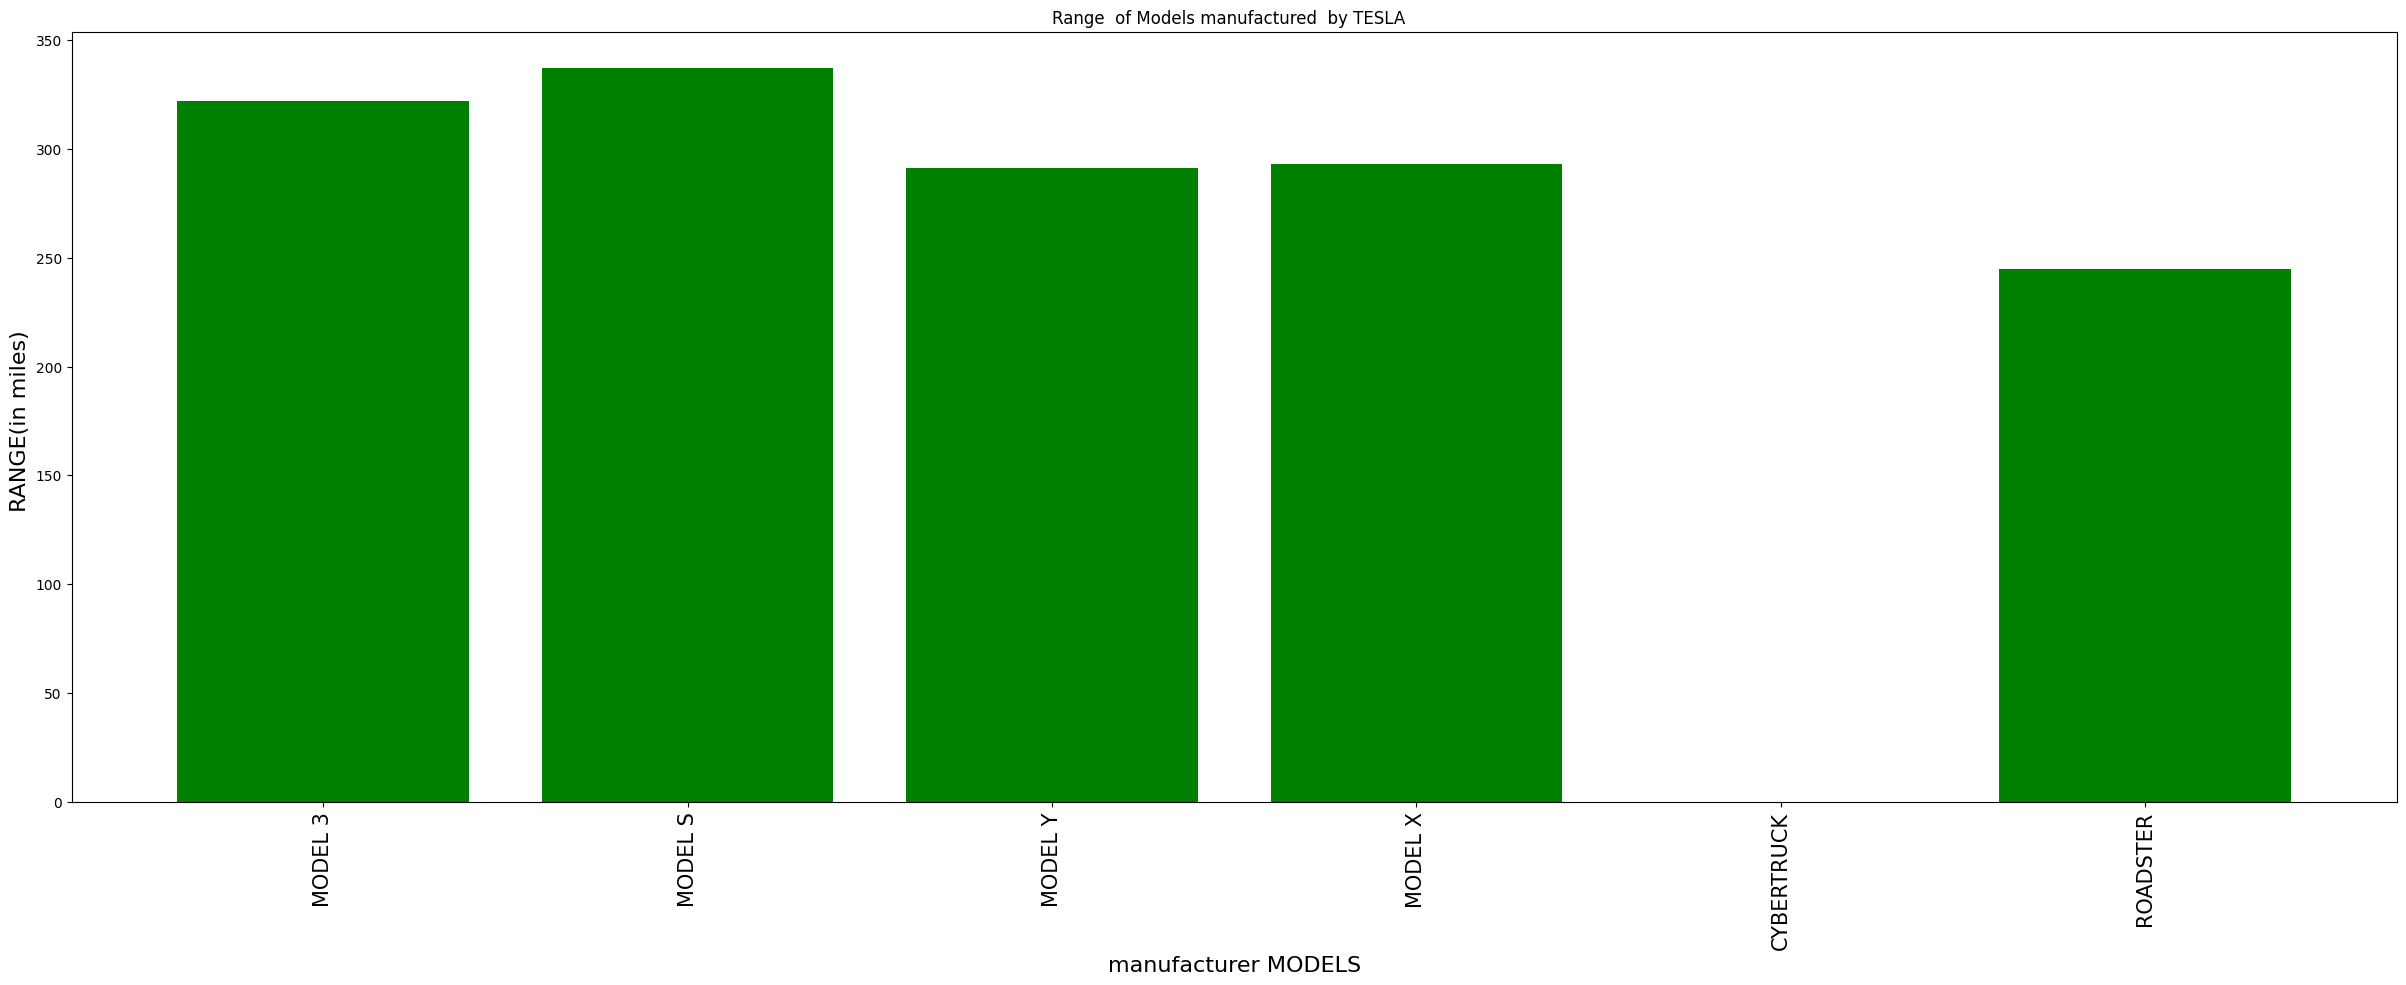

 Average electric range(miles) of CHEVROLET  is Electric Range    93.518109
dtype: float64
           Model  Electric Range
3           VOLT            53.0
22       BOLT EV           238.0
46      BOLT EUV             0.0
62          VOLT            53.0
92          VOLT            53.0
...          ...             ...
194177   BOLT EV             0.0
194179   BOLT EV           259.0
194190      VOLT            38.0
194211      VOLT            53.0
194221   BOLT EV             0.0

[14578 rows x 2 columns]


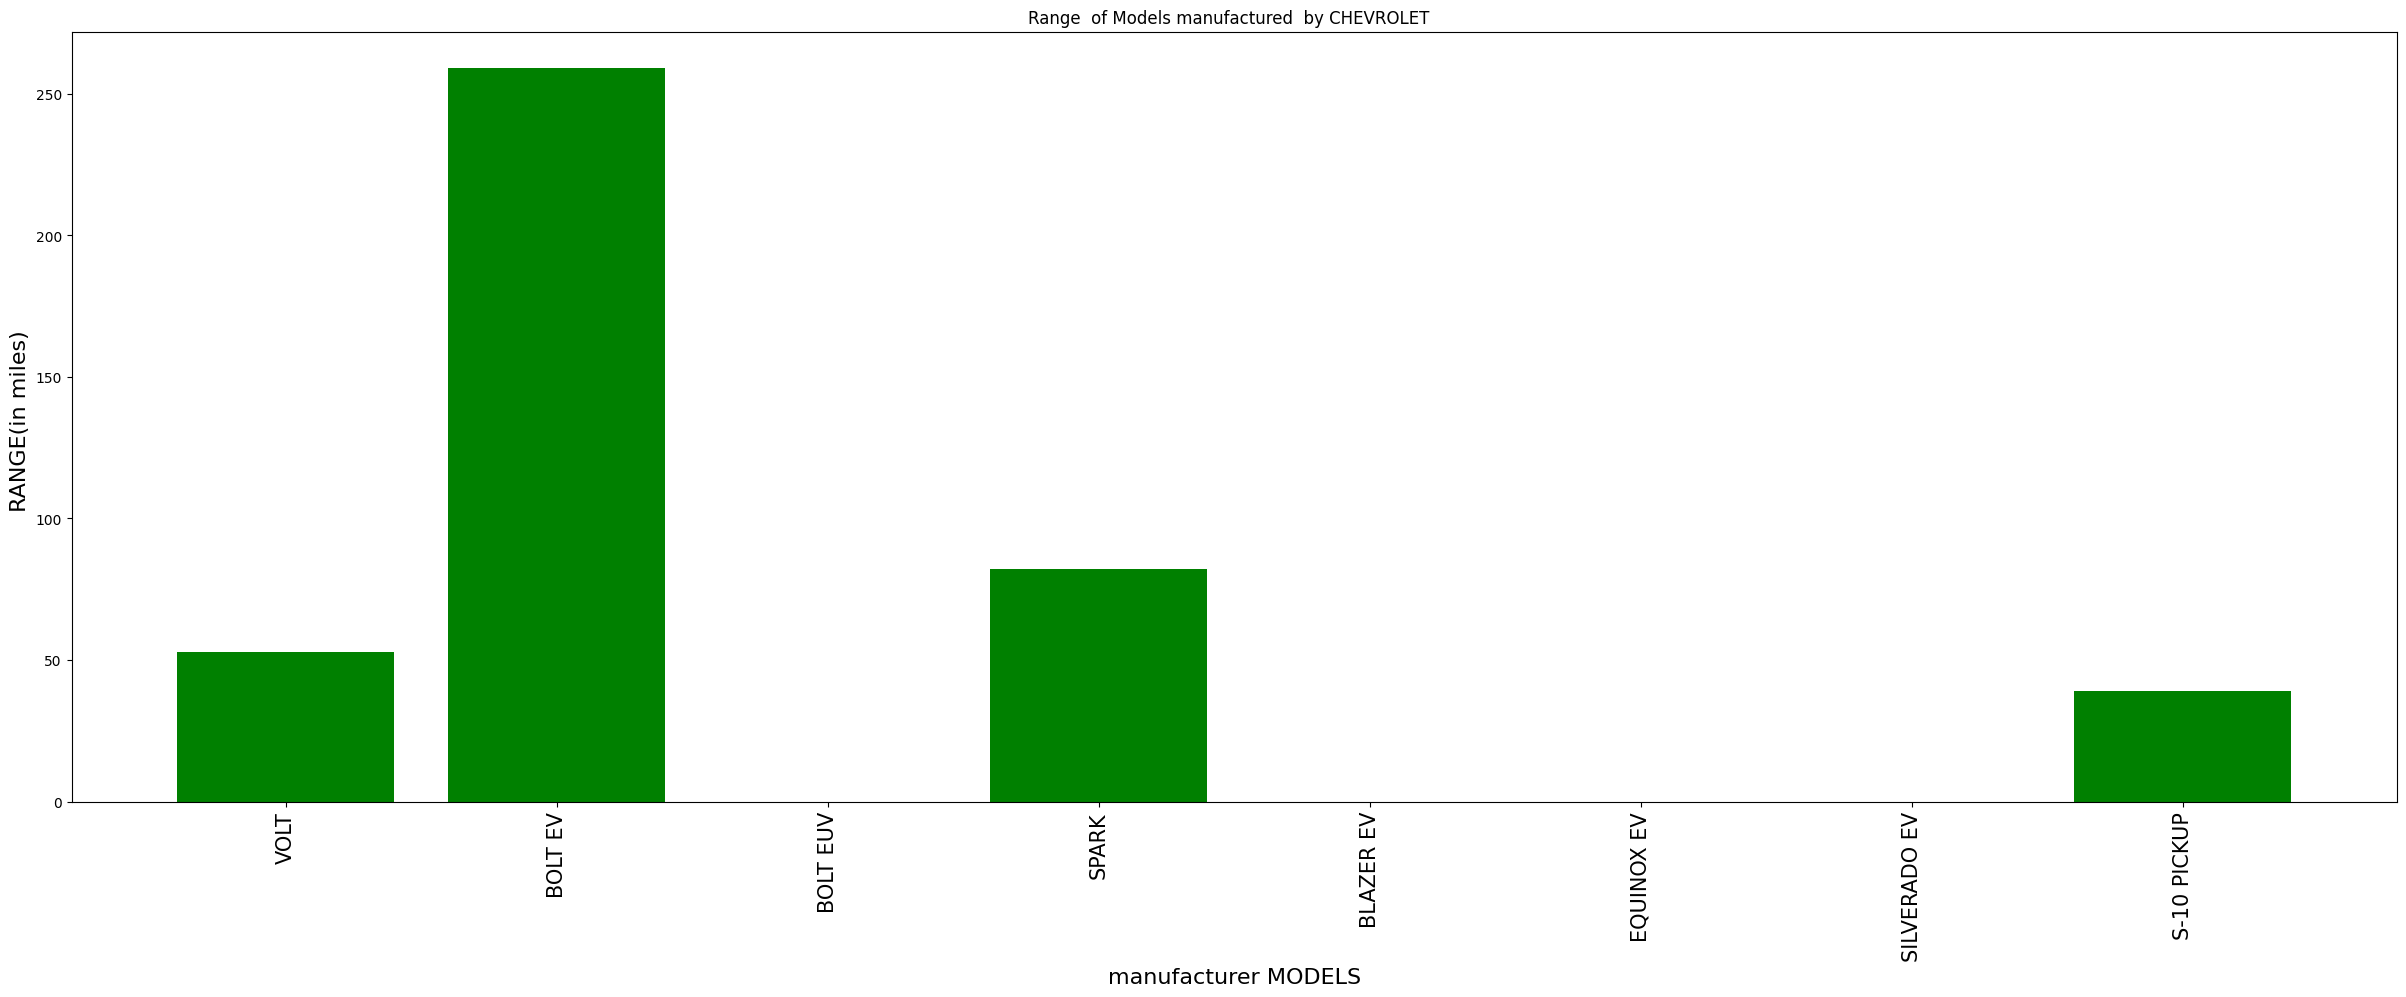

 Average electric range(miles) of NISSAN  is Electric Range    78.19046
dtype: float64
       Model  Electric Range
7       LEAF            84.0
9       LEAF             0.0
11      LEAF           151.0
36      LEAF           150.0
38      LEAF            73.0
...      ...             ...
194180  LEAF            75.0
194199  LEAF            75.0
194202  LEAF             0.0
194216  LEAF             0.0
194225  LEAF            84.0

[14360 rows x 2 columns]


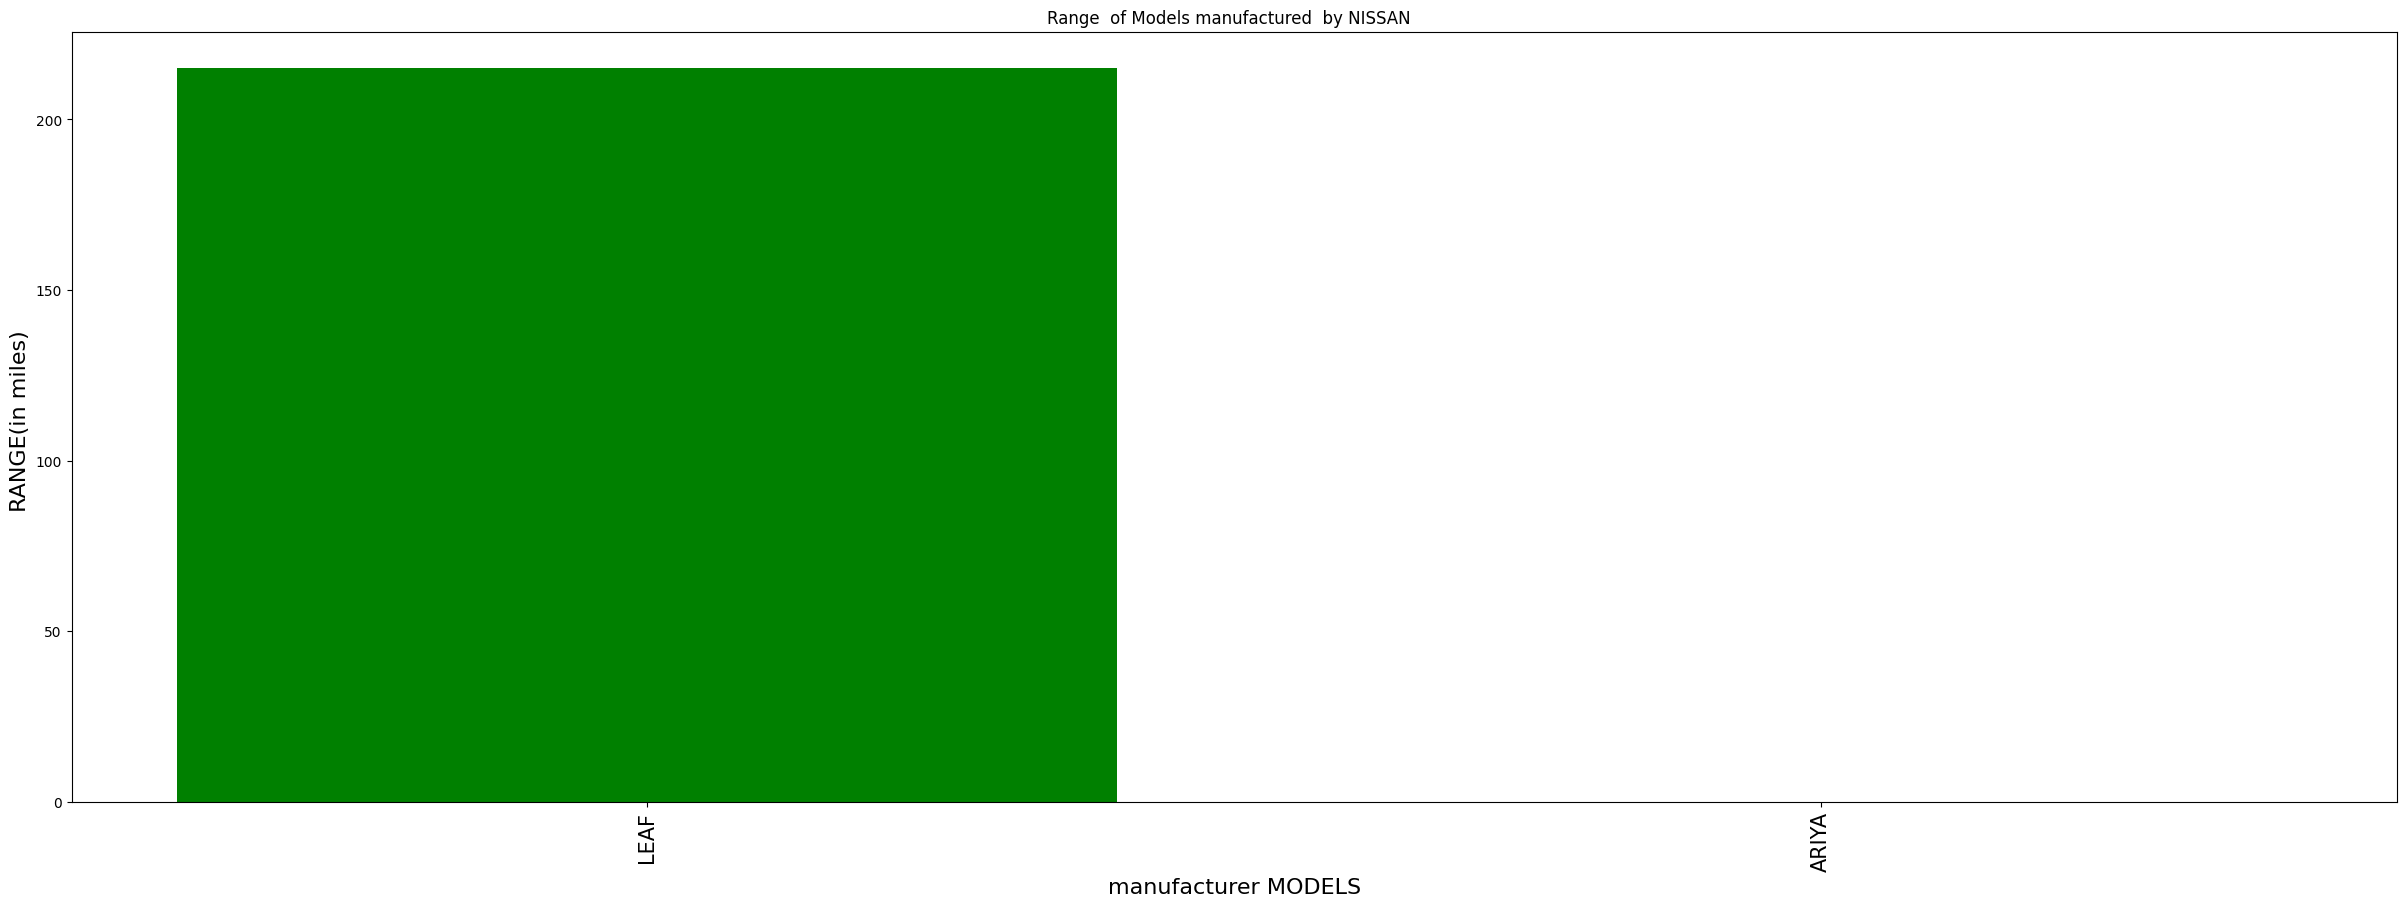

 Average electric range(miles) of FORD  is Electric Range    9.832846
dtype: float64
                 Model  Electric Range
5               ESCAPE            38.0
24               F-150             0.0
93              FUSION            19.0
112              F-150             0.0
118     MUSTANG MACH-E             0.0
...                ...             ...
194143  MUSTANG MACH-E             0.0
194153           F-150             0.0
194178  MUSTANG MACH-E             0.0
194212  MUSTANG MACH-E             0.0
194217          ESCAPE            38.0

[10266 rows x 2 columns]


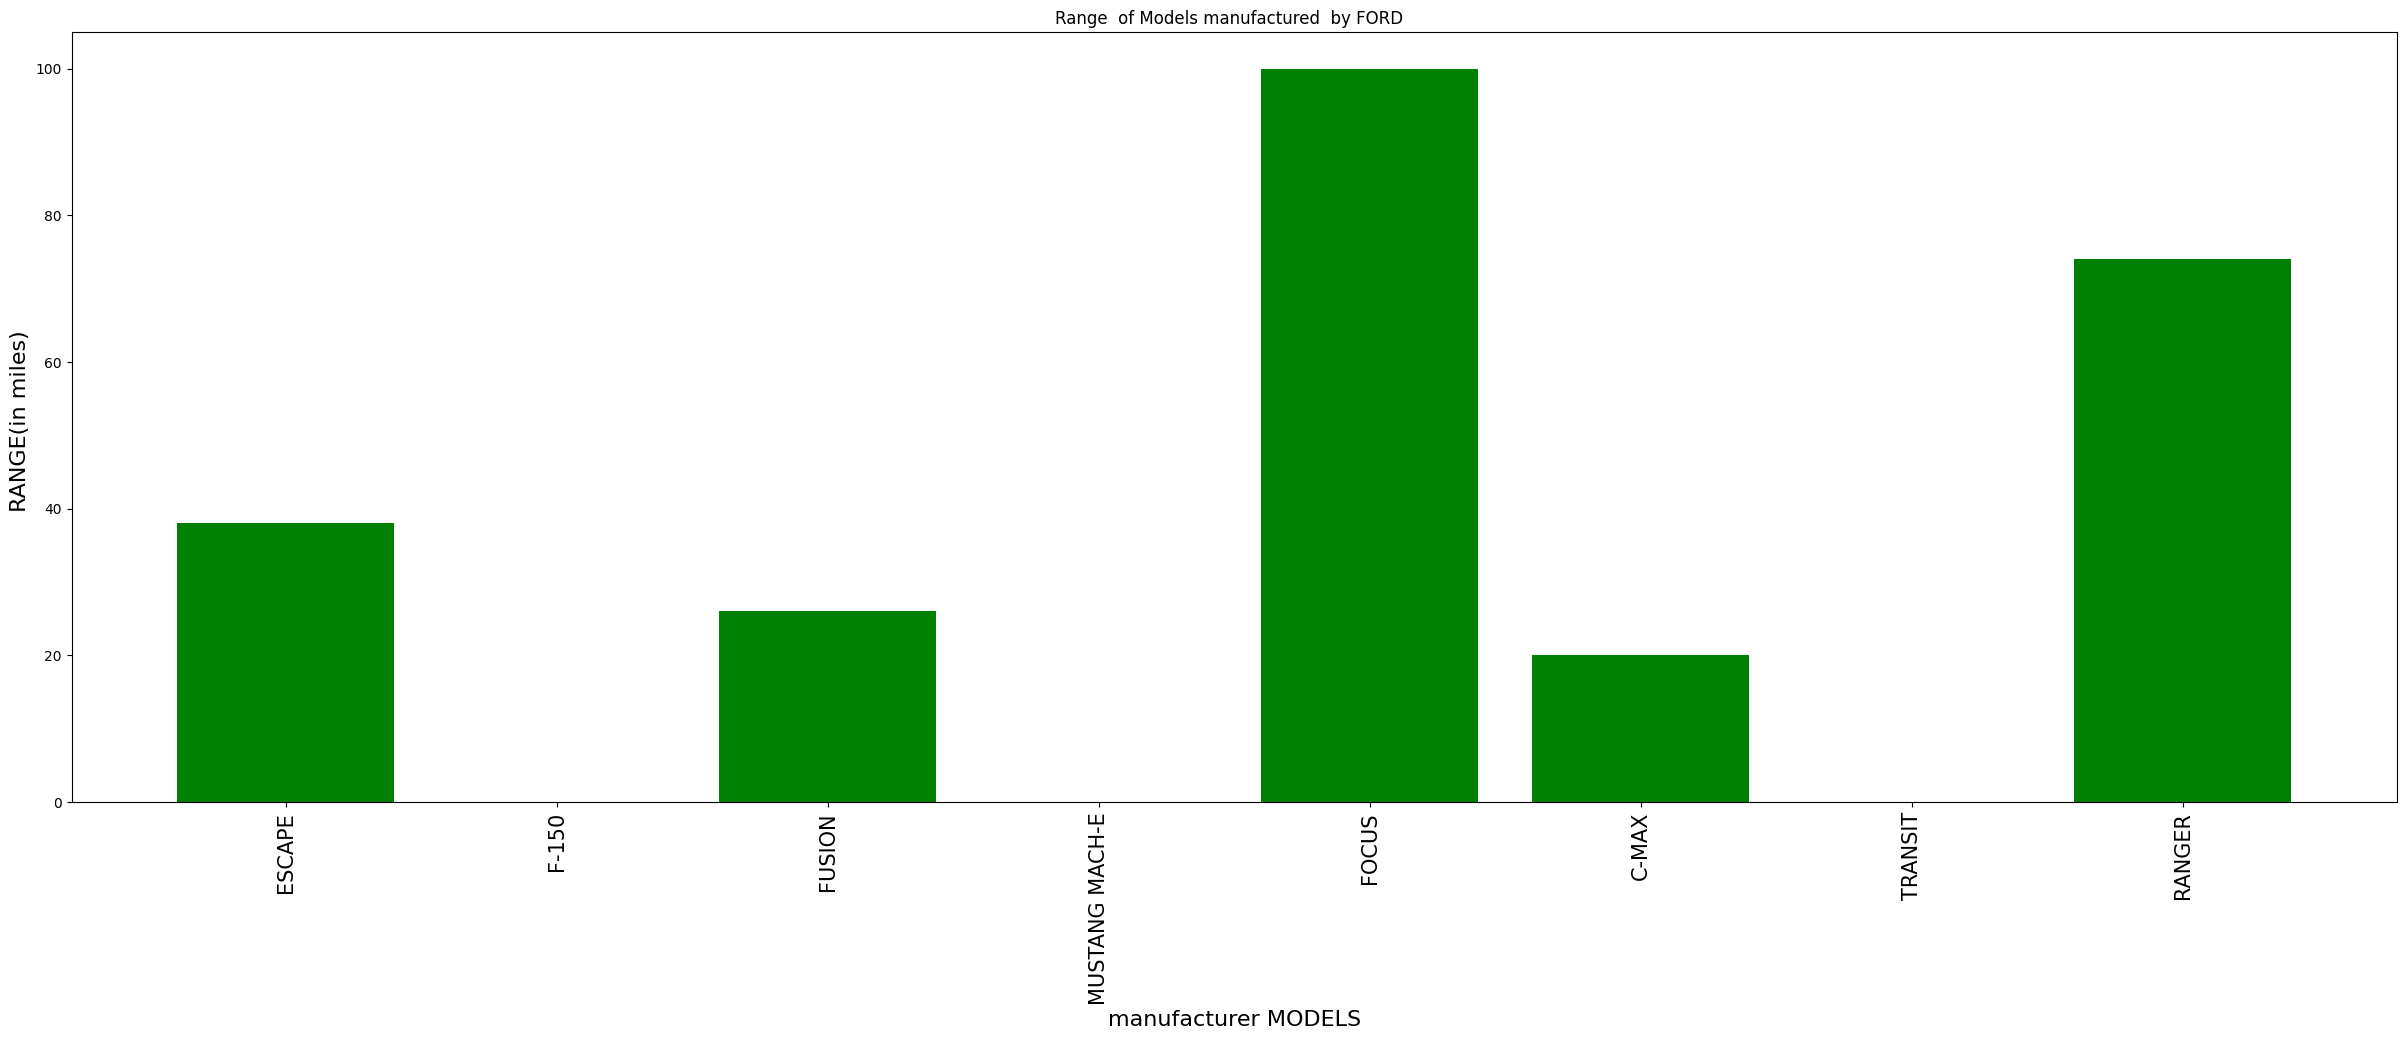

 Average electric range(miles) of KIA  is Electric Range    40.502883
dtype: float64
       Model  Electric Range
1       SOUL            93.0
26      NIRO            33.0
43       EV6             0.0
77      SOUL            93.0
130      EV6             0.0
...      ...             ...
194124  SOUL            93.0
194147   EV6             0.0
194163   EV6             0.0
194183  NIRO            26.0
194185  NIRO            26.0

[8497 rows x 2 columns]


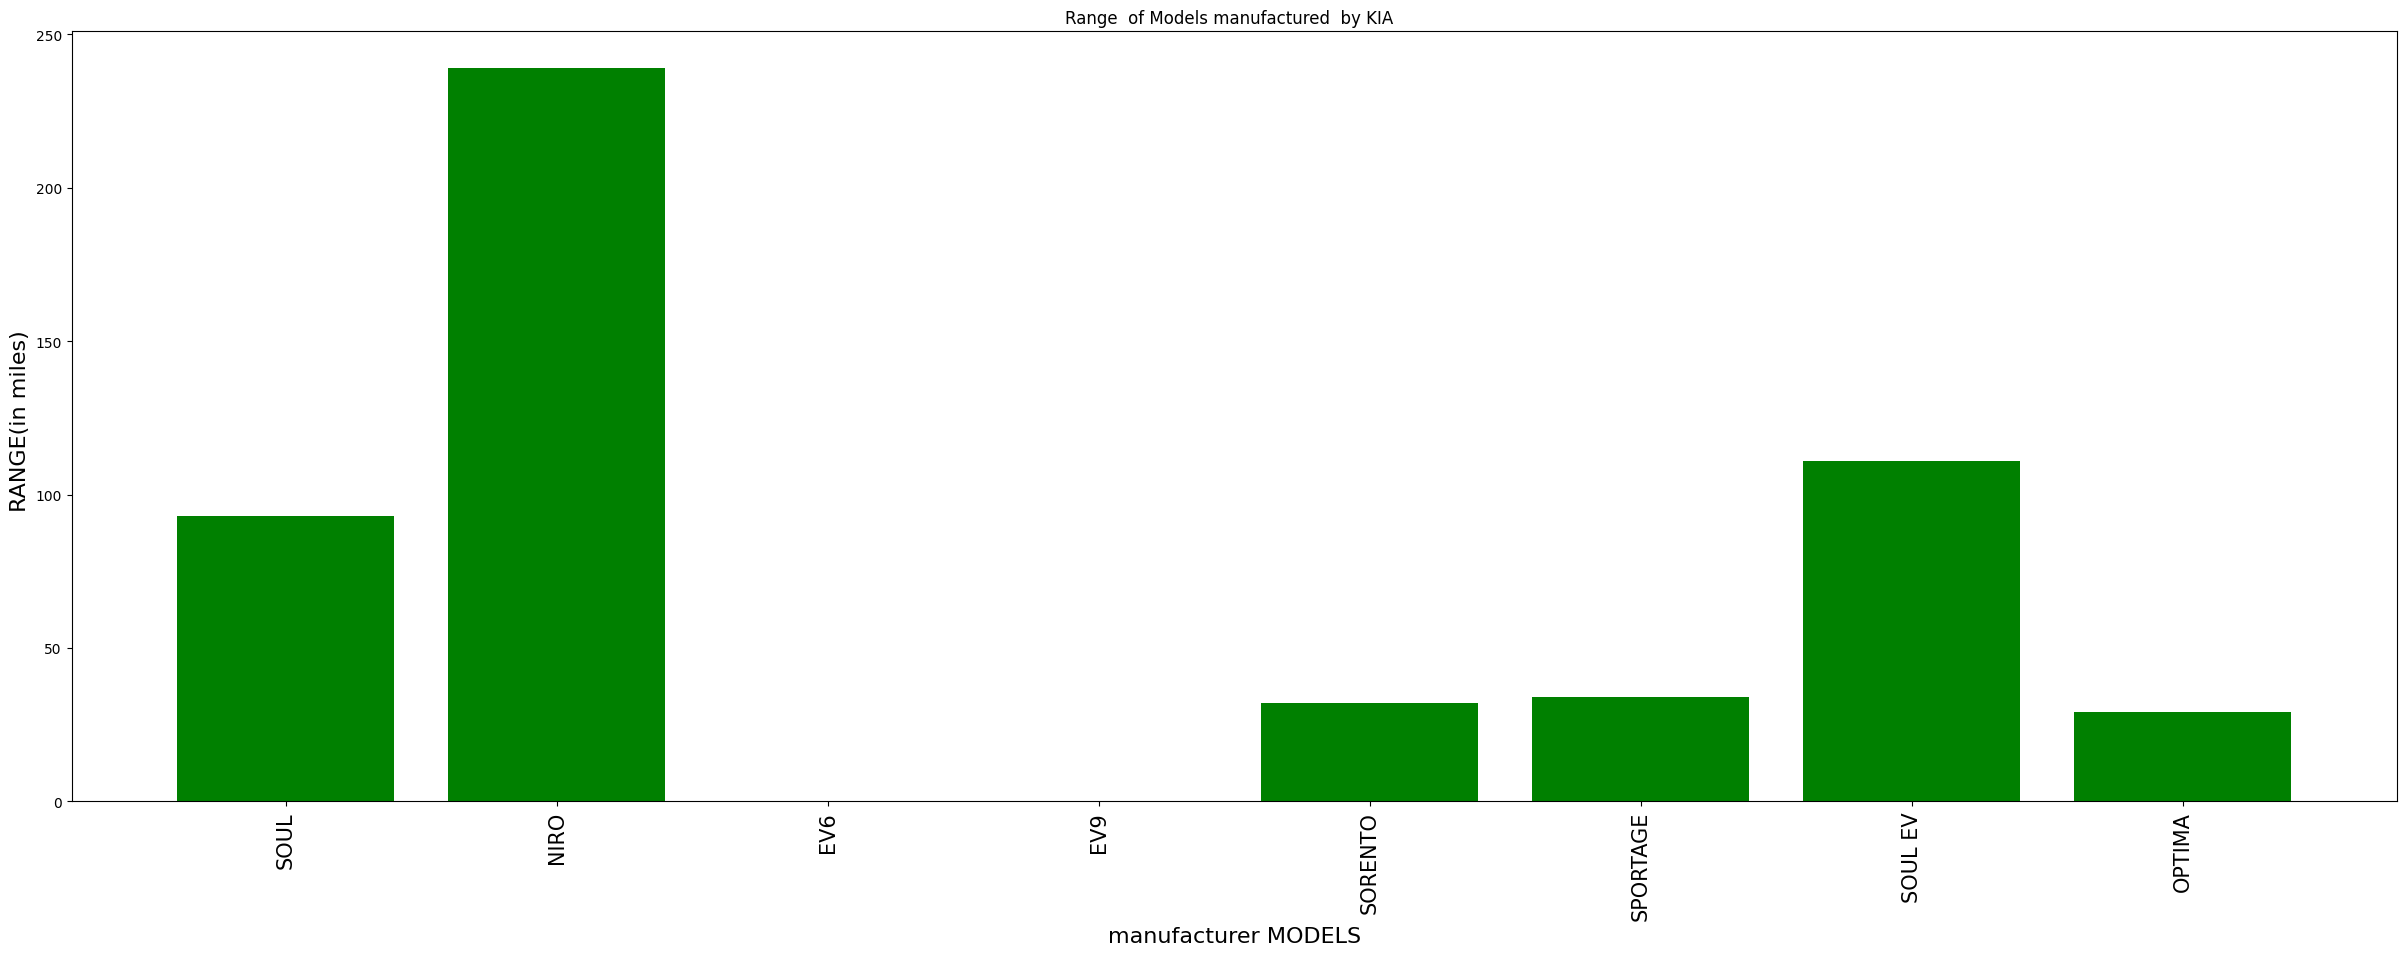

 Average electric range(miles) of BMW  is Electric Range    32.874847
dtype: float64
       Model  Electric Range
4         X5            30.0
14        X3            17.0
18        X3            17.0
23        I3           114.0
27        I3            81.0
...      ...             ...
194043    I4             0.0
194045    X5            14.0
194111    I3            97.0
194127    I4             0.0
194151    I4             0.0

[8150 rows x 2 columns]


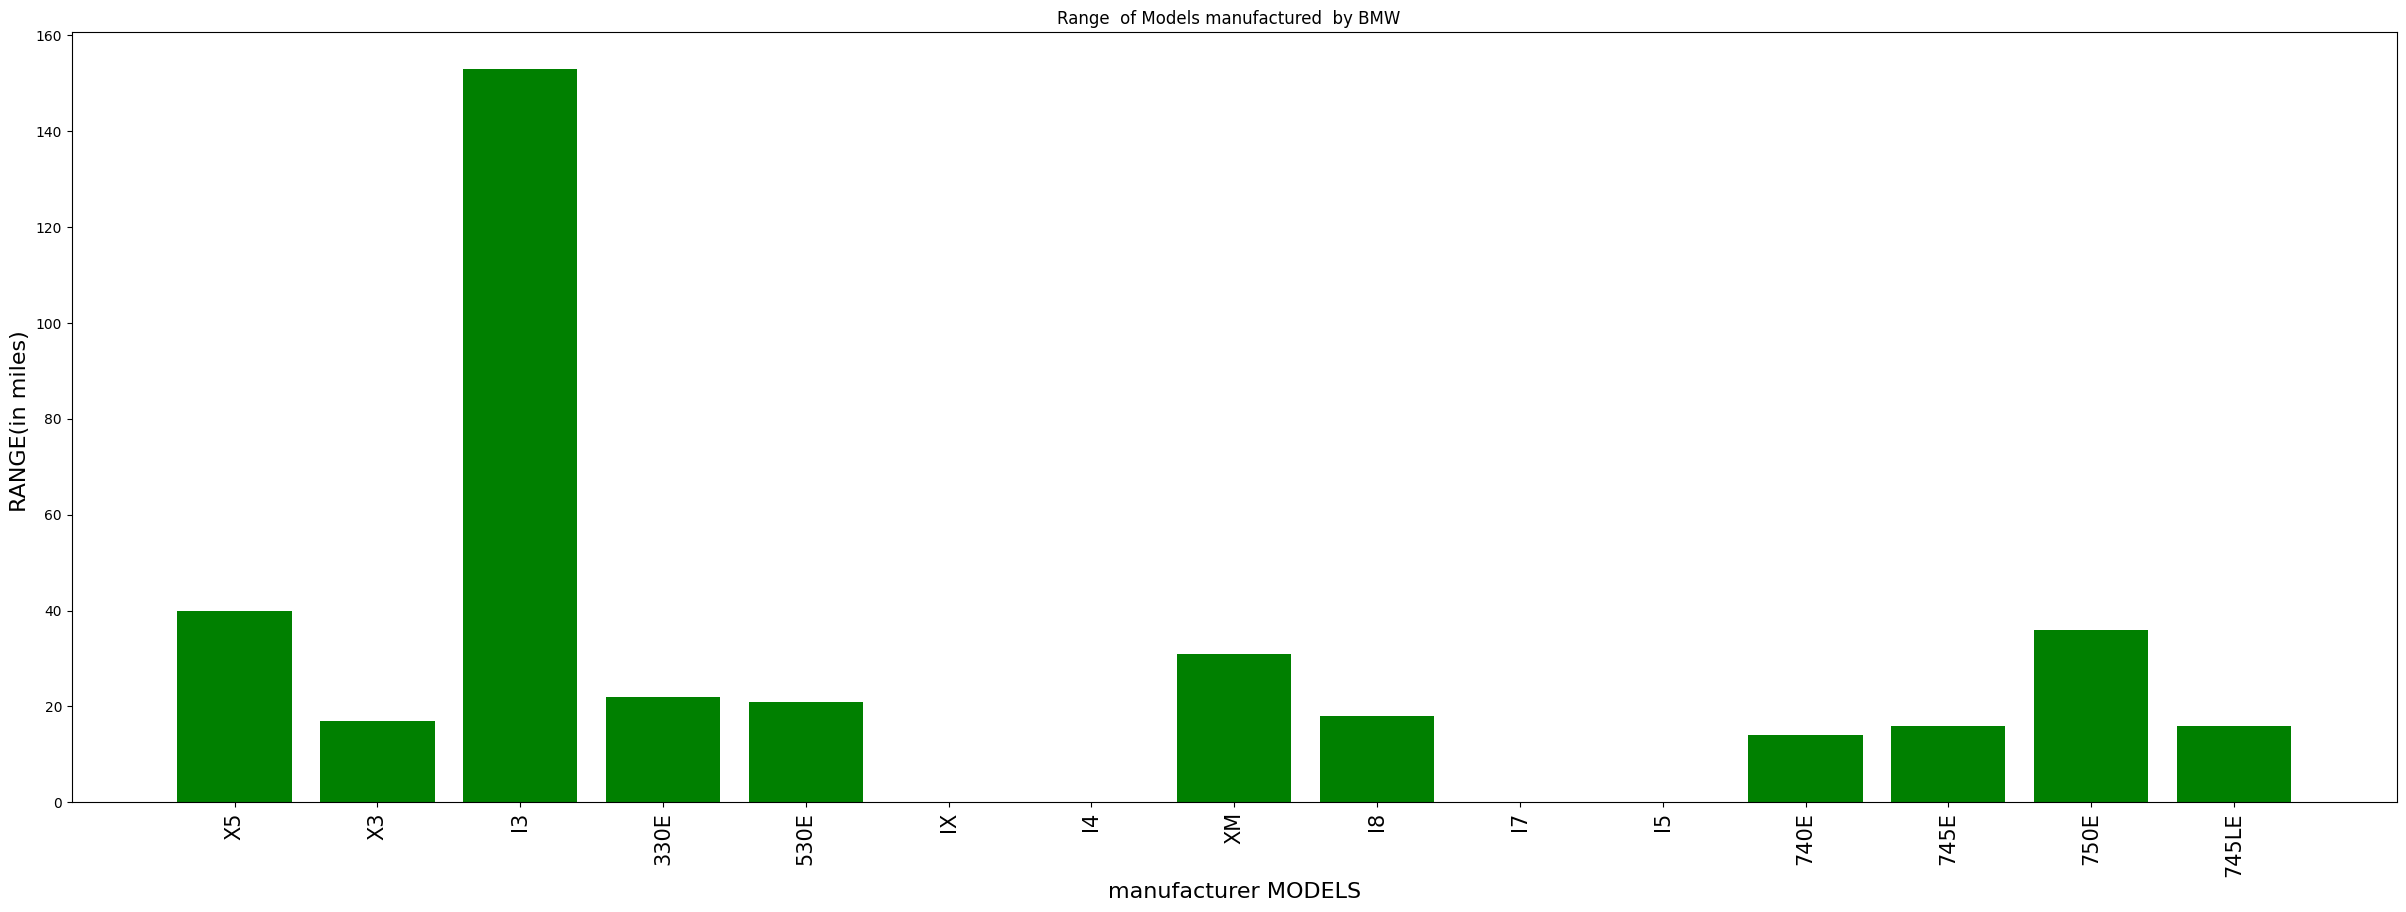

 Average electric range(miles) of TOYOTA  is Electric Range    27.708627
dtype: float64
                Model  Electric Range
31        PRIUS PRIME            25.0
68         RAV4 PRIME            42.0
96        PRIUS PRIME            25.0
129       PRIUS PRIME            25.0
136        RAV4 PRIME            42.0
...               ...             ...
194131    PRIUS PRIME            25.0
194150  PRIUS PLUG-IN             6.0
194171    PRIUS PRIME            25.0
194189    PRIUS PRIME            39.0
194207  PRIUS PLUG-IN             6.0

[7372 rows x 2 columns]


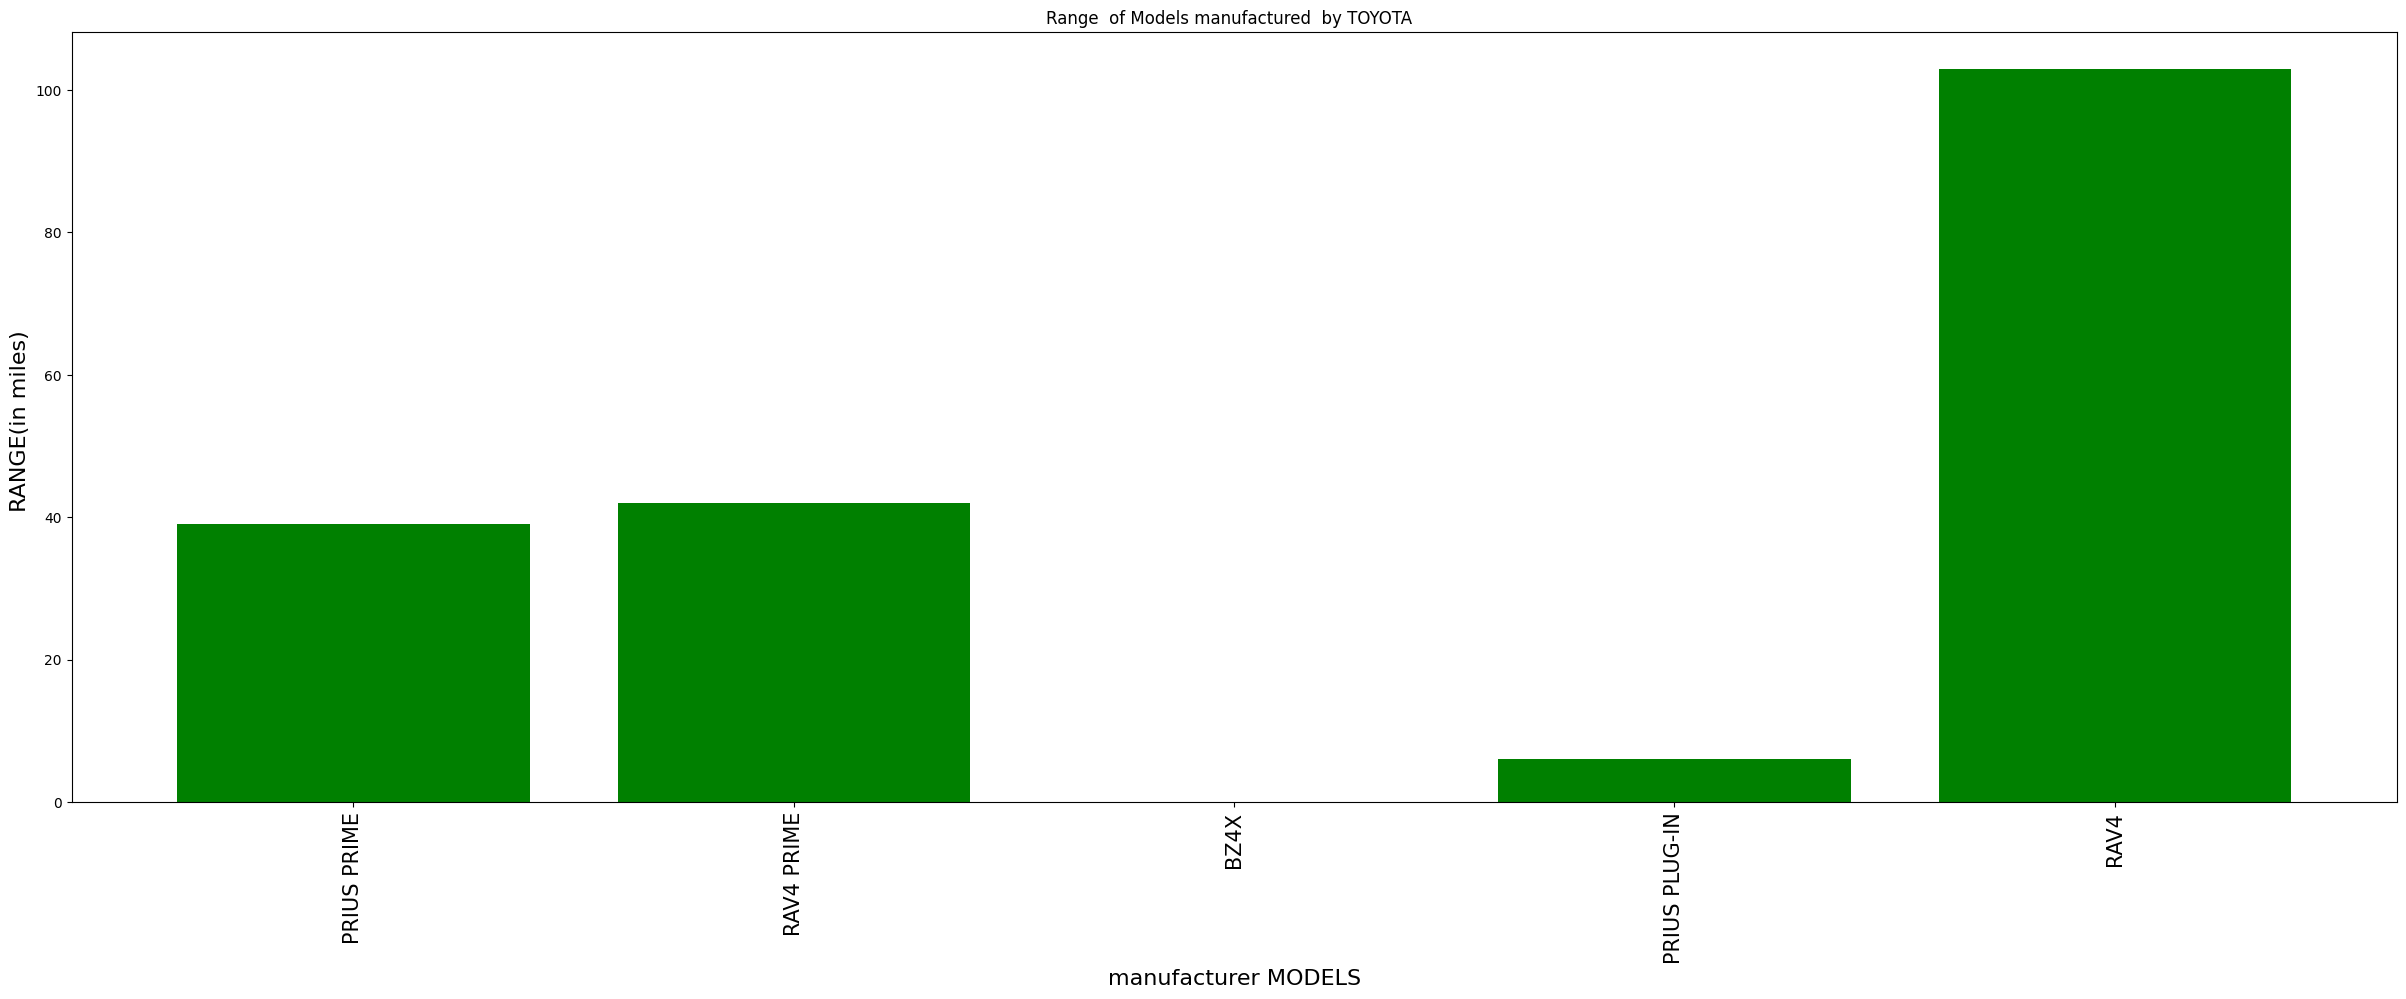

 Average electric range(miles) of VOLKSWAGEN  is Electric Range    21.106146
dtype: float64
         Model  Electric Range
186       ID.4             0.0
229     E-GOLF            83.0
246       ID.4             0.0
307       ID.4             0.0
329     E-GOLF           125.0
...        ...             ...
194007    ID.4             0.0
194030    ID.4             0.0
194063    ID.4             0.0
194198    ID.4             0.0
194209  E-GOLF           125.0

[5483 rows x 2 columns]


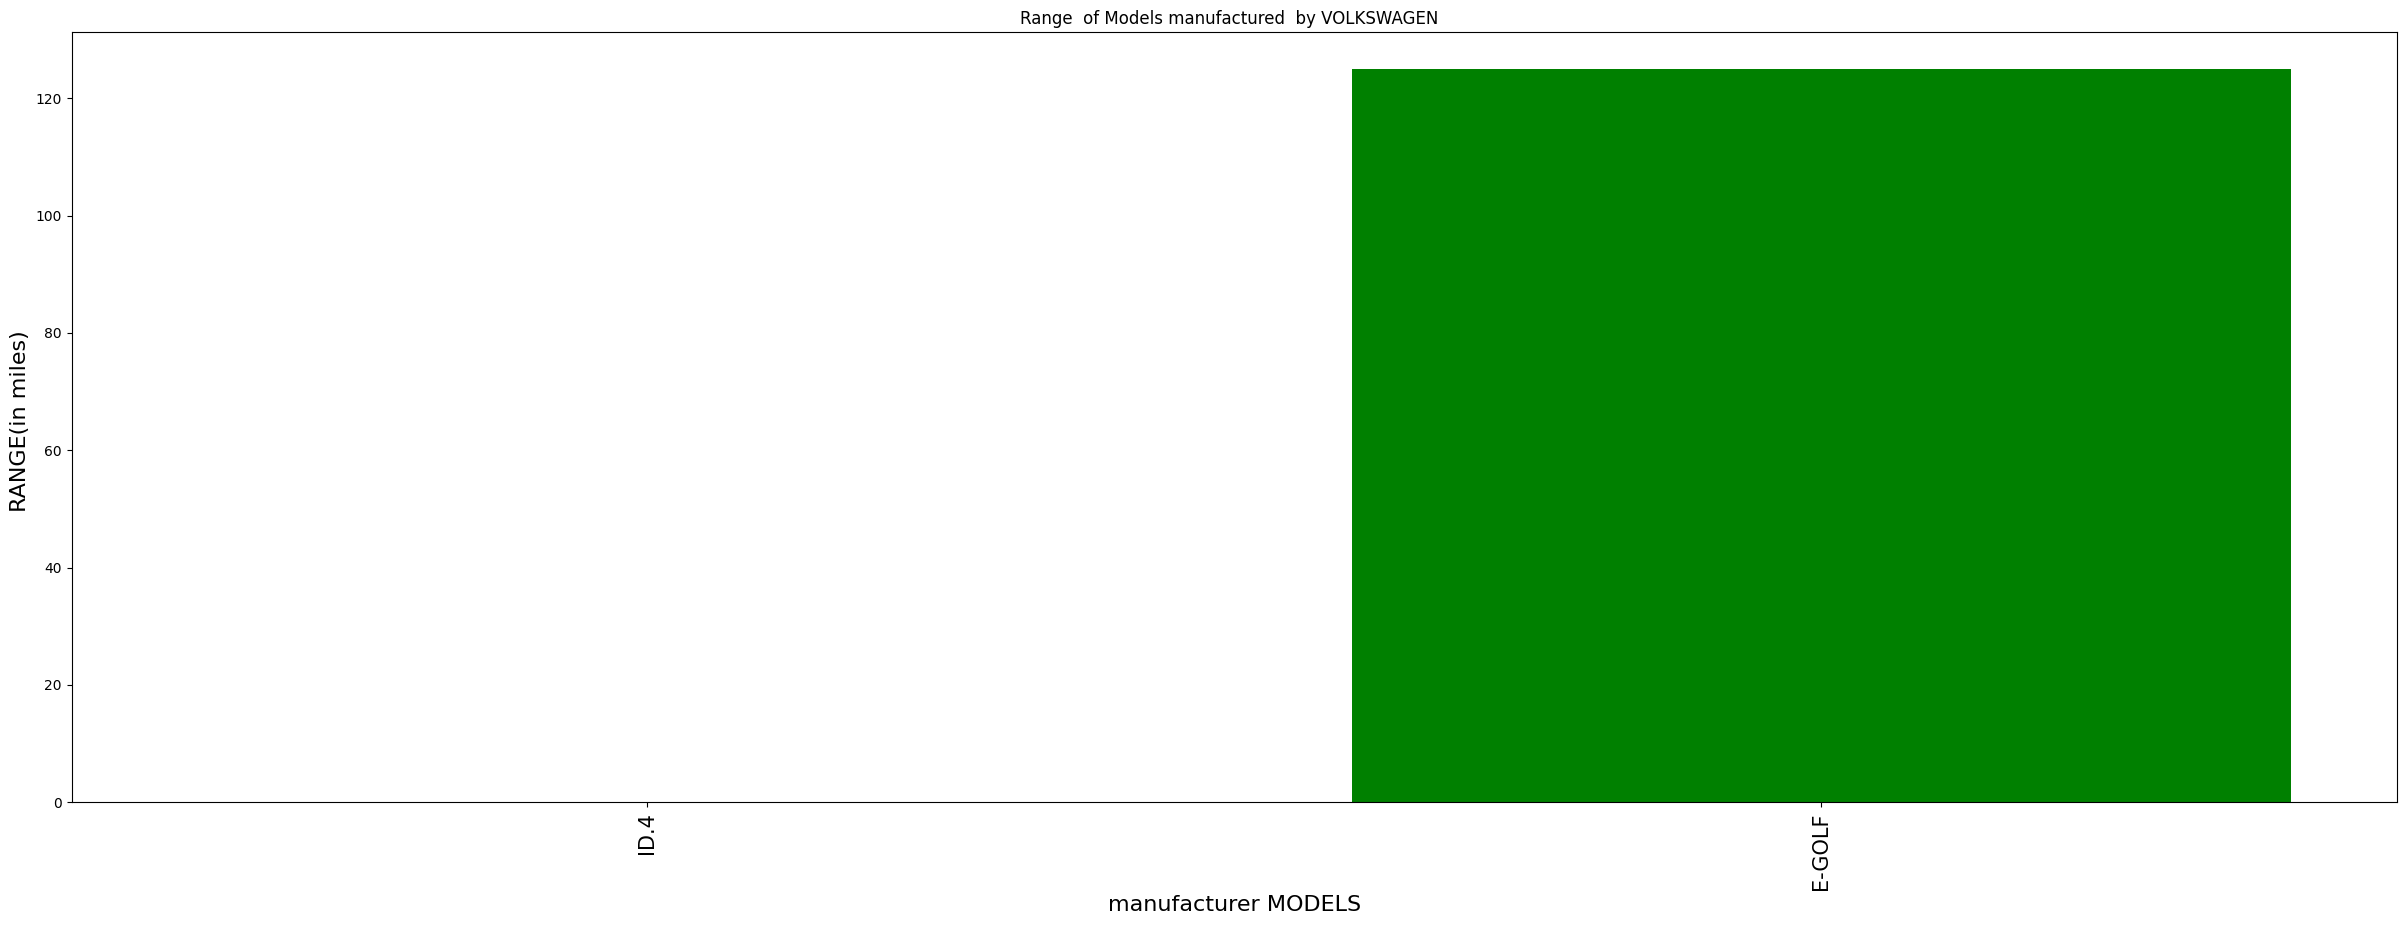

 Average electric range(miles) of JEEP  is Electric Range    22.340012
dtype: float64
                 Model  Electric Range
0             WRANGLER            21.0
110     GRAND CHEROKEE            25.0
161           WRANGLER            22.0
169           WRANGLER            21.0
177     GRAND CHEROKEE            25.0
...                ...             ...
194082        WRANGLER            25.0
194166  GRAND CHEROKEE            25.0
194169  GRAND CHEROKEE            25.0
194204        WRANGLER            21.0
194222        WRANGLER            22.0

[5141 rows x 2 columns]


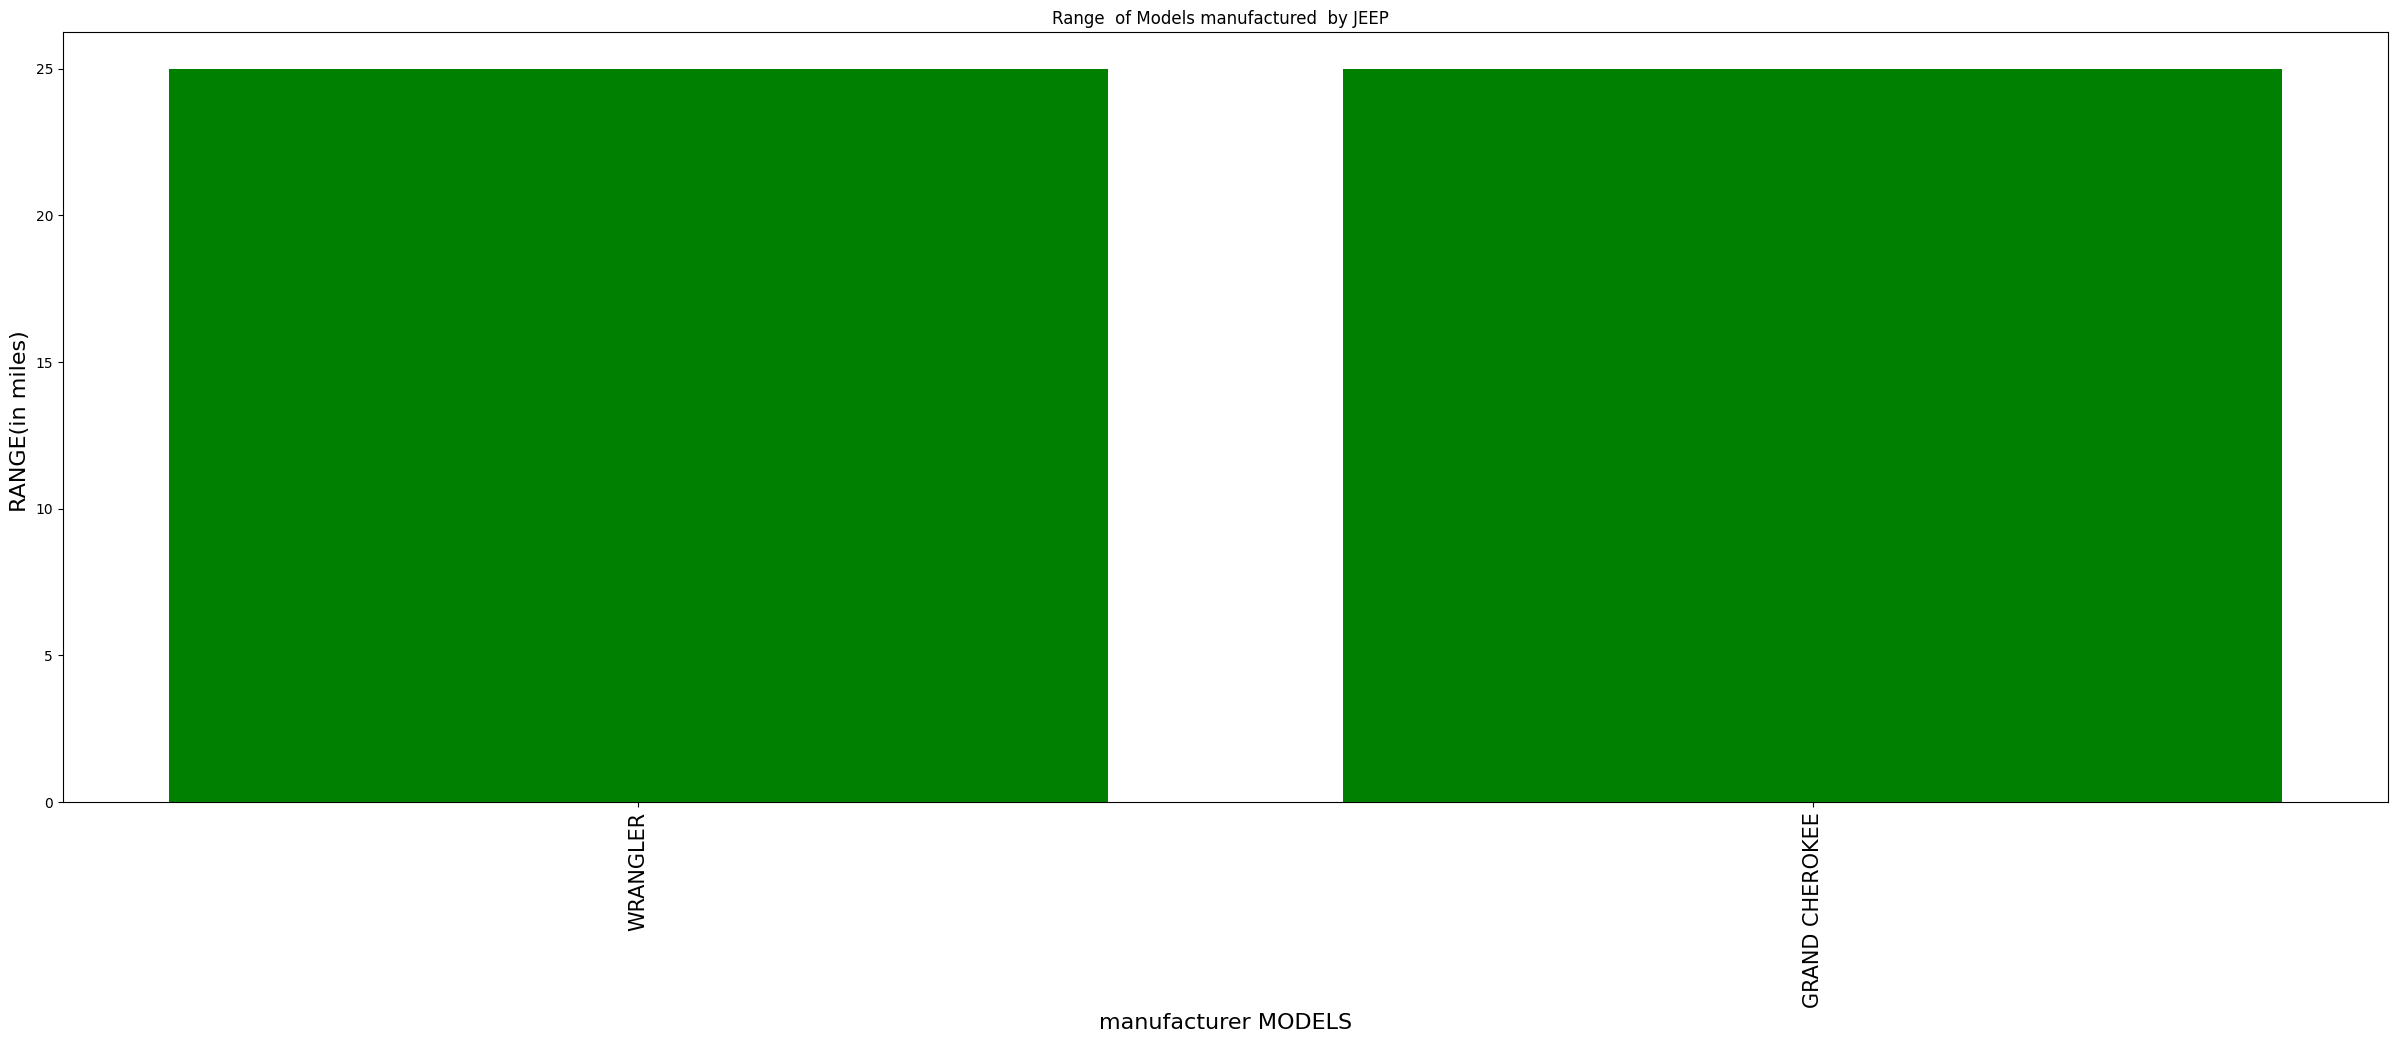

 Average electric range(miles) of HYUNDAI  is Electric Range    18.113587
dtype: float64
                Model  Electric Range
127              KONA           258.0
248            TUCSON            33.0
317           IONIQ 5             0.0
336     KONA ELECTRIC             0.0
353            TUCSON            33.0
...               ...             ...
193881        IONIQ 5             0.0
193976  KONA ELECTRIC             0.0
194029        IONIQ 5             0.0
194052        IONIQ 5             0.0
194135  KONA ELECTRIC             0.0

[5115 rows x 2 columns]


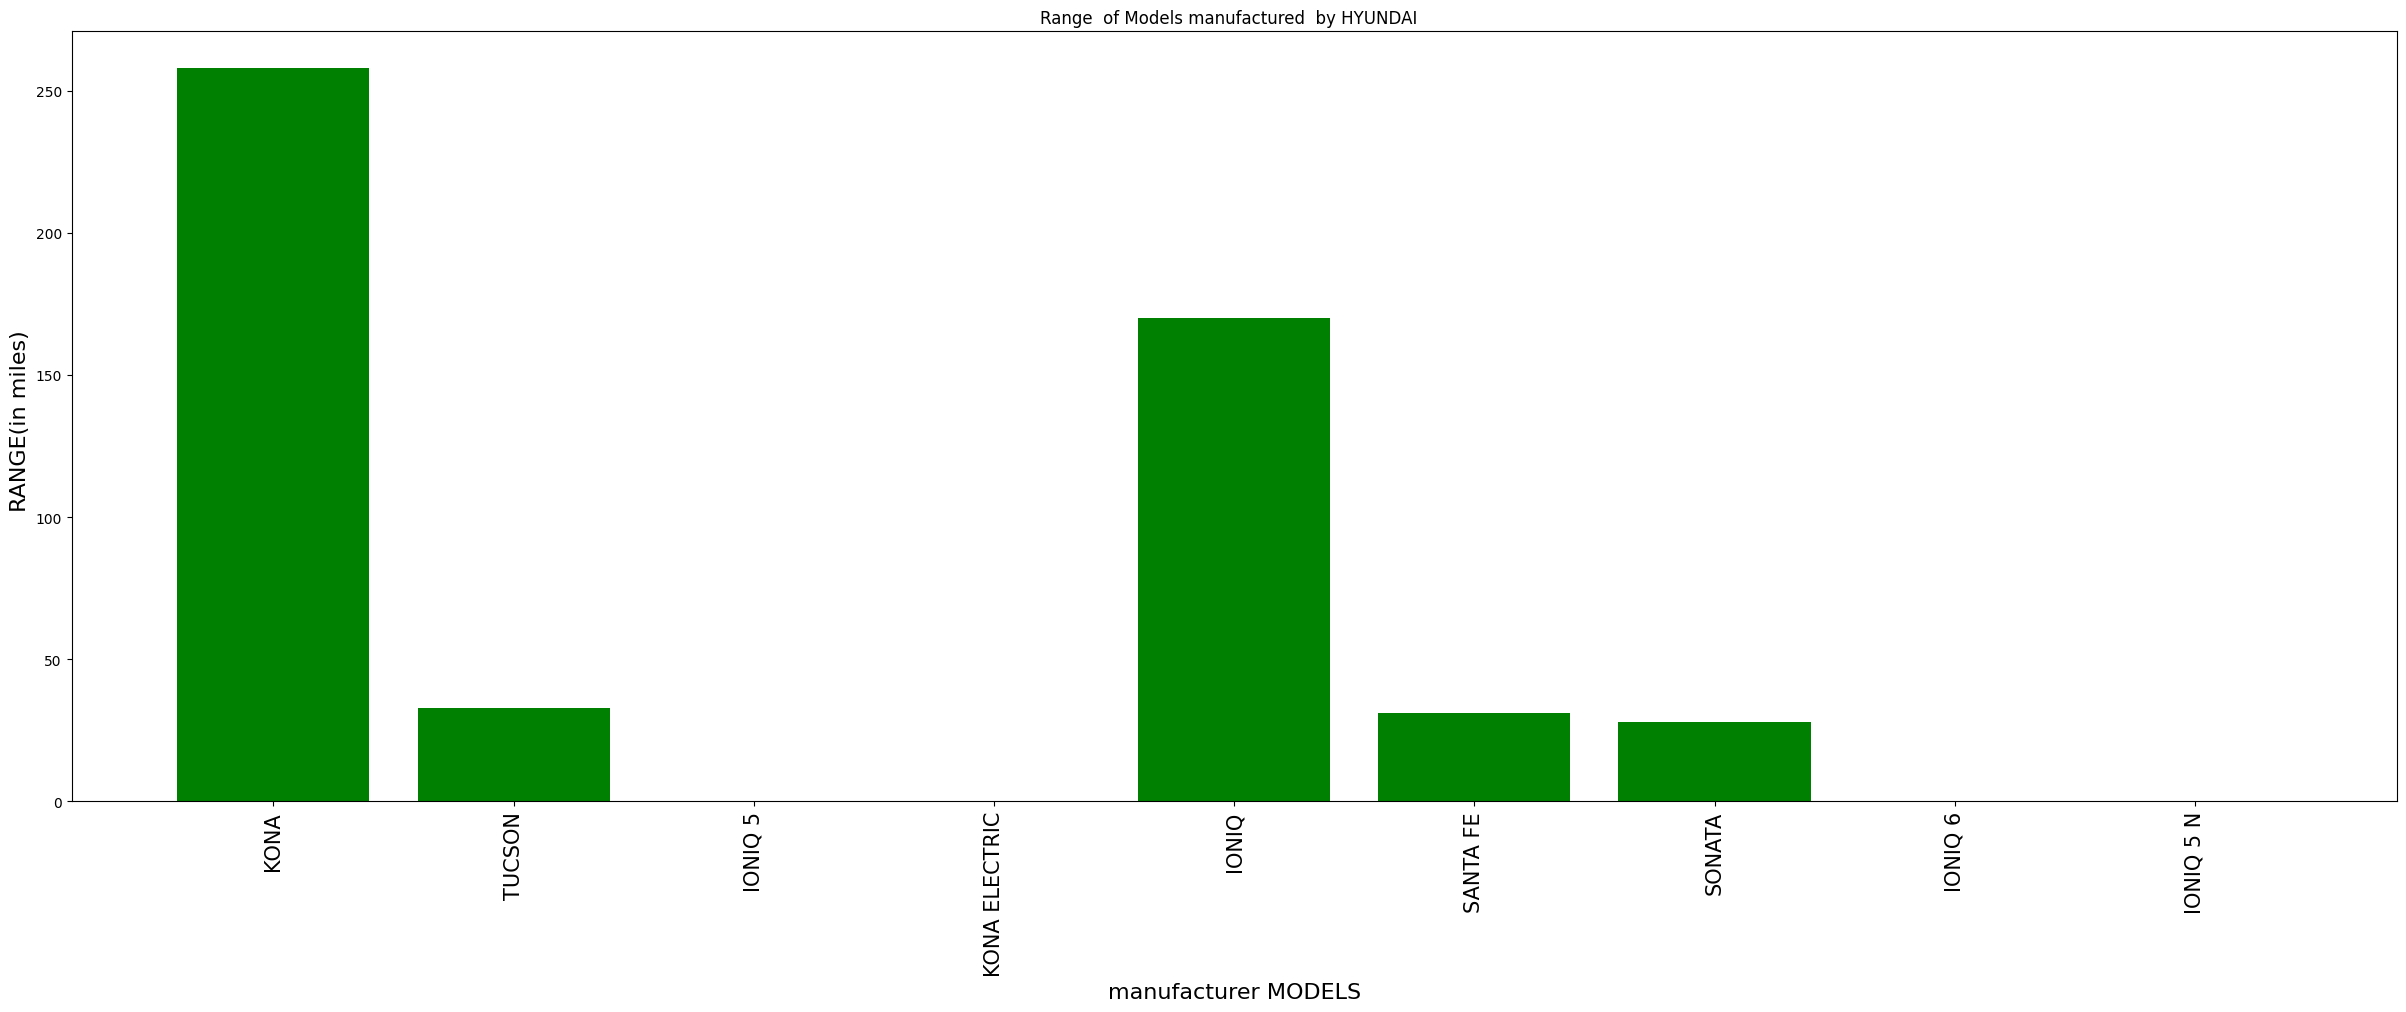

 Average electric range(miles) of RIVIAN  is Electric Range    0.0
dtype: float64
       Model  Electric Range
202      R1S             0.0
249      R1T             0.0
302      R1S             0.0
375      R1T             0.0
399      R1T             0.0
...      ...             ...
193898   R1S             0.0
193997   R1S             0.0
194079   R1T             0.0
194088   R1T             0.0
194116   R1S             0.0

[4912 rows x 2 columns]


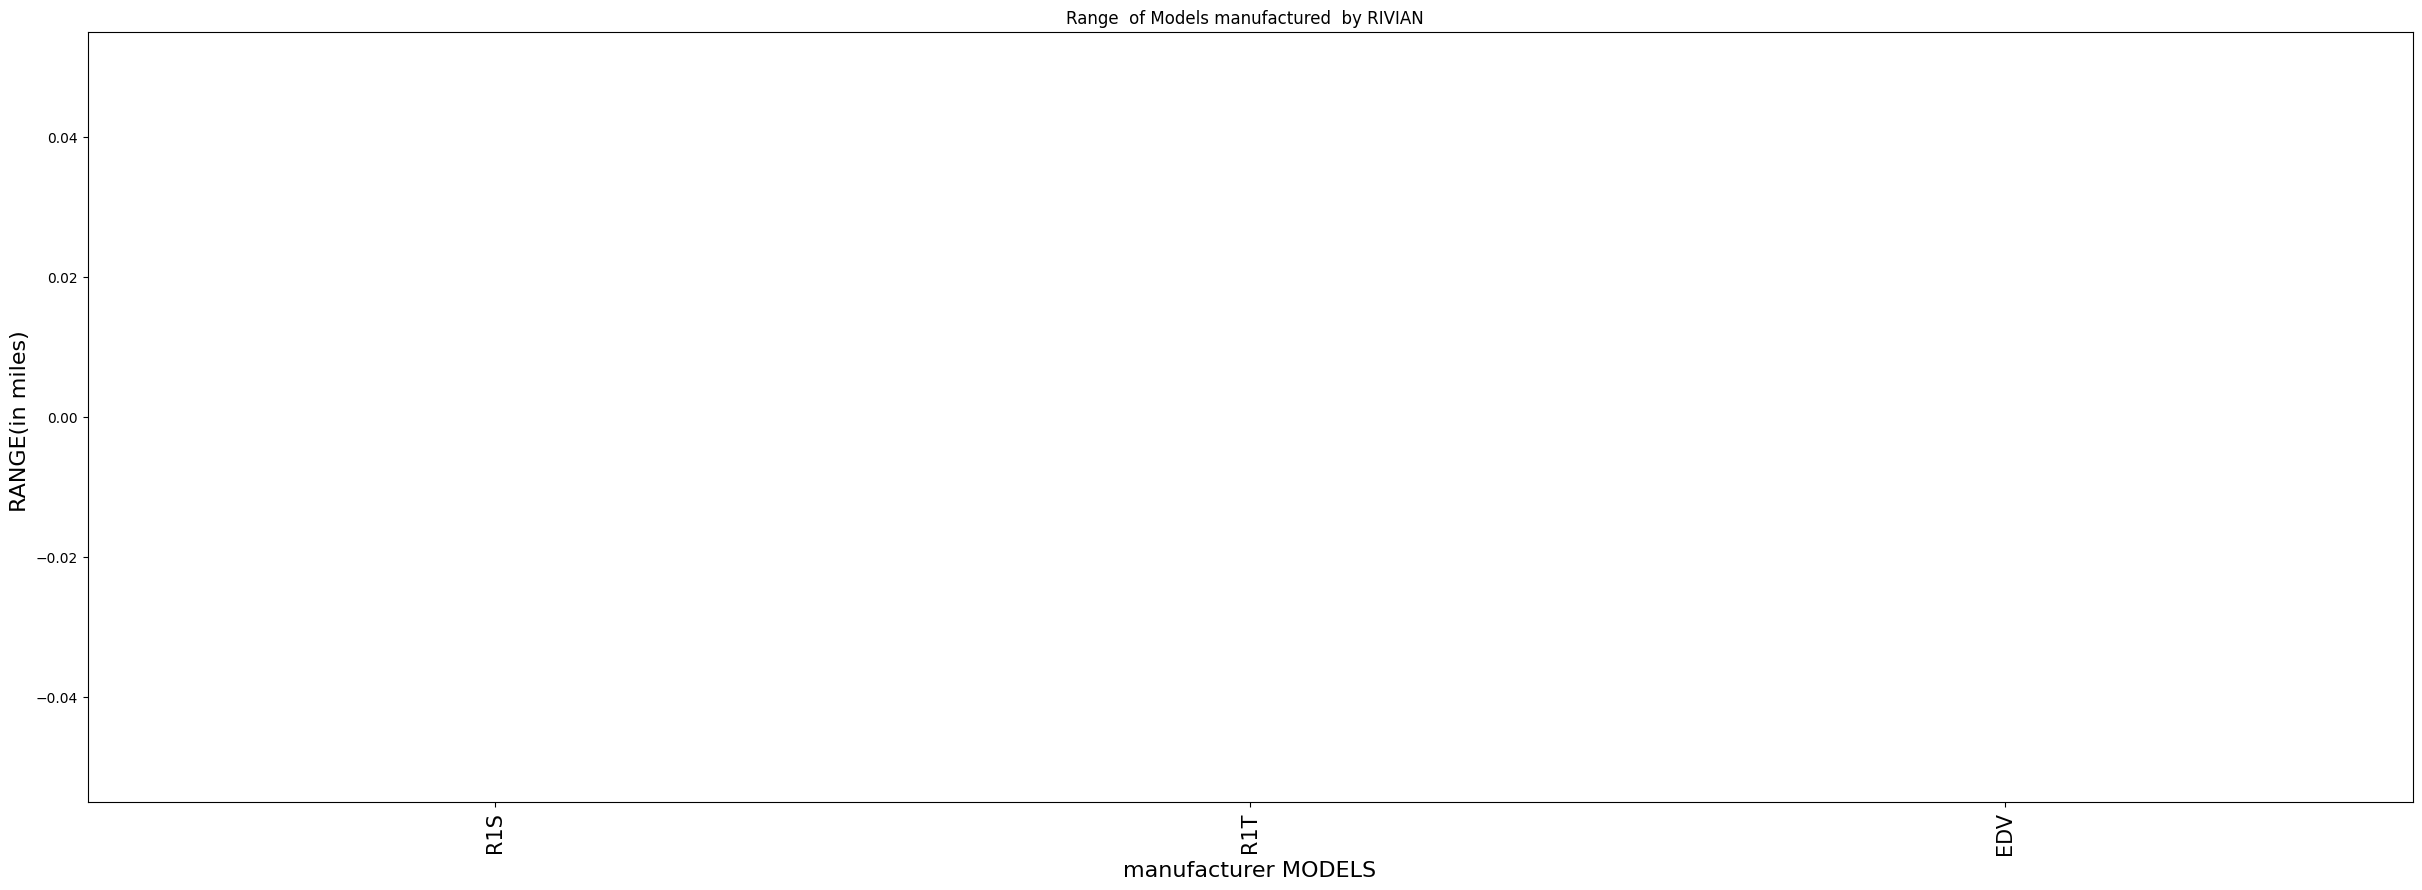

 Average electric range(miles) of VOLVO  is Electric Range    17.074682
dtype: float64
       Model  Electric Range
19      XC90            18.0
35      XC90            18.0
128      S60            22.0
174     XC60            35.0
262     XC60            17.0
...      ...             ...
193986  XC60            35.0
194011  XC60            35.0
194017  XC40             0.0
194067  XC60            35.0
194148  XC60            18.0

[4566 rows x 2 columns]


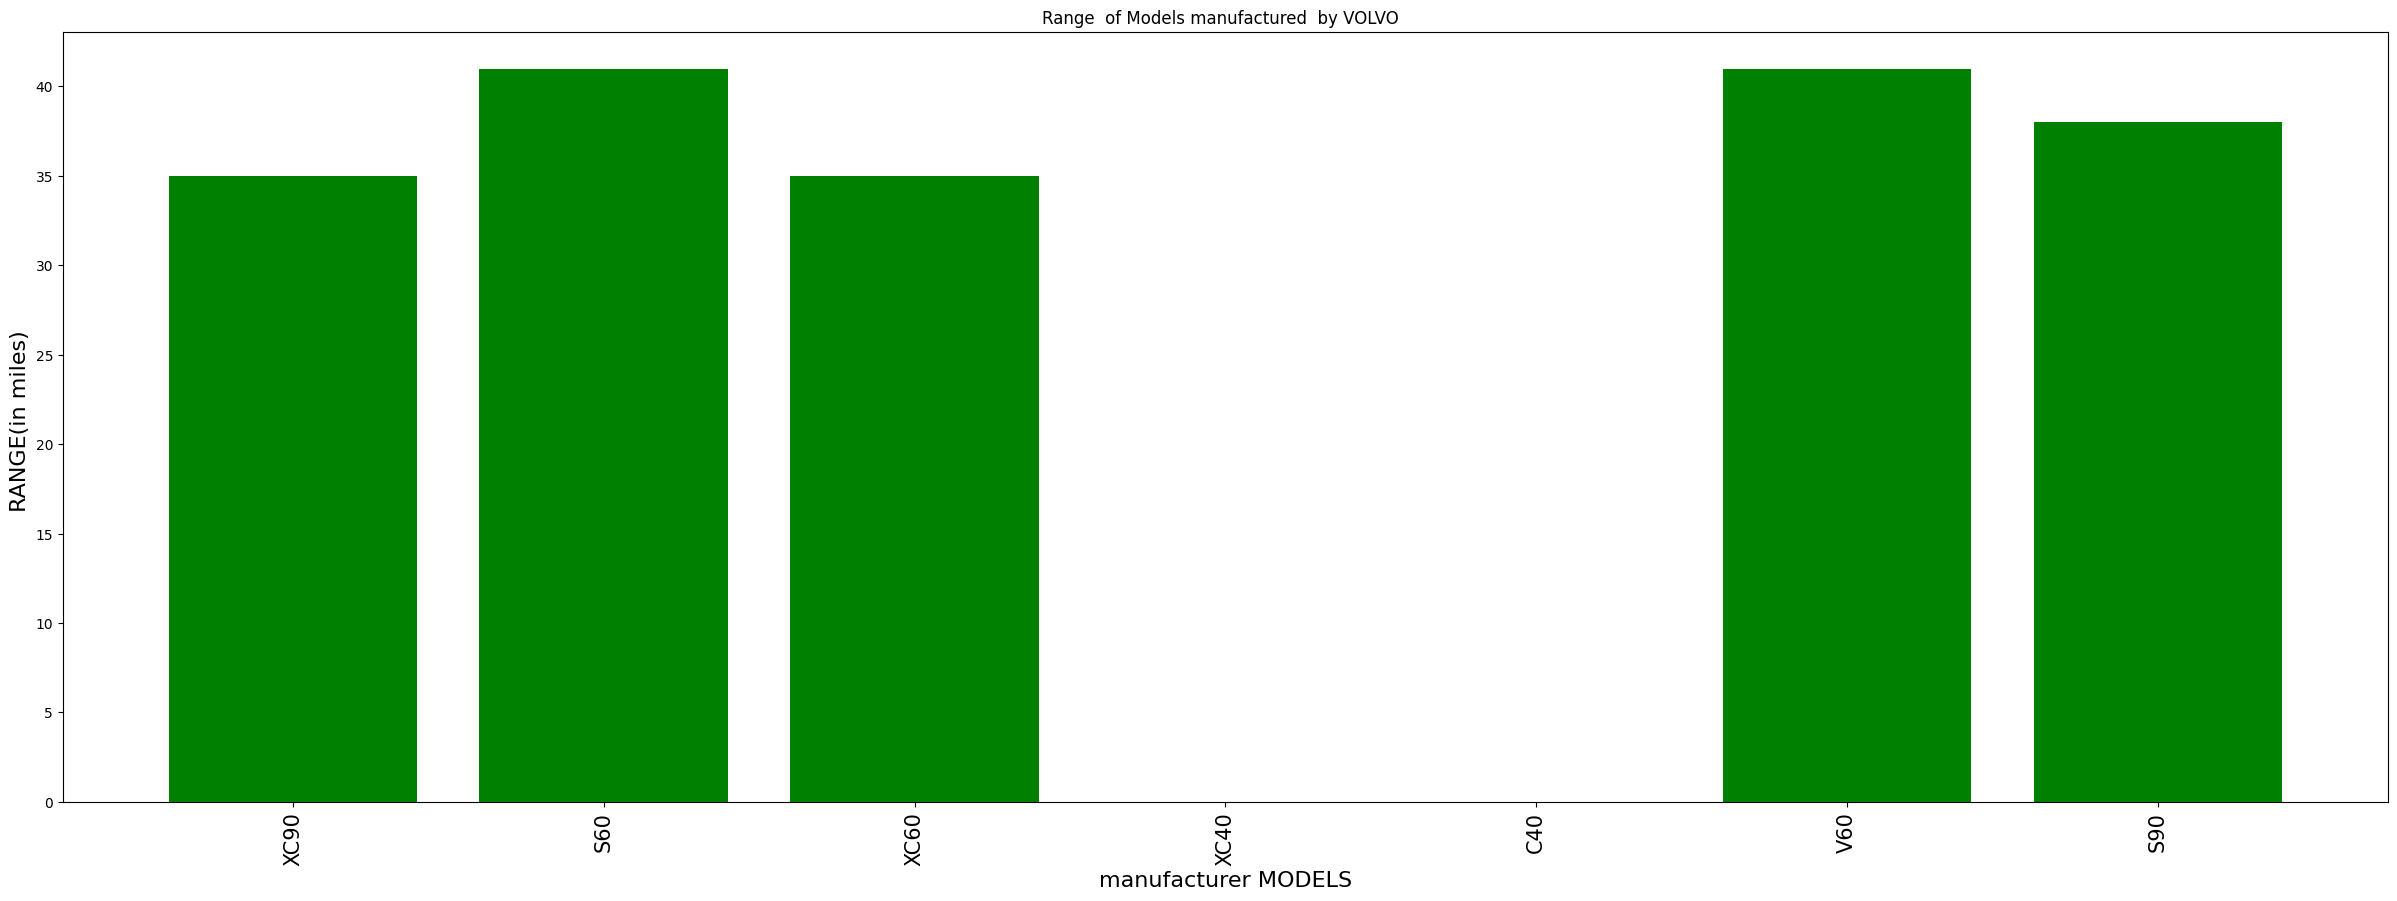

 Average electric range(miles) of AUDI  is Electric Range    46.491849
dtype: float64
         Model  Electric Range
42          Q5            23.0
56        Q5 E            23.0
89      E-TRON           204.0
115     E-TRON           204.0
284         Q4             0.0
...        ...             ...
193797    Q5 E            20.0
193939      A3            16.0
193991      Q8             0.0
193995      A3            16.0
194080  E-TRON           204.0

[3987 rows x 2 columns]


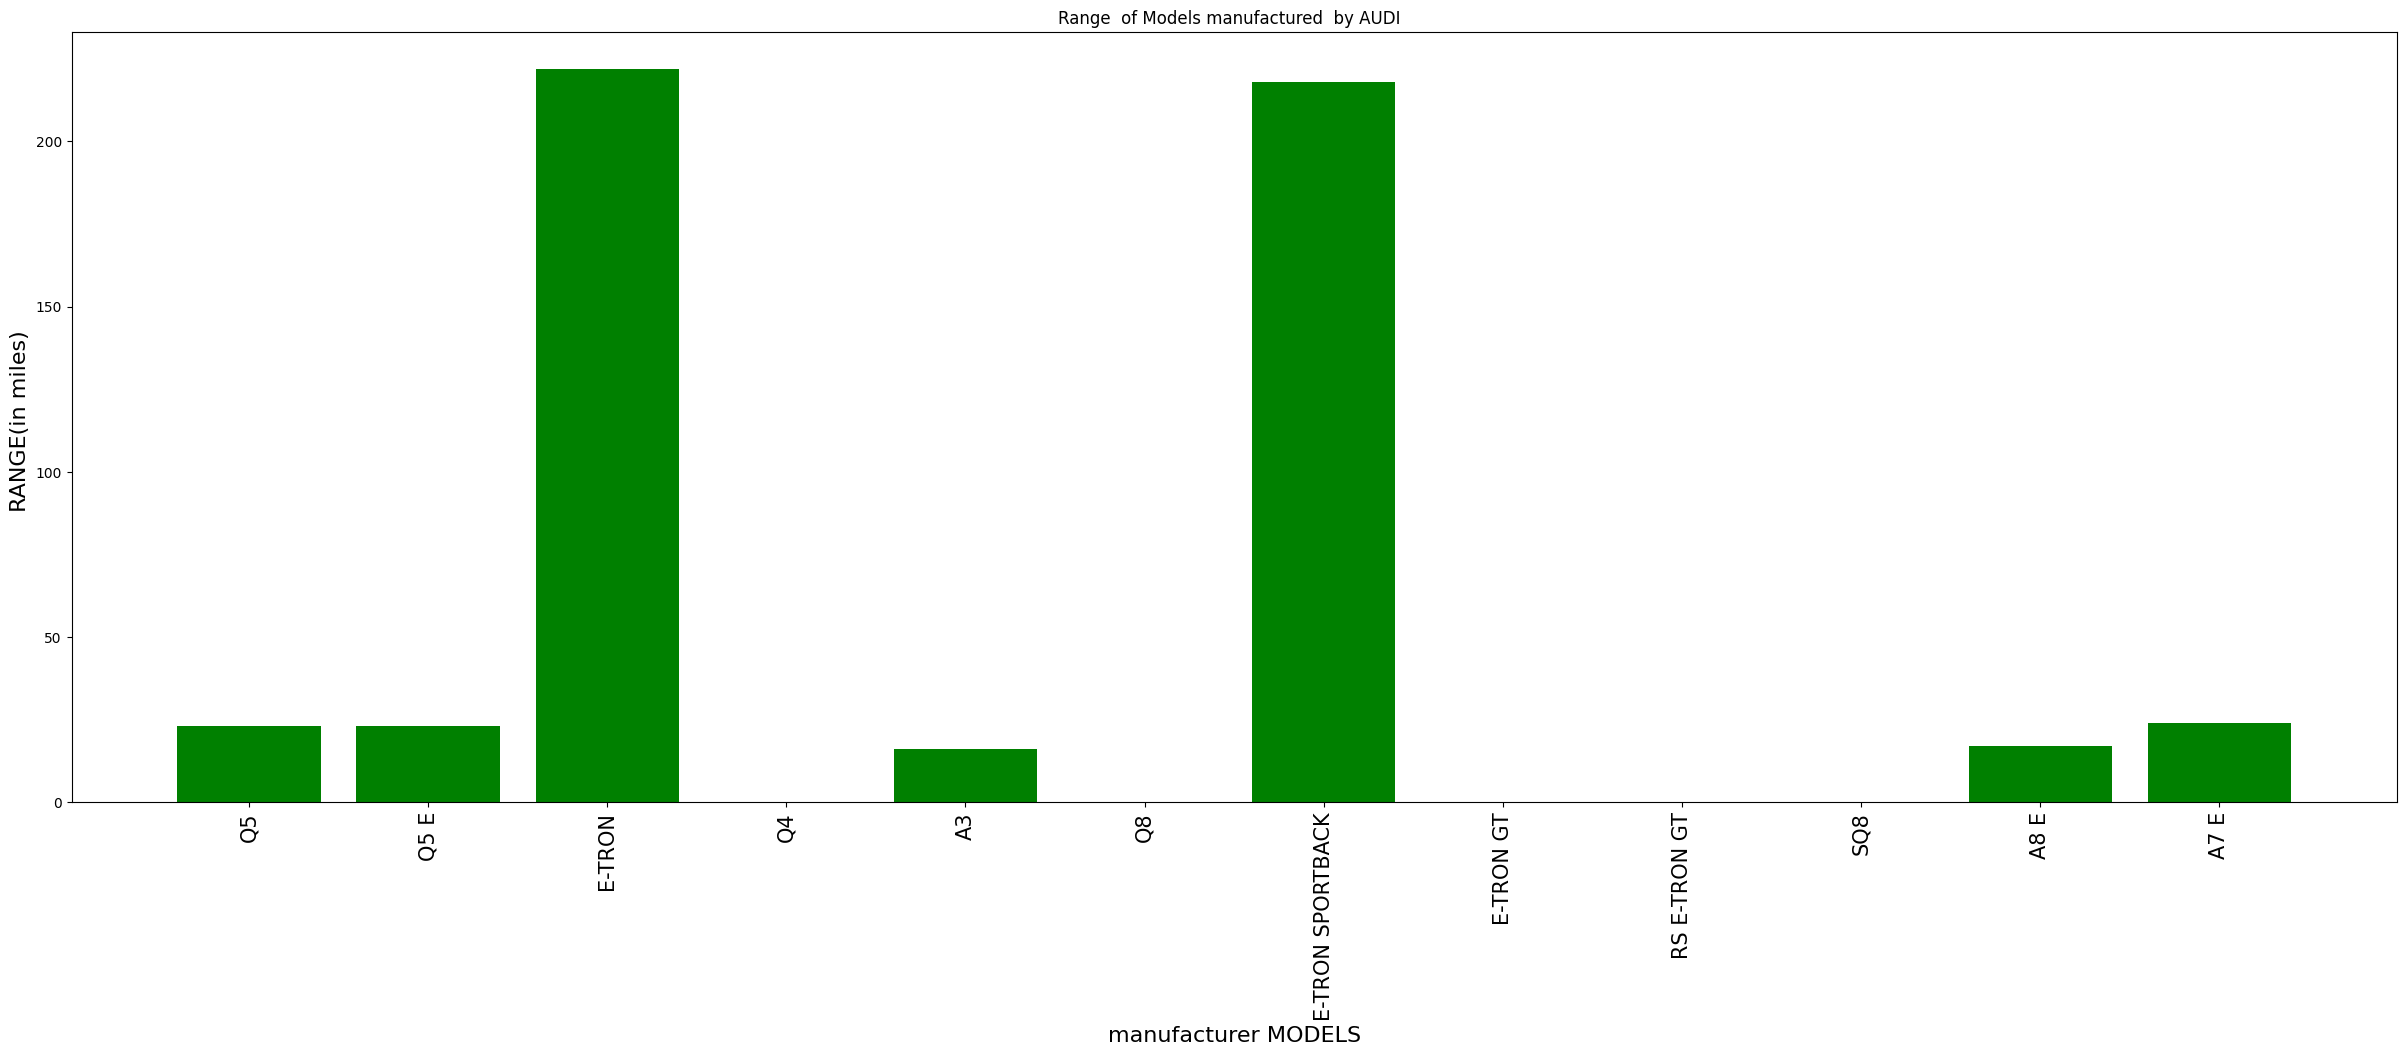

 Average electric range(miles) of CHRYSLER  is Electric Range    32.184845
dtype: float64
           Model  Electric Range
291     PACIFICA            32.0
298     PACIFICA            32.0
345     PACIFICA            33.0
362     PACIFICA            32.0
544     PACIFICA            32.0
...          ...             ...
193839  PACIFICA            33.0
193923  PACIFICA            32.0
193984  PACIFICA            32.0
194194  PACIFICA            32.0
194214  PACIFICA            32.0

[3484 rows x 2 columns]


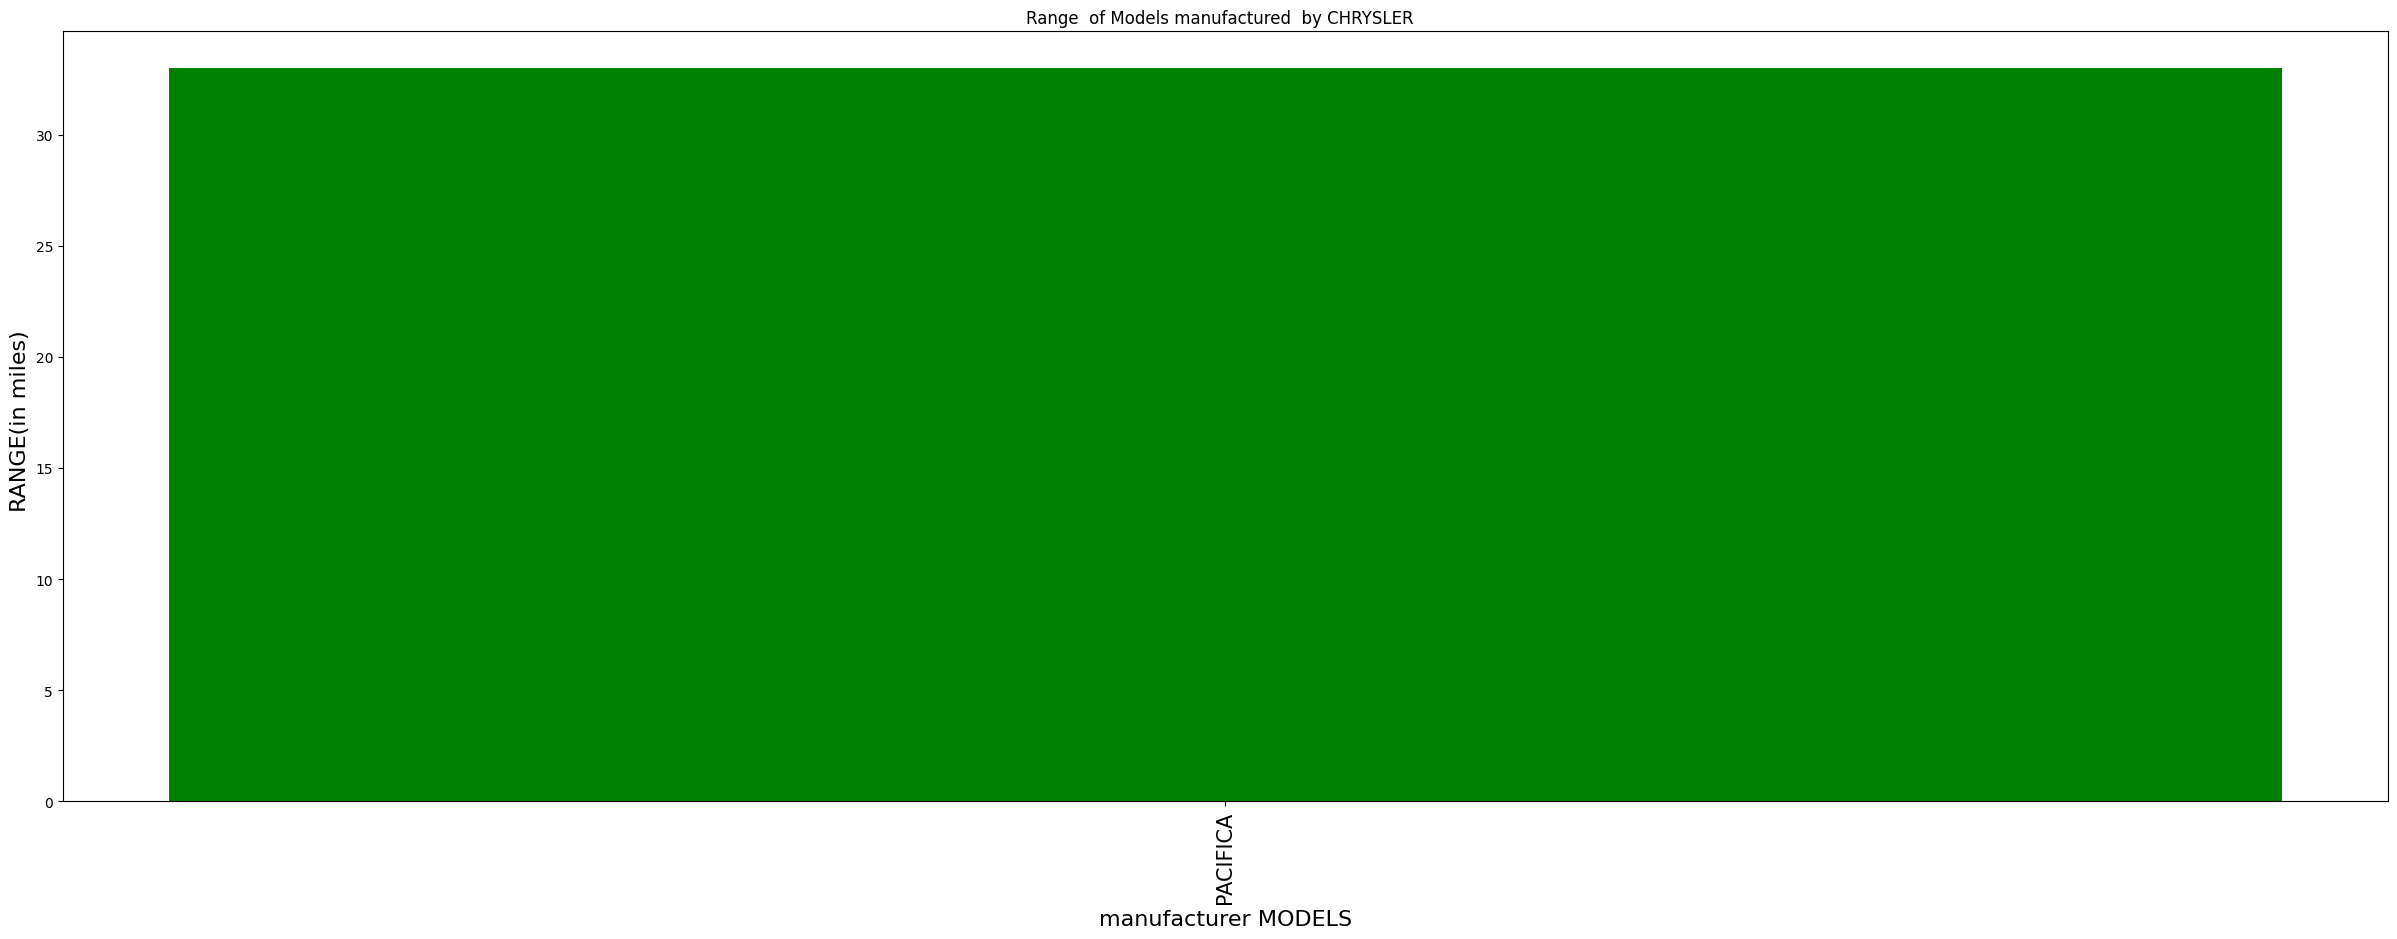

 Average electric range(miles) of MERCEDES-BENZ  is Electric Range    9.266521
dtype: float64
                  Model  Electric Range
145           GLC-CLASS            10.0
200       EQS-CLASS SUV             0.0
208       EQS-CLASS SUV             0.0
297     EQE-CLASS SEDAN             0.0
321       EQE-CLASS SUV             0.0
...                 ...             ...
193955    EQE-CLASS SUV             0.0
193960    EQS-CLASS SUV             0.0
194066        EQB-CLASS             0.0
194070    EQS-CLASS SUV             0.0
194167        EQB-CLASS             0.0

[1833 rows x 2 columns]


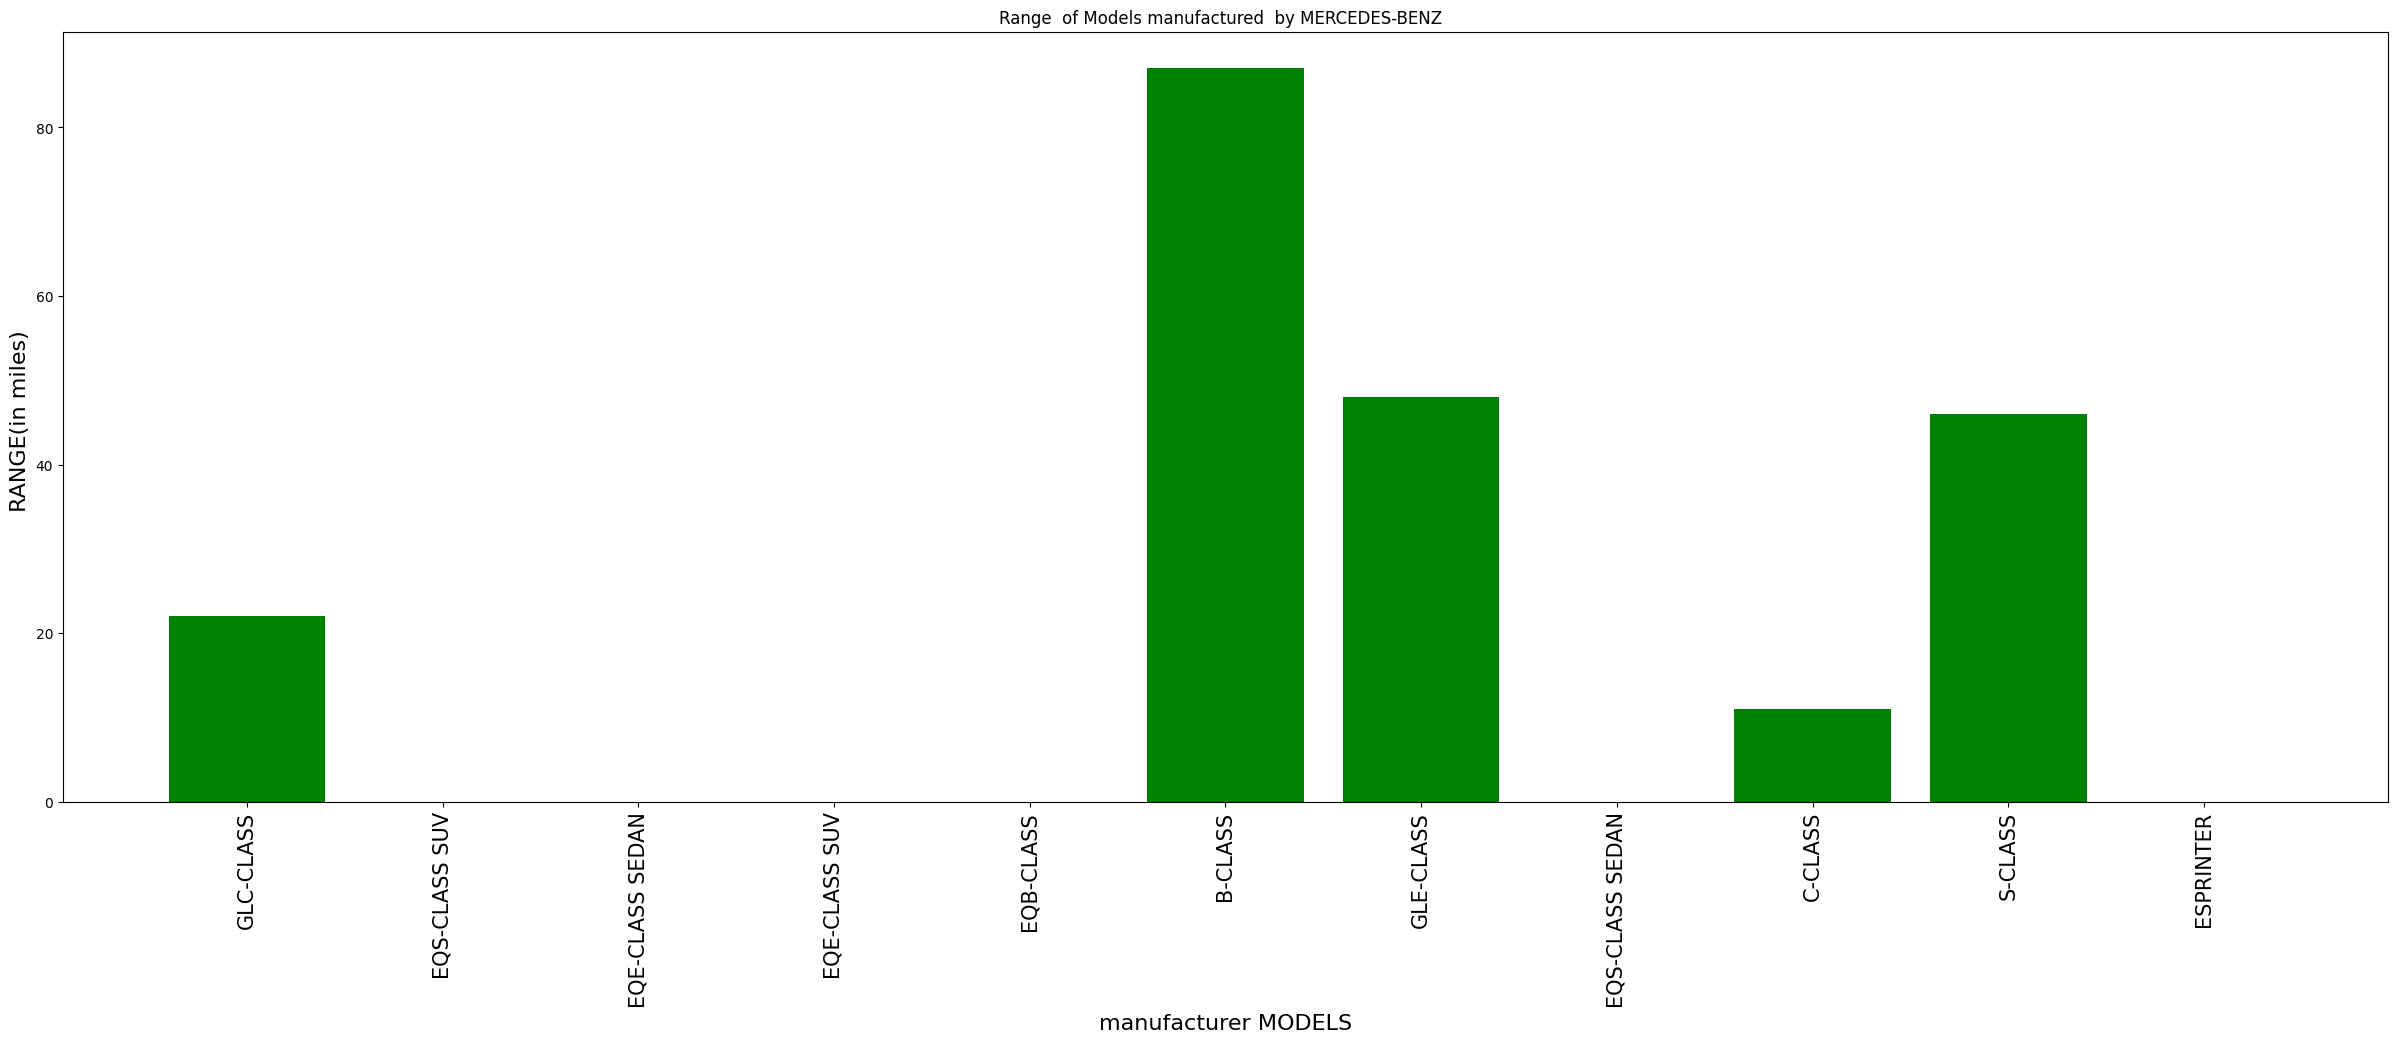

 Average electric range(miles) of PORSCHE  is Electric Range    44.359801
dtype: float64
           Model  Electric Range
8        CAYENNE            14.0
85       CAYENNE            14.0
272       TAYCAN             0.0
278     PANAMERA            16.0
326       TAYCAN             0.0
...          ...             ...
193024  PANAMERA            14.0
193411    TAYCAN             0.0
193570   CAYENNE            14.0
193918    TAYCAN           203.0
194175    TAYCAN             0.0

[1209 rows x 2 columns]


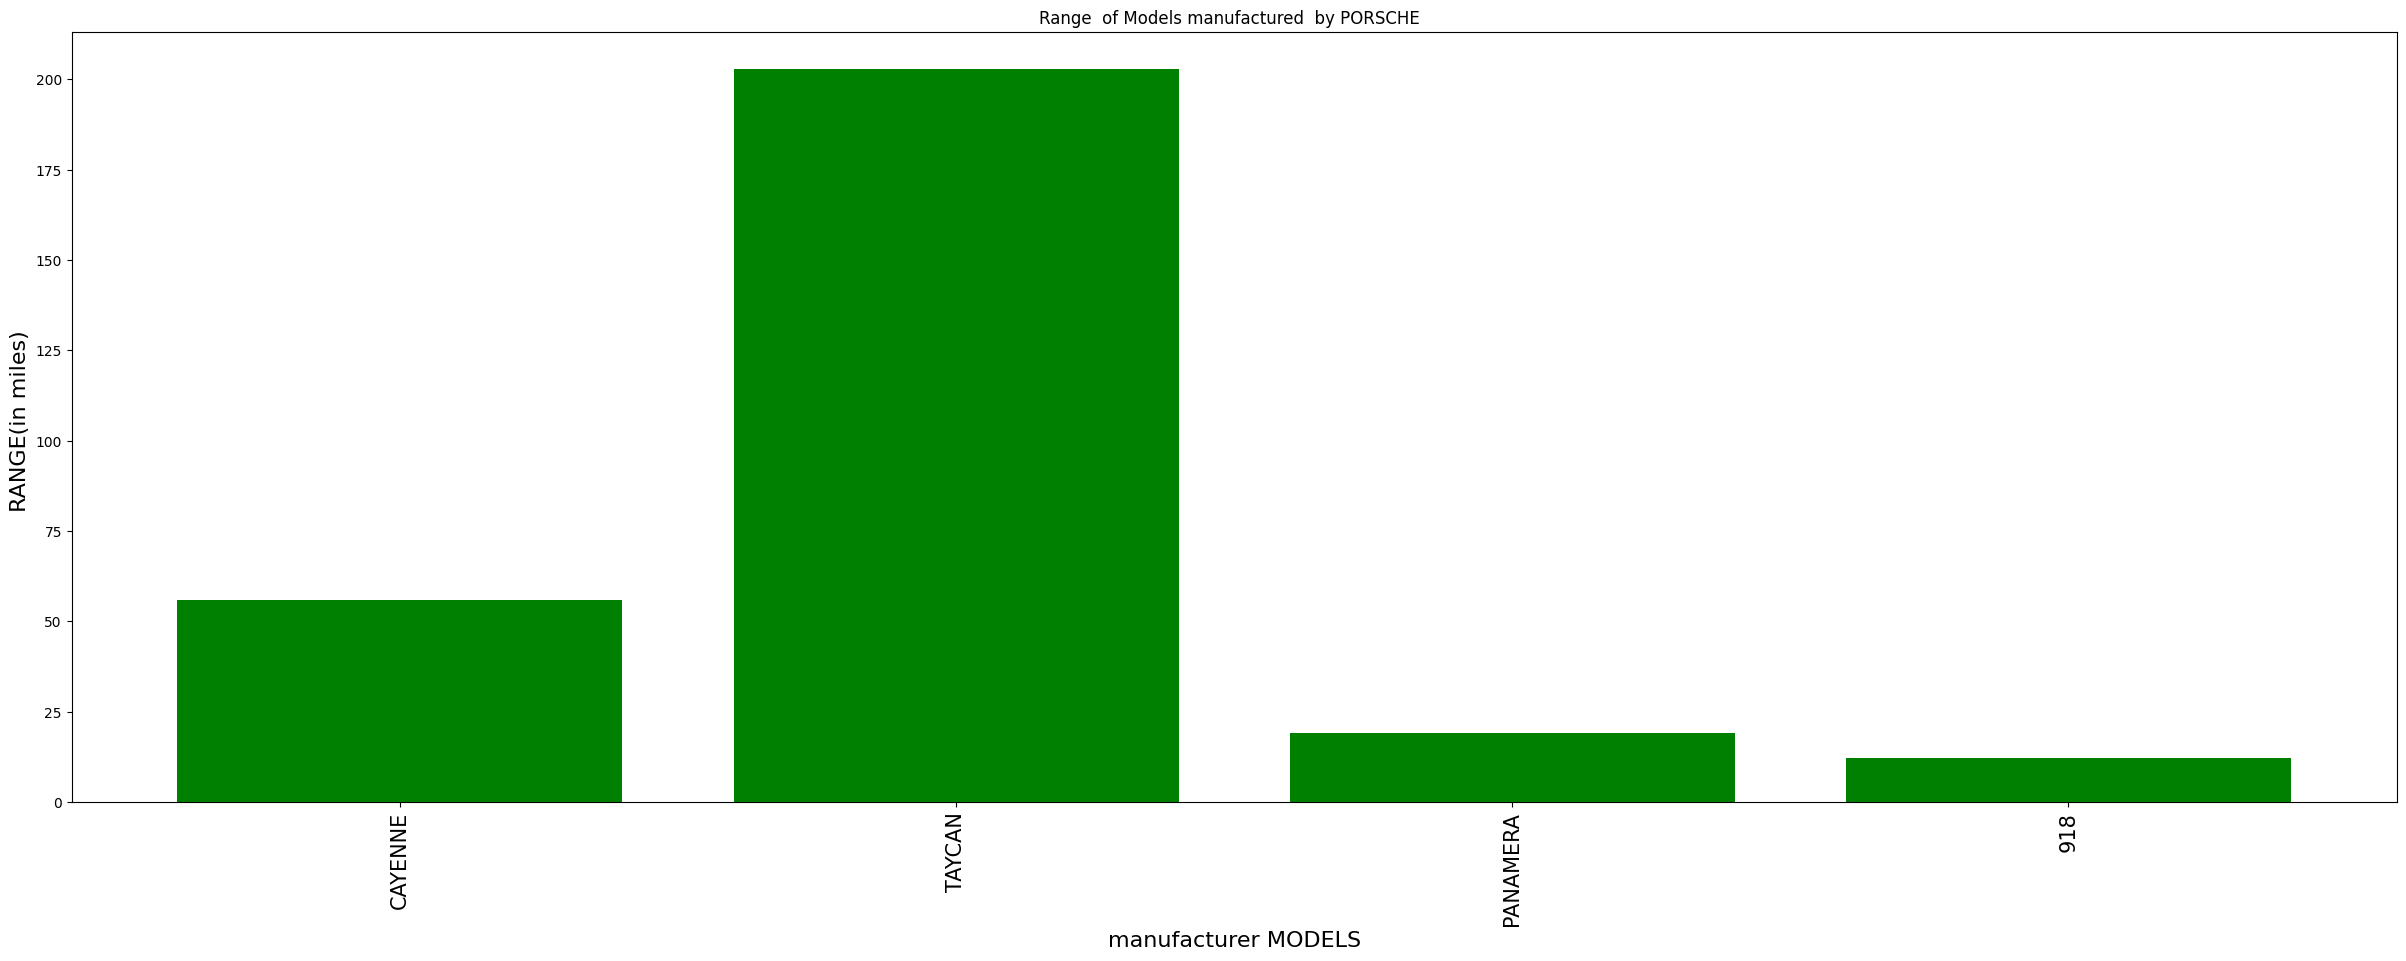

 Average electric range(miles) of SUBARU  is Electric Range    1.063492
dtype: float64
           Model  Electric Range
316     SOLTERRA             0.0
773     SOLTERRA             0.0
901     SOLTERRA             0.0
998     SOLTERRA             0.0
1348    SOLTERRA             0.0
...          ...             ...
193630  SOLTERRA             0.0
193634  SOLTERRA             0.0
194000  SOLTERRA             0.0
194057  SOLTERRA             0.0
194099  SOLTERRA             0.0

[1071 rows x 2 columns]


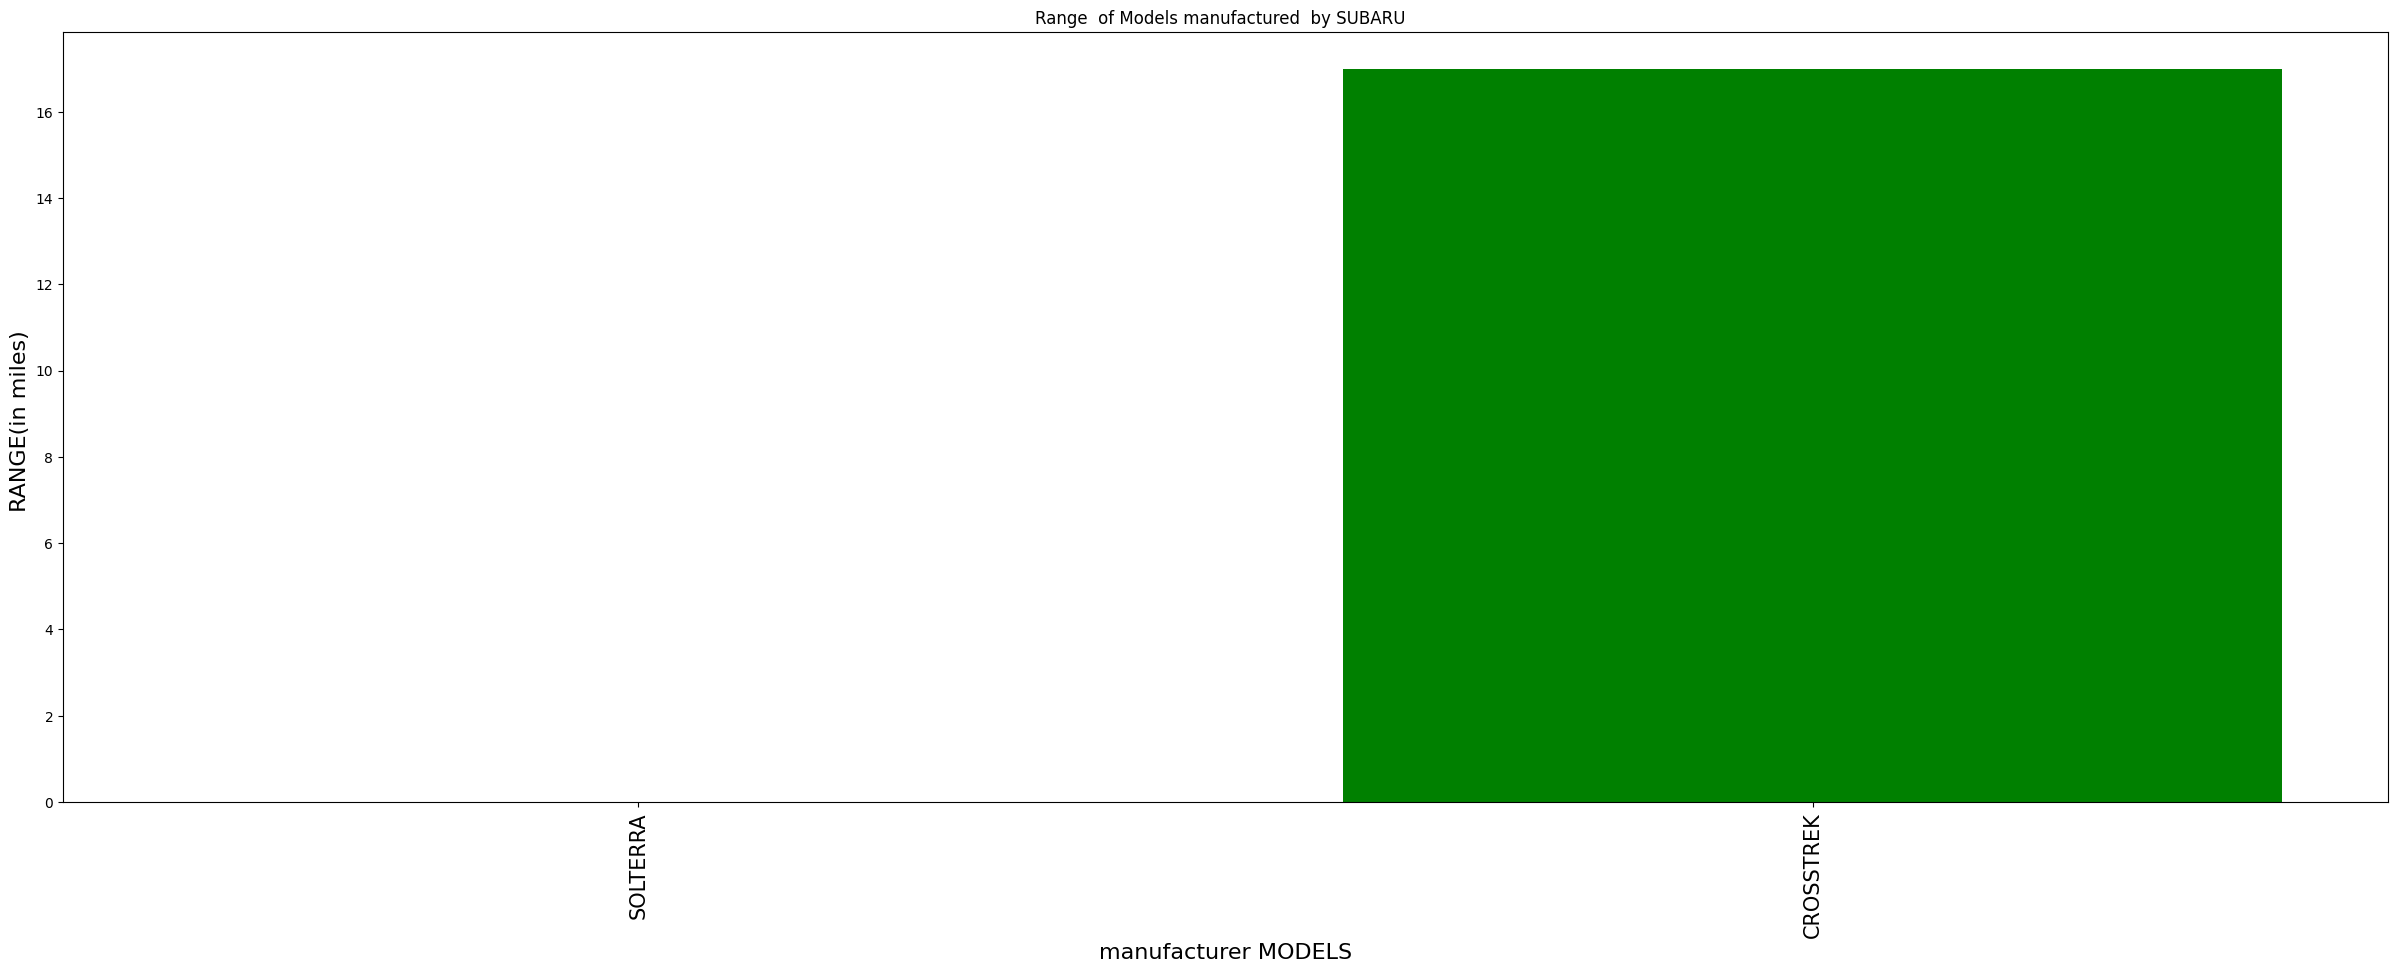

 Average electric range(miles) of POLESTAR  is Electric Range    34.53513
dtype: float64
       Model  Electric Range
138      PS2             0.0
454      PS2             0.0
947      PS2           233.0
962      PS2             0.0
1164     PS2             0.0
...      ...             ...
193403   PS2             0.0
193450   PS2             0.0
193735   PS2             0.0
194037   PS2             0.0
194117   PS2           233.0

[1039 rows x 2 columns]


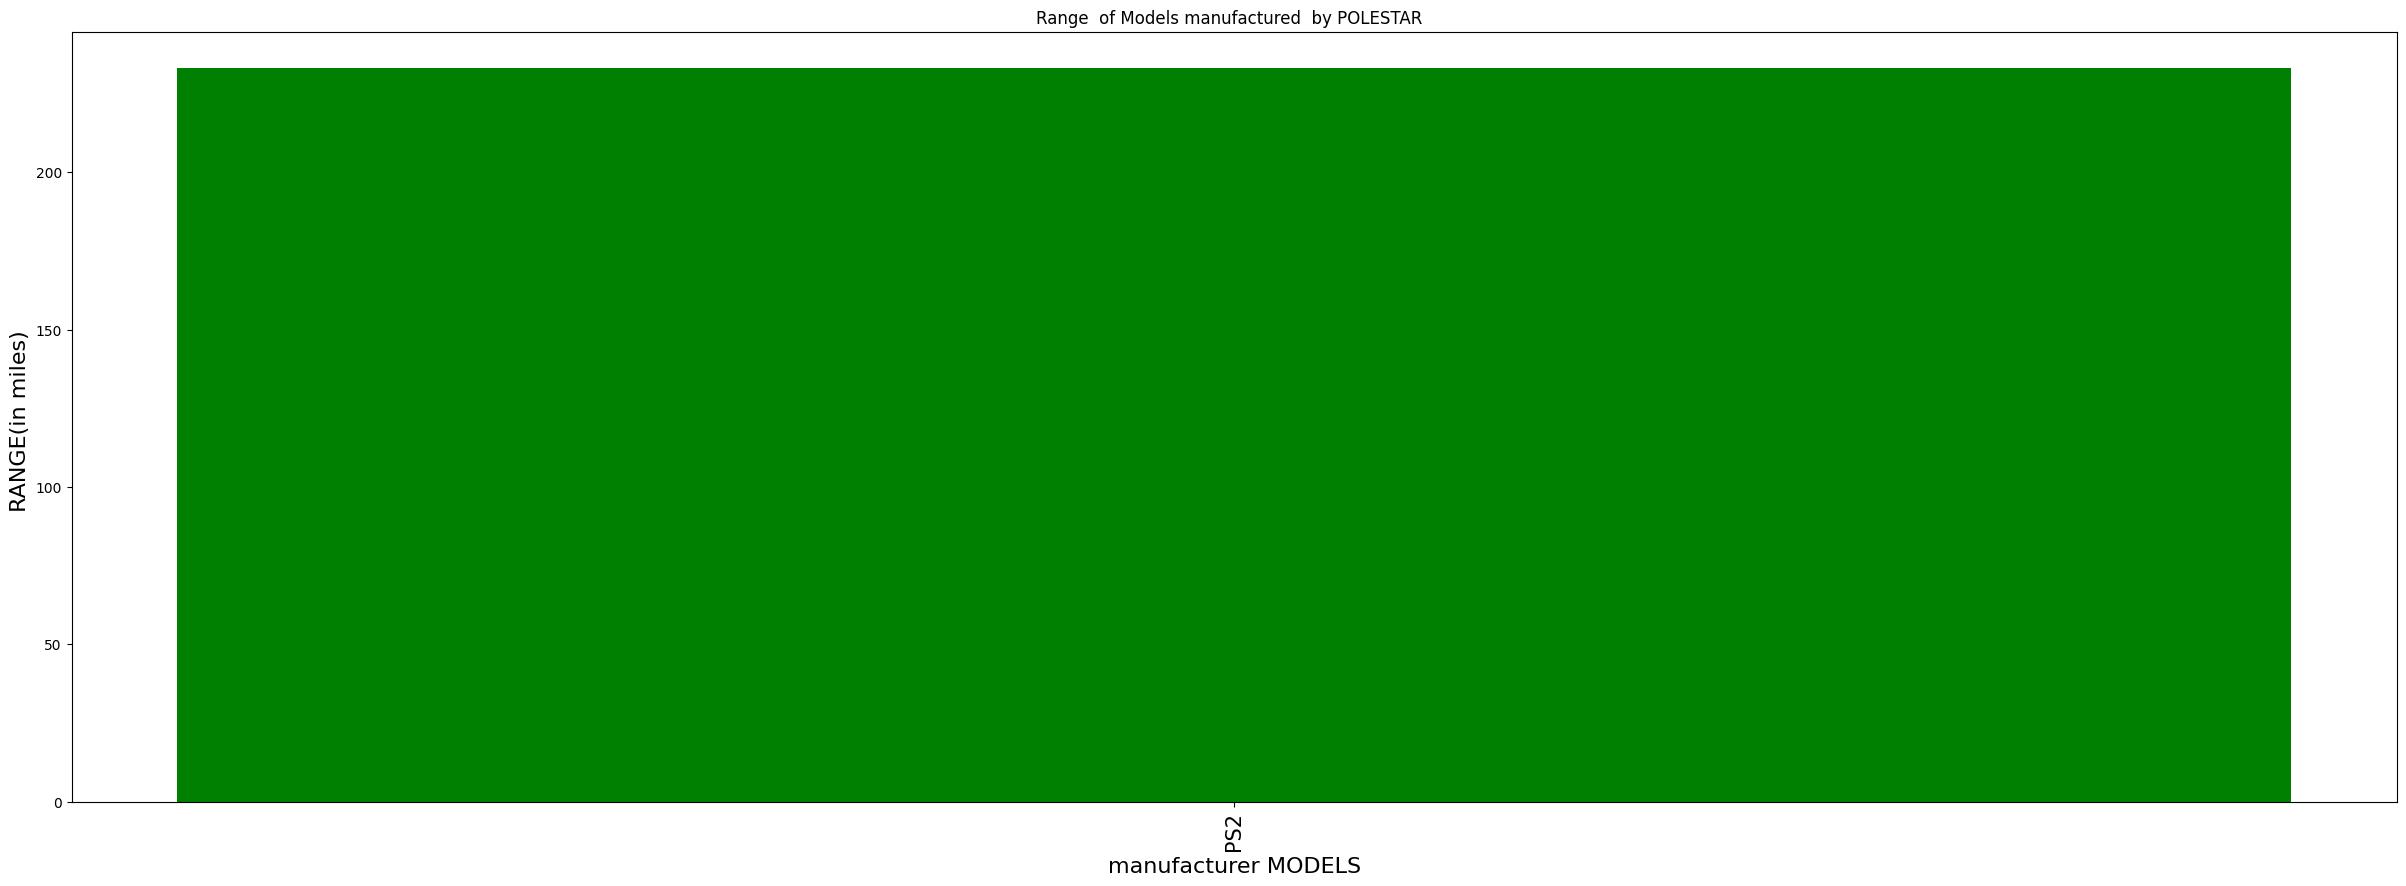

 Average electric range(miles) of MITSUBISHI  is Electric Range    30.955179
dtype: float64
            Model  Electric Range
216     OUTLANDER            38.0
659     OUTLANDER            38.0
776        I-MIEV            62.0
950     OUTLANDER            38.0
1394    OUTLANDER            22.0
...           ...             ...
193282  OUTLANDER            38.0
193311  OUTLANDER            38.0
193571  OUTLANDER            38.0
193862     I-MIEV            62.0
194159  OUTLANDER            38.0

[1004 rows x 2 columns]


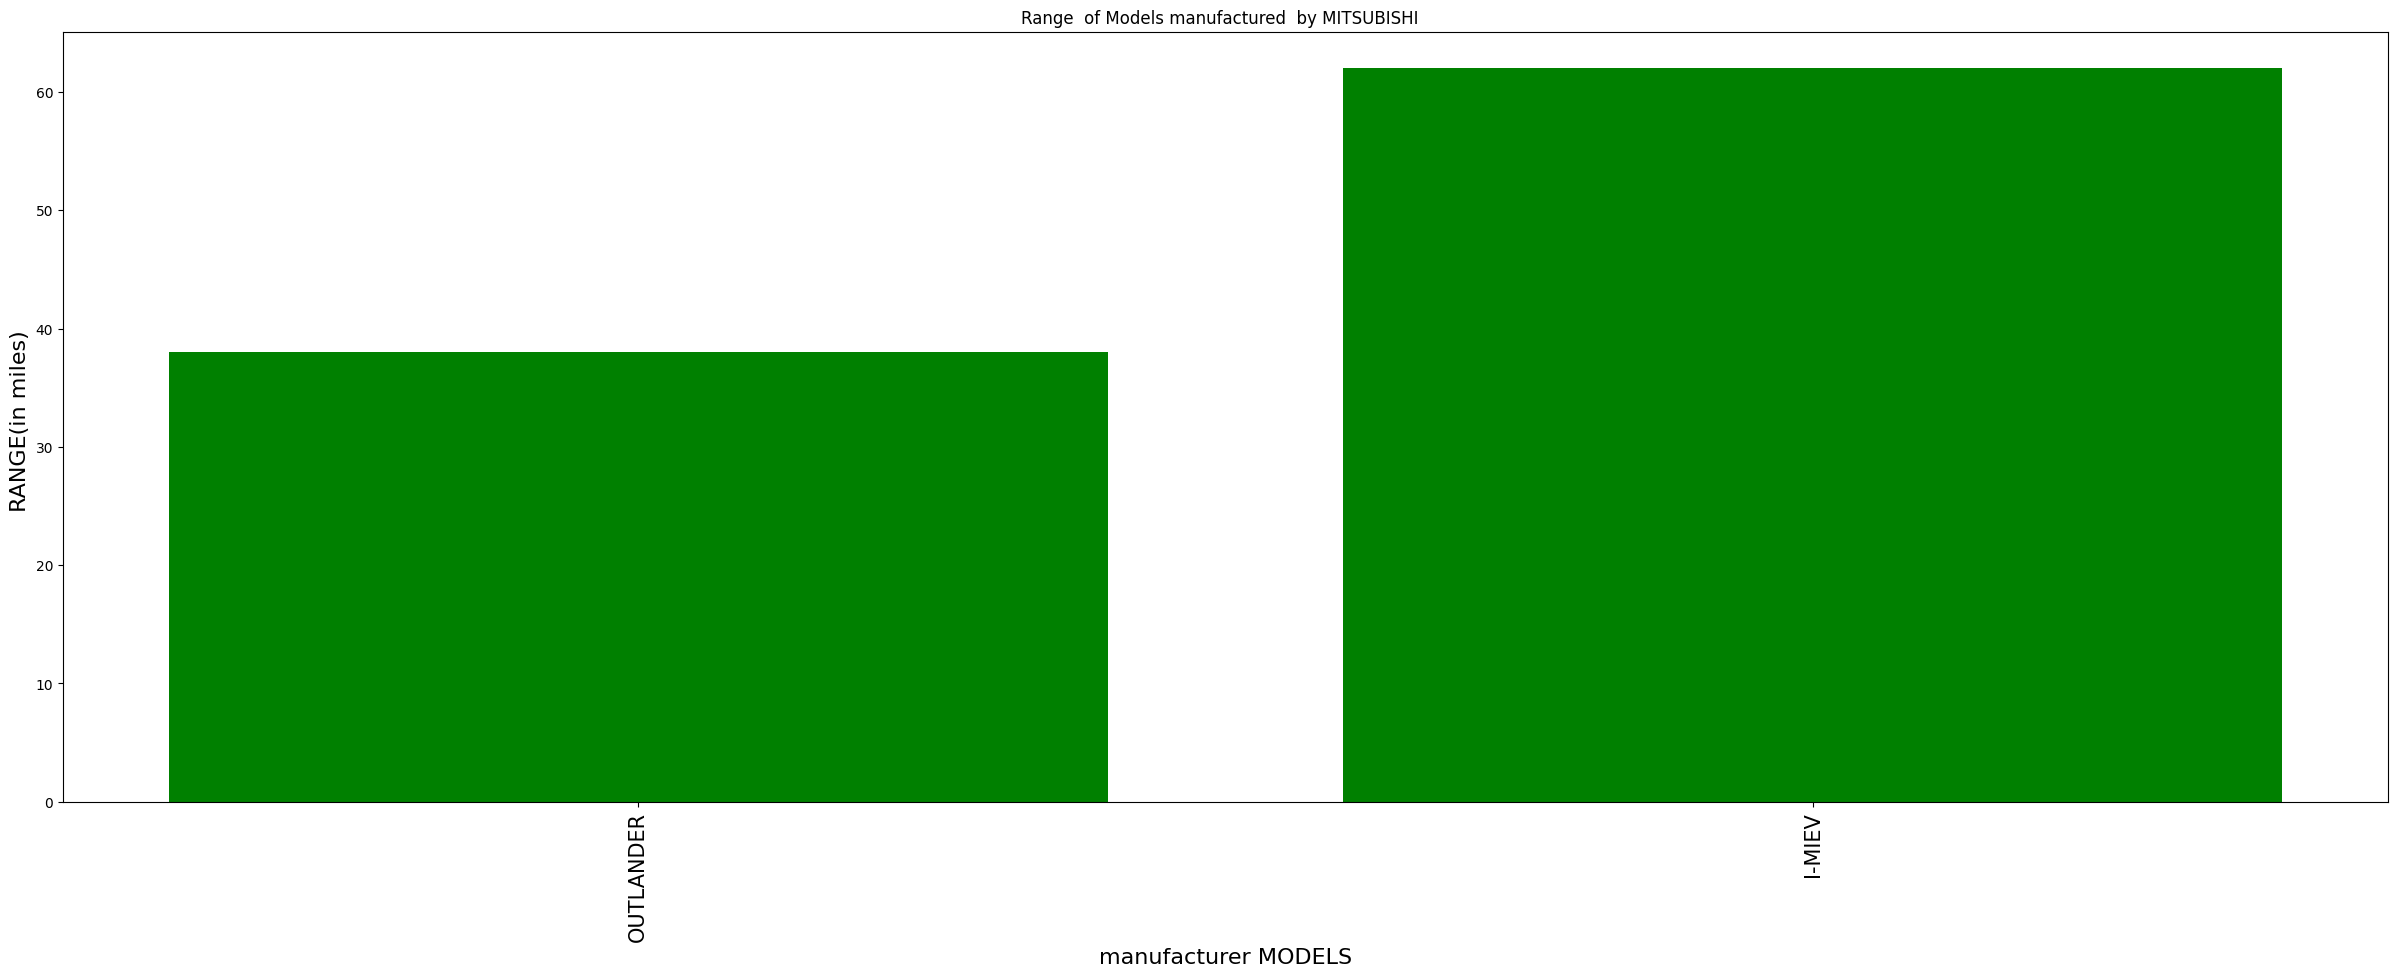

 Average electric range(miles) of MINI  is Electric Range    16.613614
dtype: float64
             Model  Electric Range
25      COUNTRYMAN            12.0
71         HARDTOP           110.0
458        HARDTOP             0.0
868        HARDTOP             0.0
933        HARDTOP             0.0
...            ...             ...
193714     HARDTOP             0.0
193932     HARDTOP             0.0
193952     HARDTOP             0.0
193961  COUNTRYMAN            12.0
193998     HARDTOP             0.0

[999 rows x 2 columns]


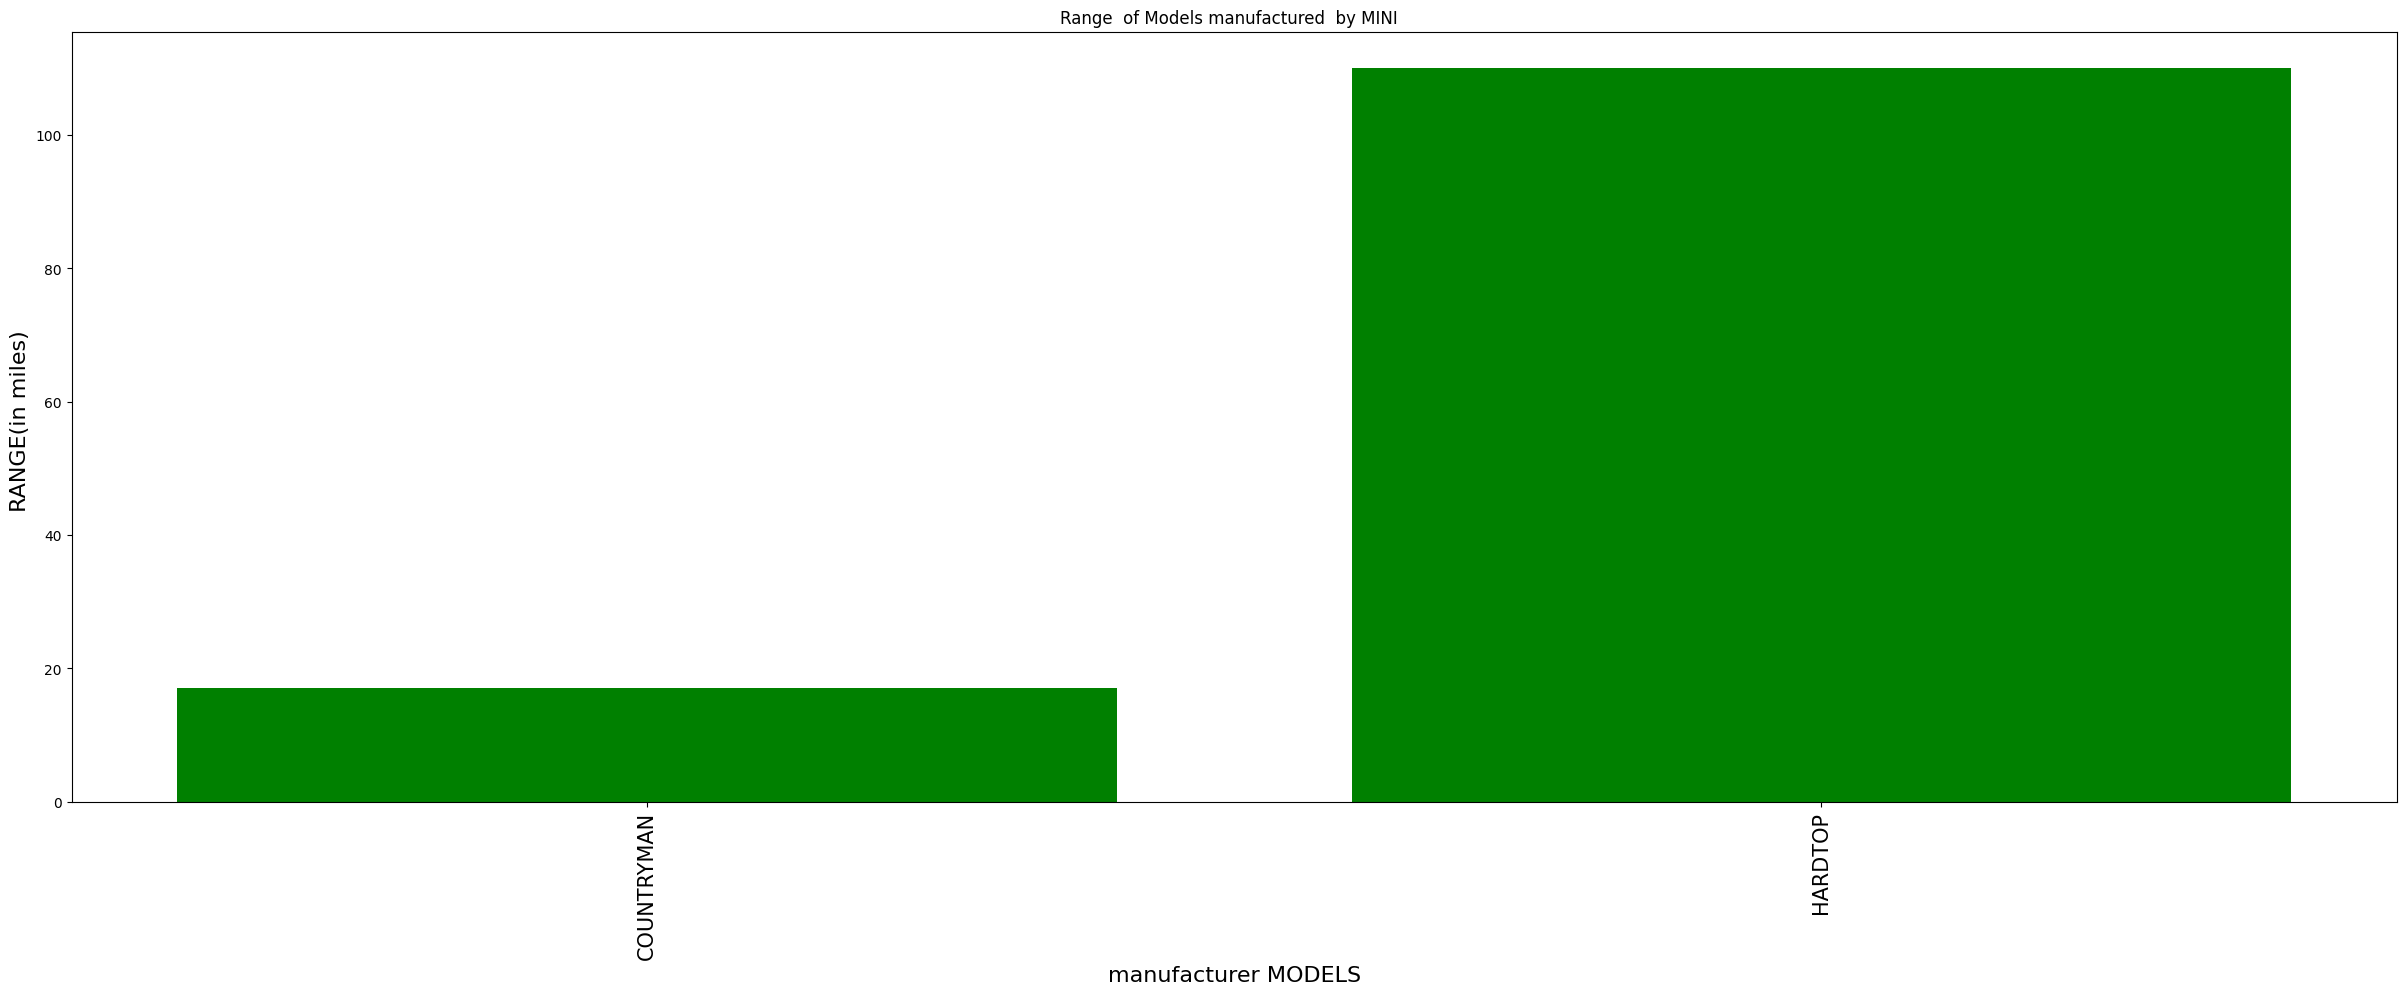

 Average electric range(miles) of HONDA  is Electric Range    44.597506
dtype: float64
          Model  Electric Range
223     CLARITY            47.0
254     CLARITY            47.0
460     CLARITY            47.0
711     CLARITY            47.0
718     CLARITY            47.0
...         ...             ...
191794  CLARITY            47.0
192827  CLARITY            47.0
193214  CLARITY            47.0
193590  CLARITY            47.0
194056  CLARITY            47.0

[882 rows x 2 columns]


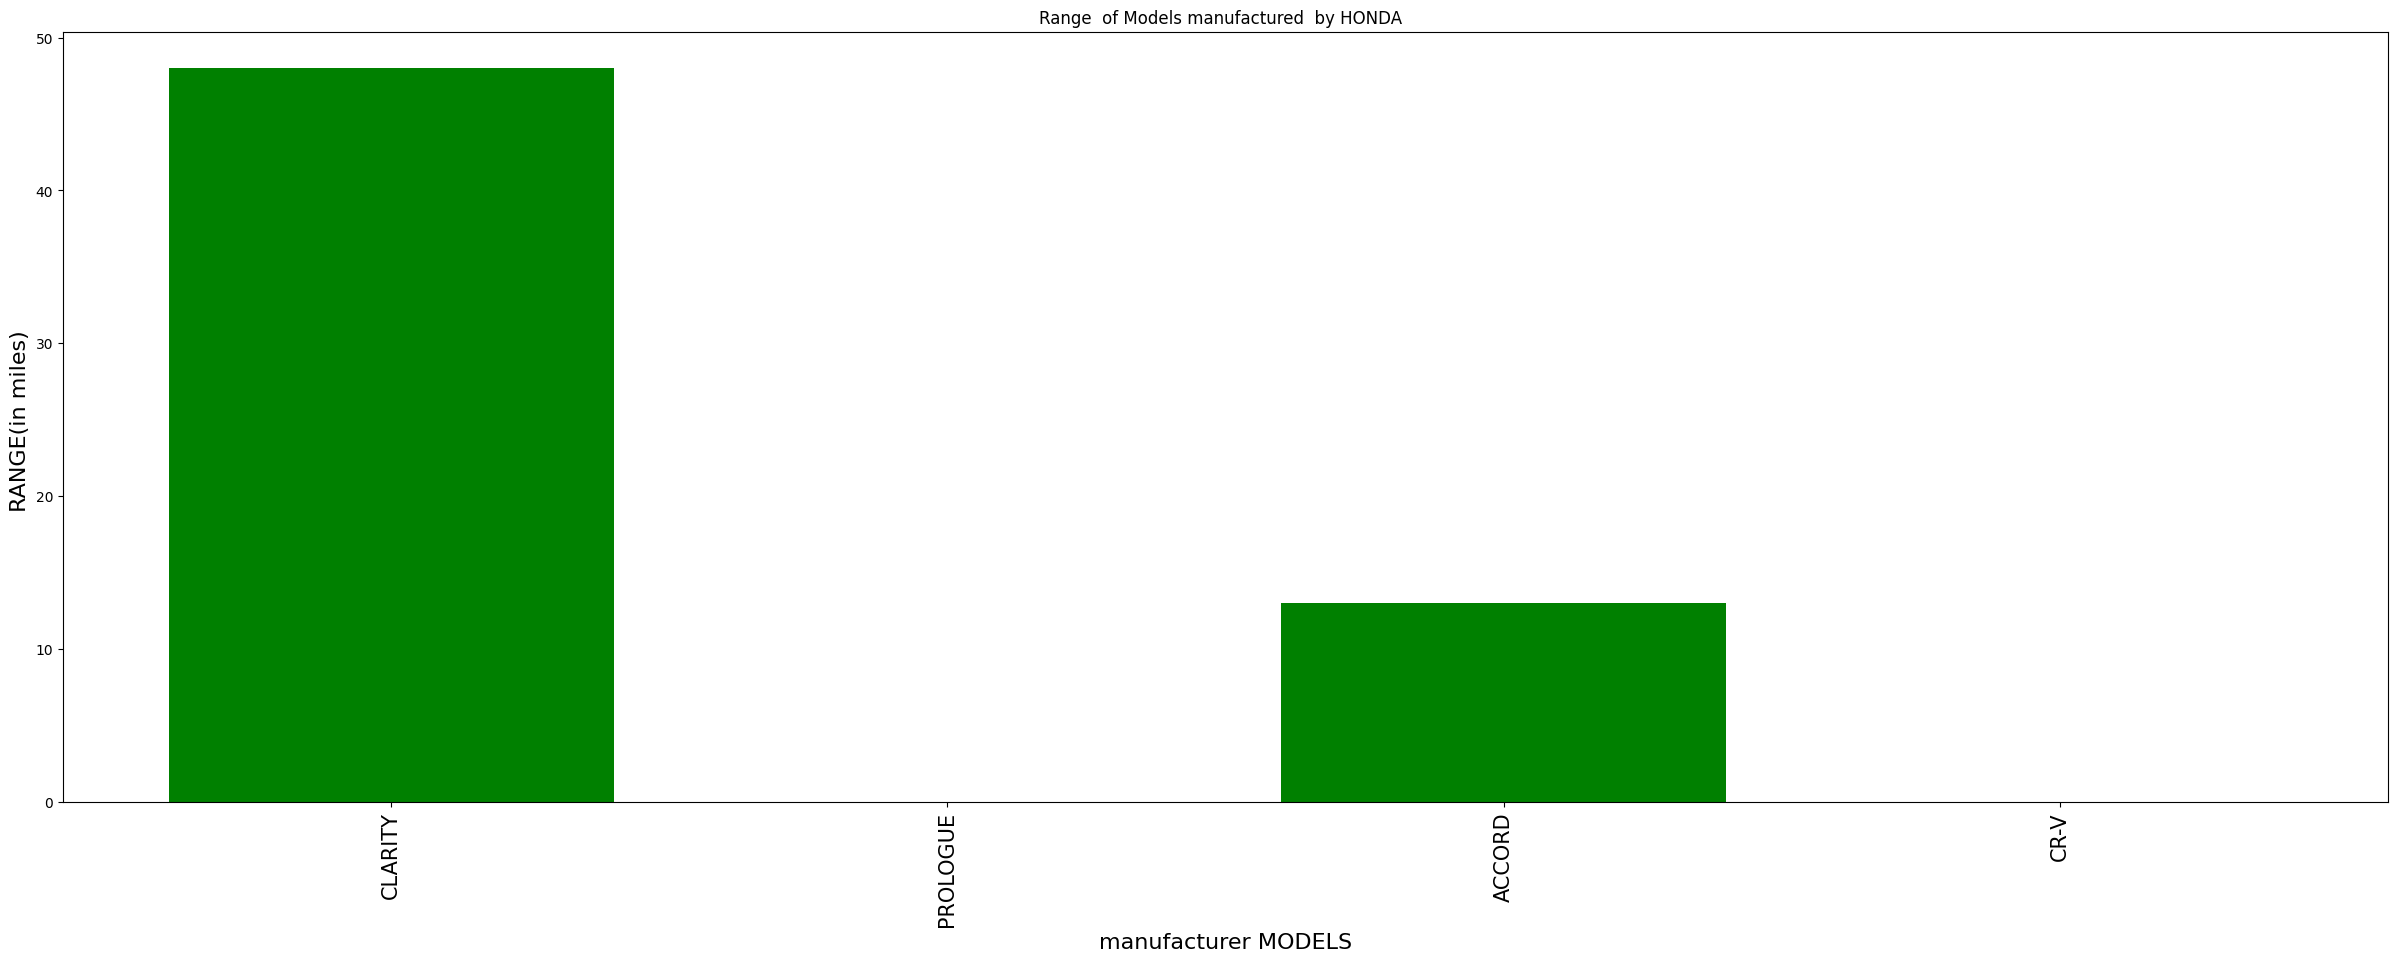

 Average electric range(miles) of FIAT  is Electric Range    85.089533
dtype: float64
       Model  Electric Range
74       500            87.0
119      500            87.0
153      500            84.0
396      500            84.0
408      500            84.0
...      ...             ...
192875   500            87.0
192988   500            87.0
193321   500            84.0
193771   500            87.0
193912   500            84.0

[793 rows x 2 columns]


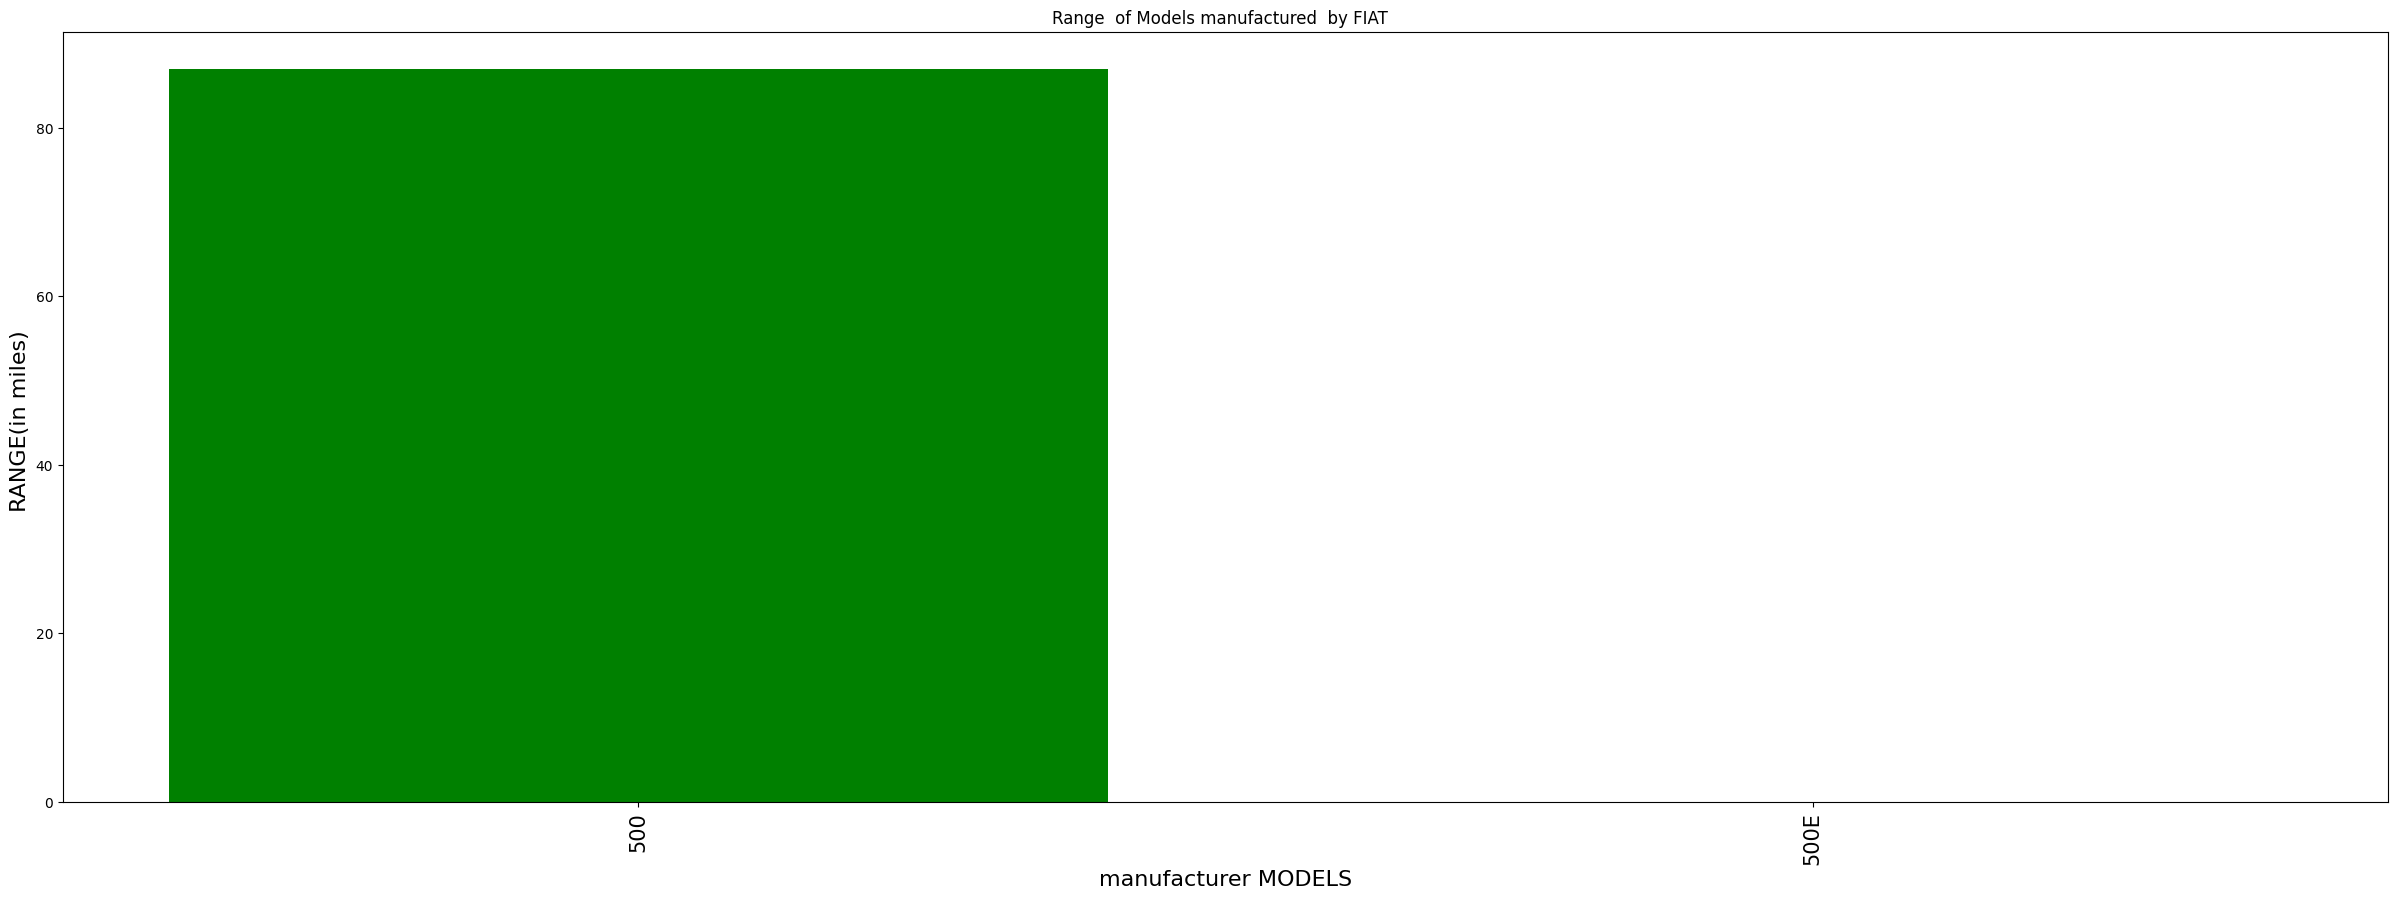

 Average electric range(miles) of LEXUS  is Electric Range    19.973479
dtype: float64
       Model  Electric Range
393       NX            37.0
743       RZ             0.0
951       NX            37.0
1642      NX            37.0
2161      NX            37.0
...      ...             ...
191920    NX            37.0
193029    NX            37.0
193223    TX            33.0
193521    NX            37.0
194206    RZ             0.0

[641 rows x 2 columns]


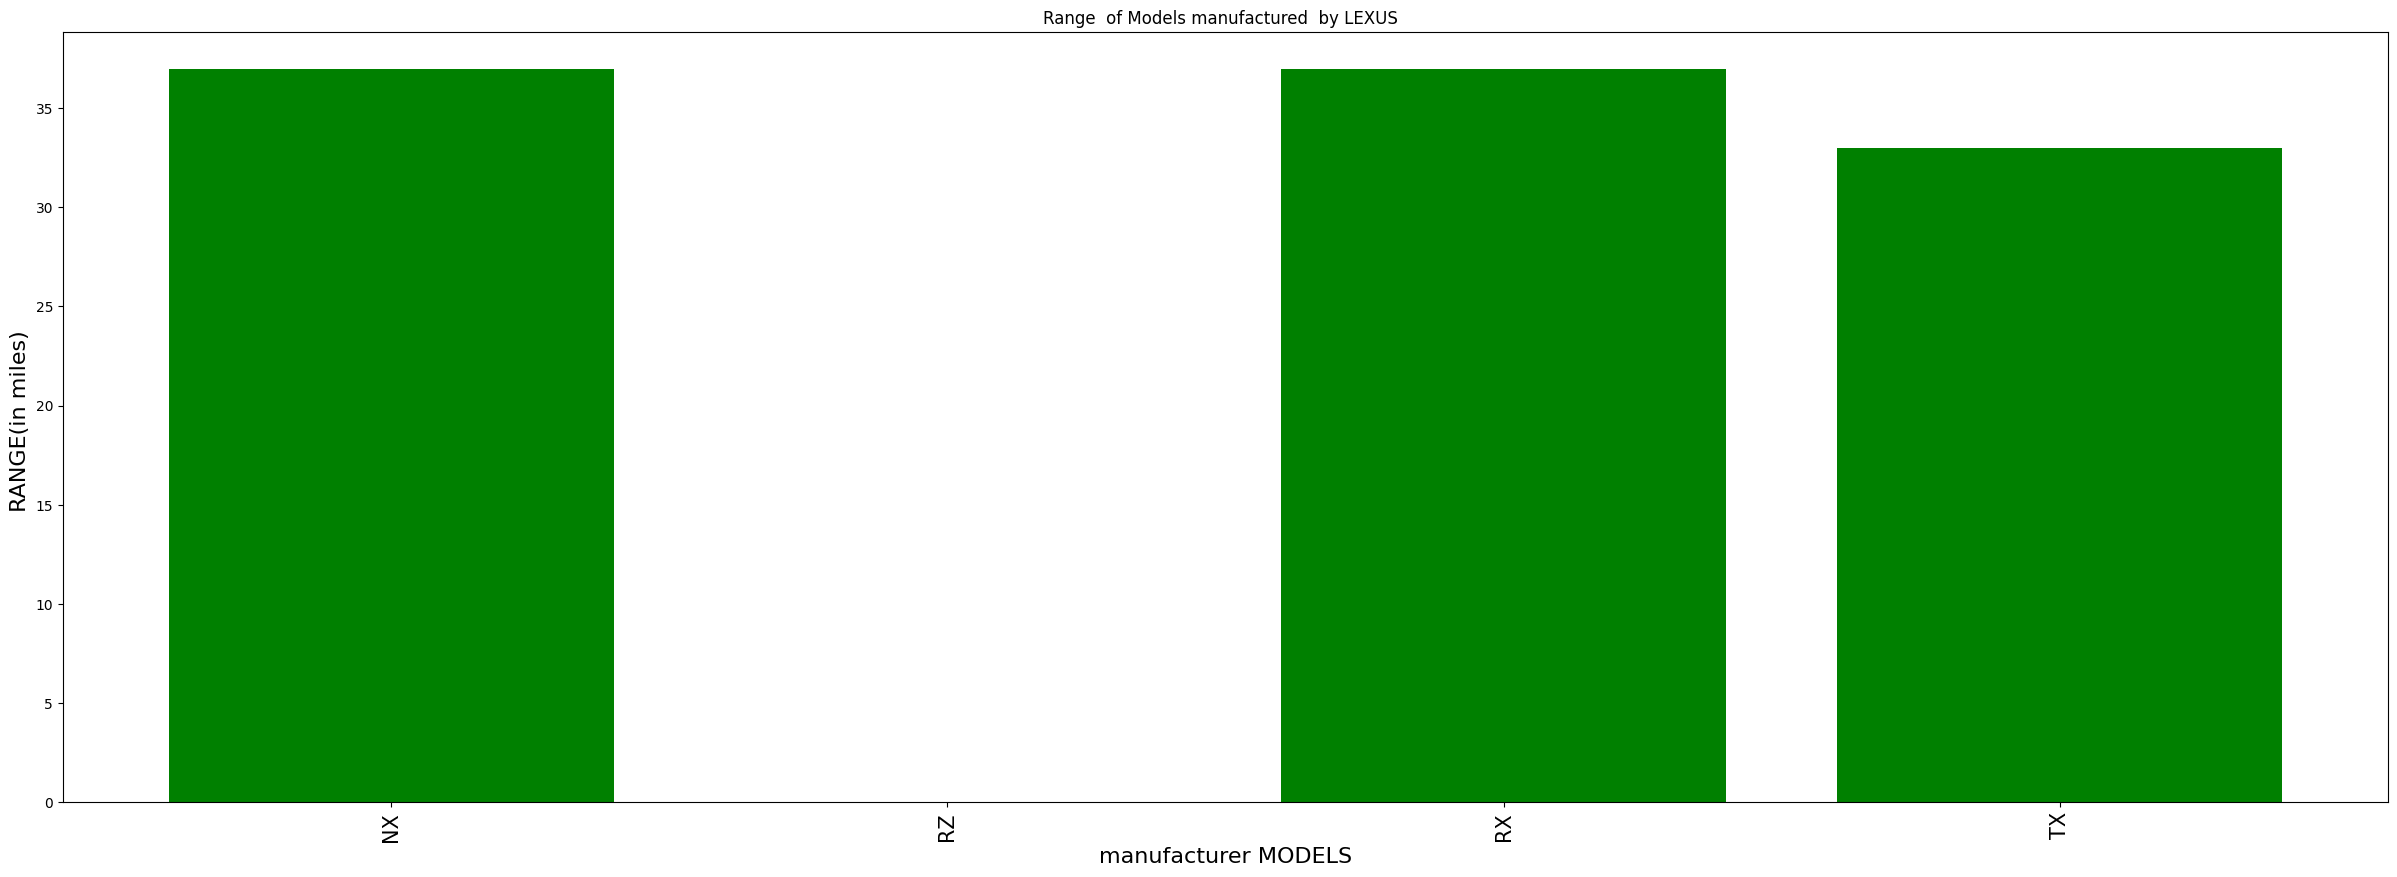

 Average electric range(miles) of DODGE  is Electric Range    32.0
dtype: float64
         Model  Electric Range
9833    HORNET            32.0
12091   HORNET            32.0
14363   HORNET            32.0
15192   HORNET            32.0
18850   HORNET            32.0
...        ...             ...
187177  HORNET            32.0
190164  HORNET            32.0
193338  HORNET            32.0
193517  HORNET            32.0
193524  HORNET            32.0

[631 rows x 2 columns]


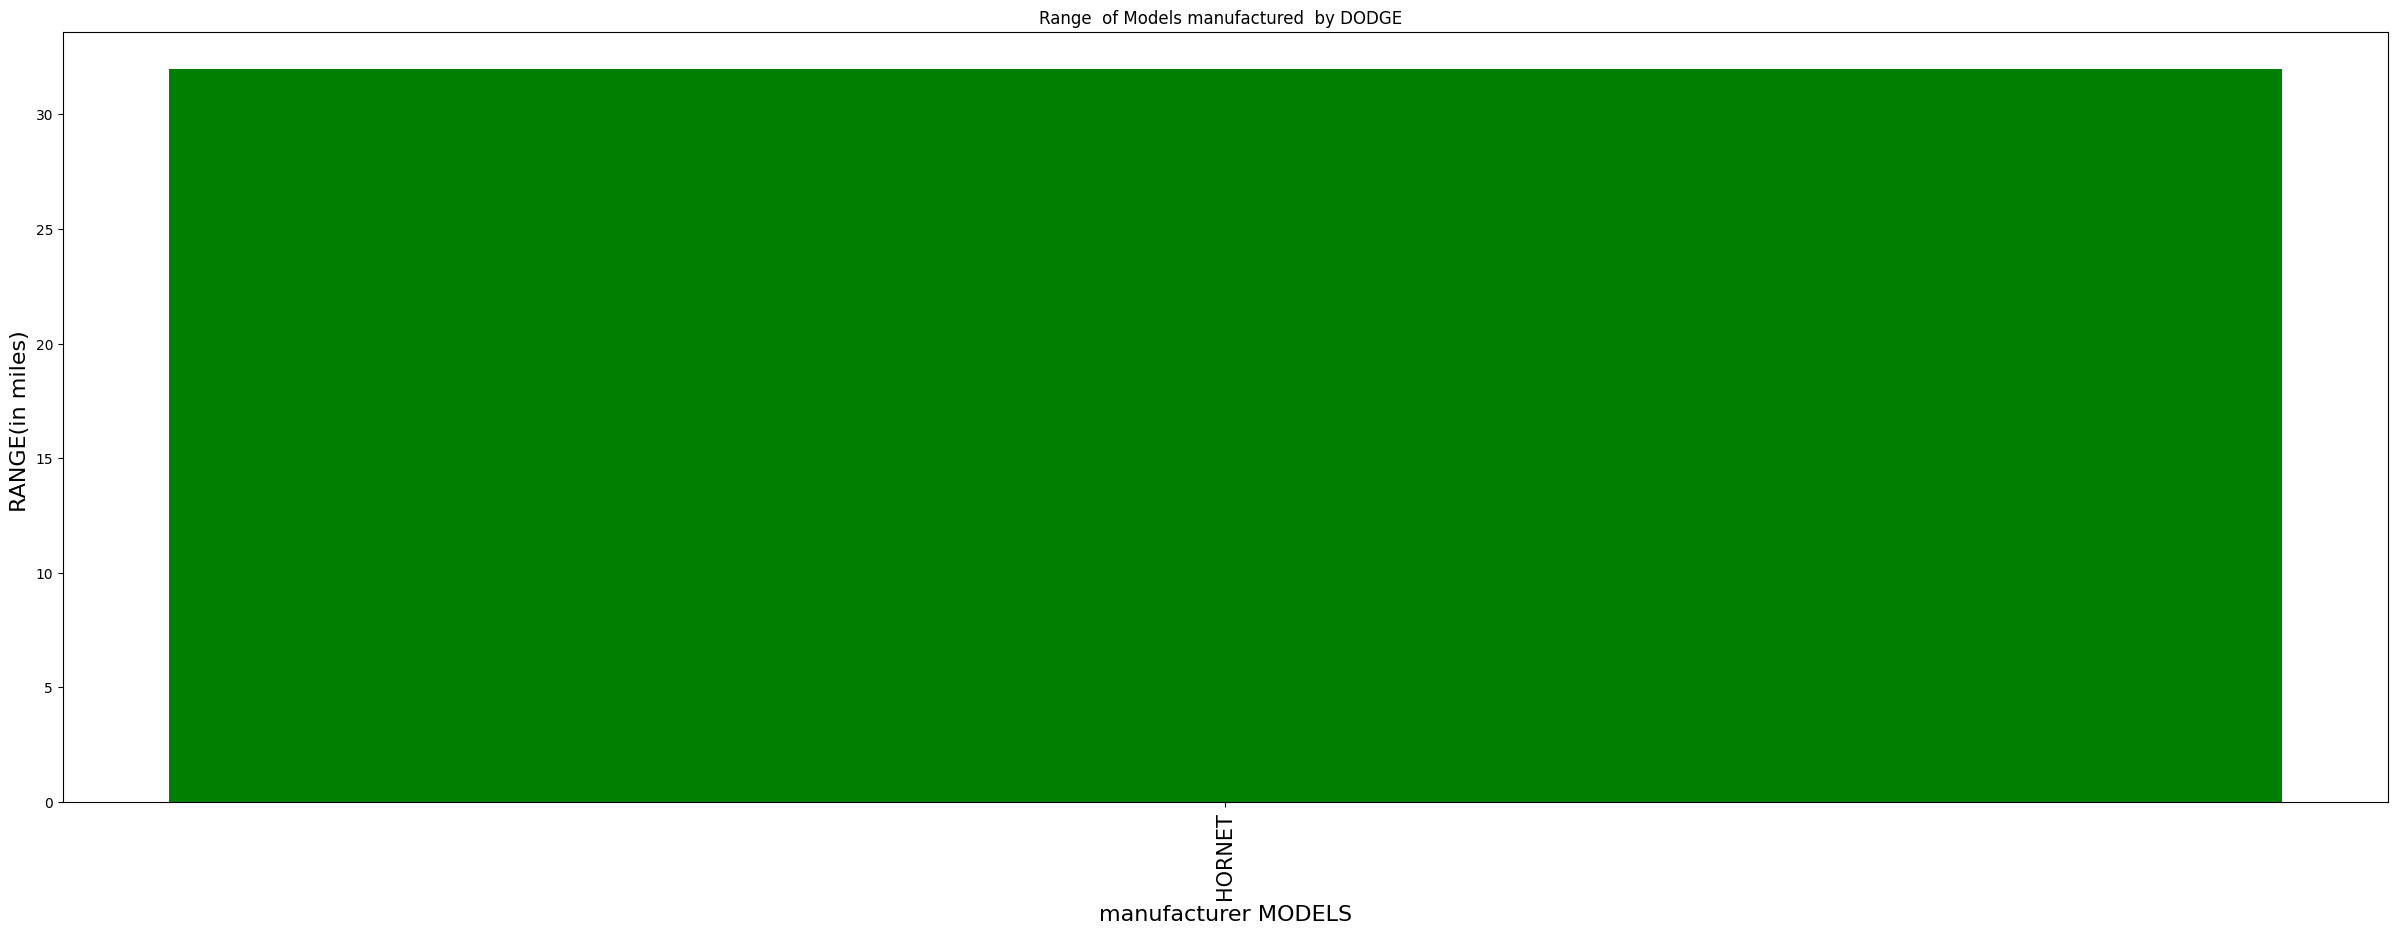

 Average electric range(miles) of CADILLAC  is Electric Range    5.104762
dtype: float64
        Model  Electric Range
522       ELR            40.0
1978    LYRIQ             0.0
2376    LYRIQ             0.0
4845    LYRIQ             0.0
5201    LYRIQ             0.0
...       ...             ...
193820  LYRIQ             0.0
193887  LYRIQ             0.0
193893  LYRIQ             0.0
194069  LYRIQ             0.0
194188  LYRIQ             0.0

[630 rows x 2 columns]


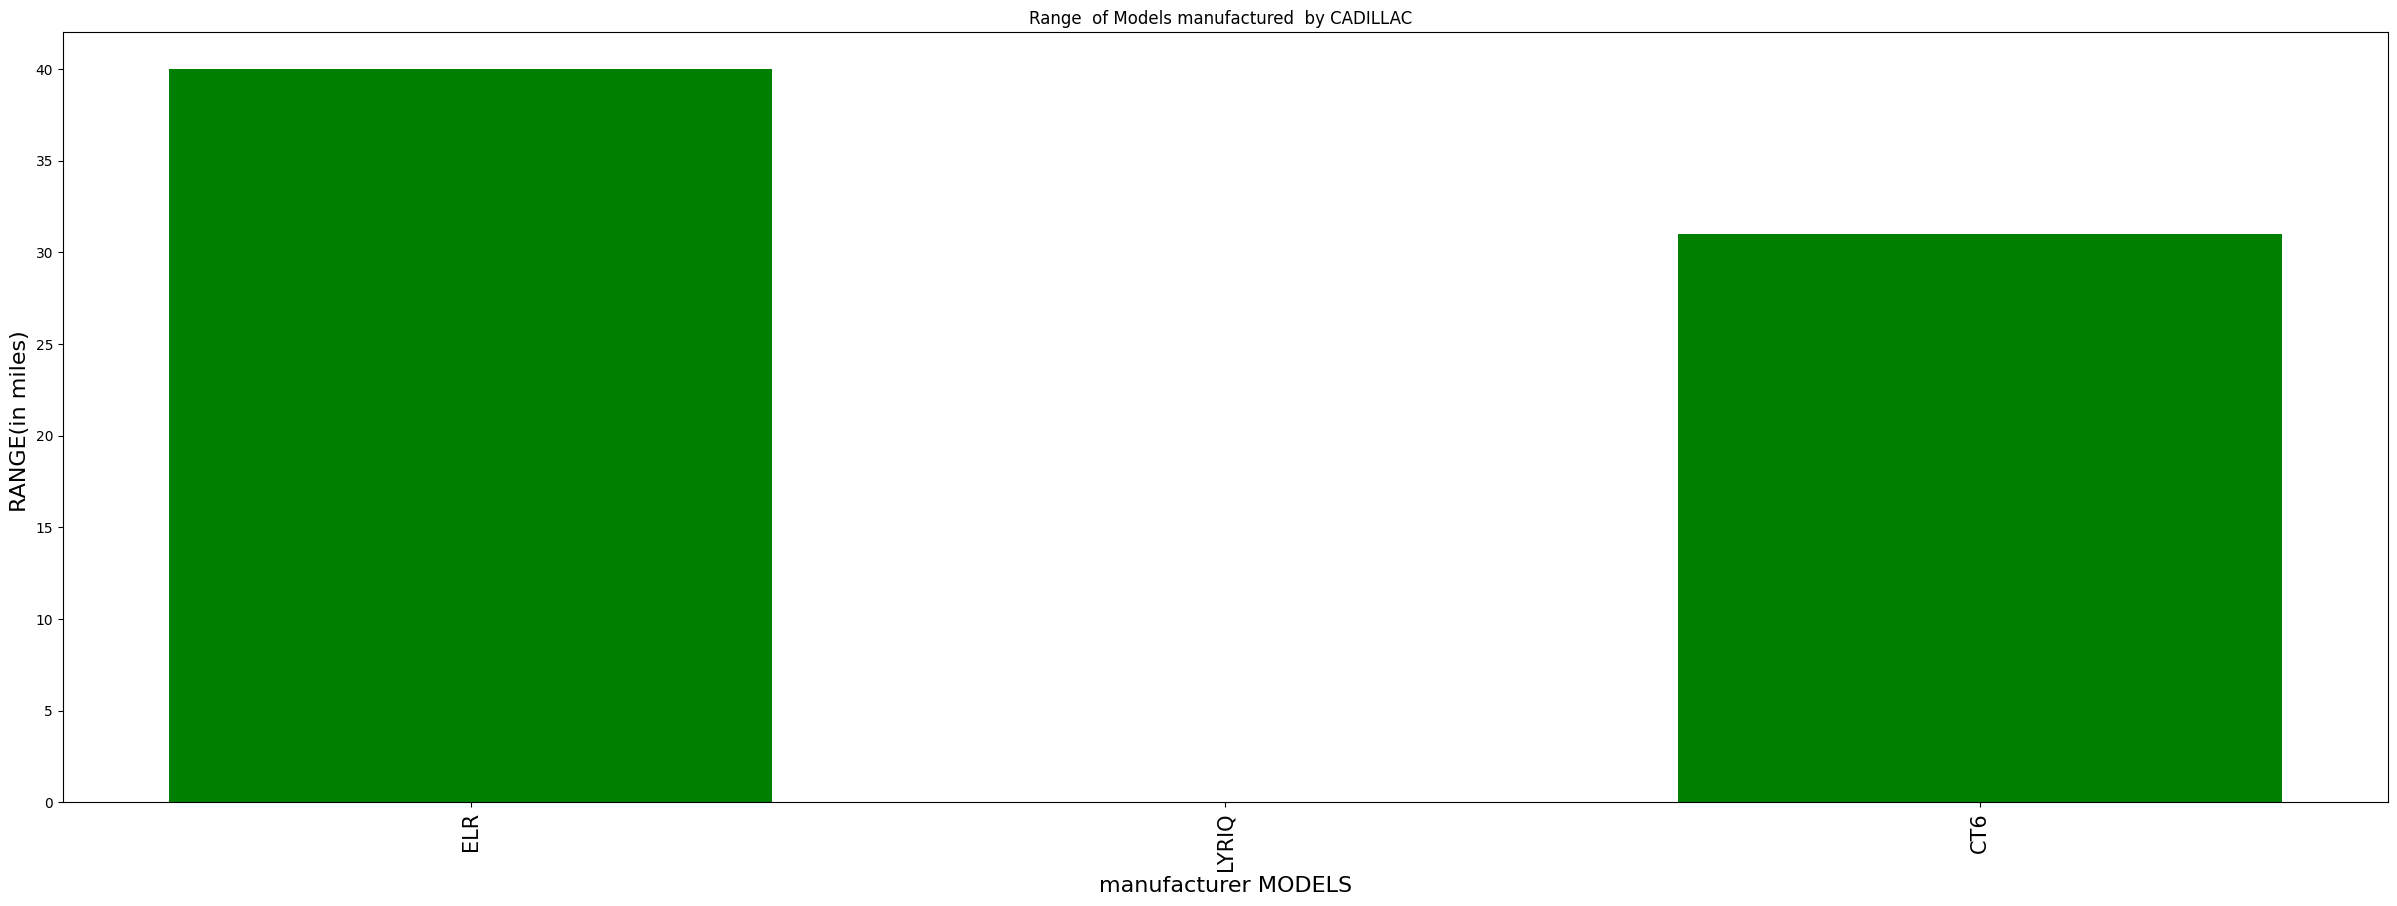

 Average electric range(miles) of MAZDA  is Electric Range    25.711111
dtype: float64
        Model  Electric Range
154     CX-90            26.0
1386    CX-90            26.0
1790    CX-90            26.0
1886    CX-90            26.0
2874    MX-30             0.0
...       ...             ...
193748  CX-90            26.0
193767  CX-70            26.0
193933  CX-90            26.0
194051  CX-90            26.0
194200  CX-90            26.0

[630 rows x 2 columns]


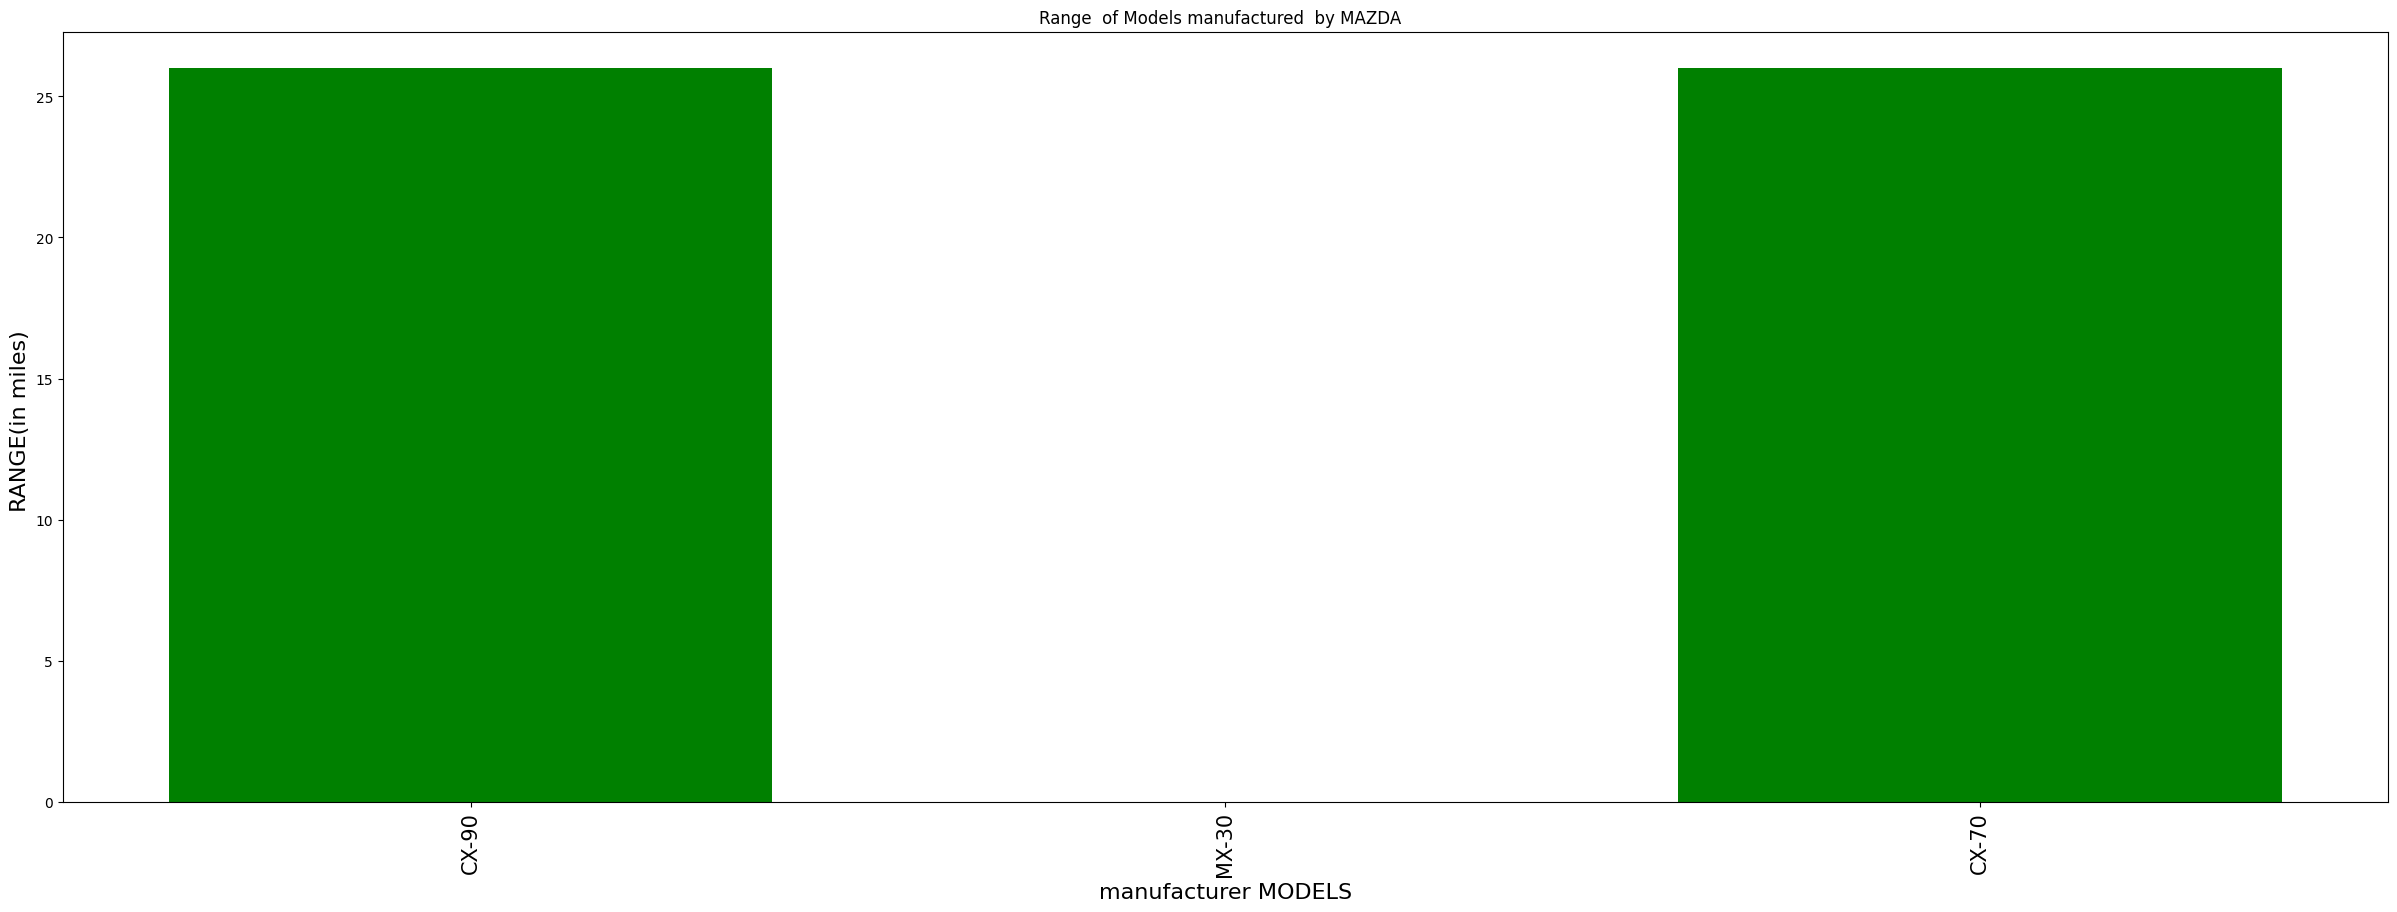

 Average electric range(miles) of LINCOLN  is Electric Range    23.649306
dtype: float64
          Model  Electric Range
344     AVIATOR            21.0
1571    CORSAIR            28.0
1622    AVIATOR            21.0
1813    AVIATOR            21.0
2647    AVIATOR            21.0
...         ...             ...
191543  AVIATOR            21.0
191744  CORSAIR            28.0
193419  AVIATOR            21.0
193811  AVIATOR            21.0
194210  CORSAIR            28.0

[288 rows x 2 columns]


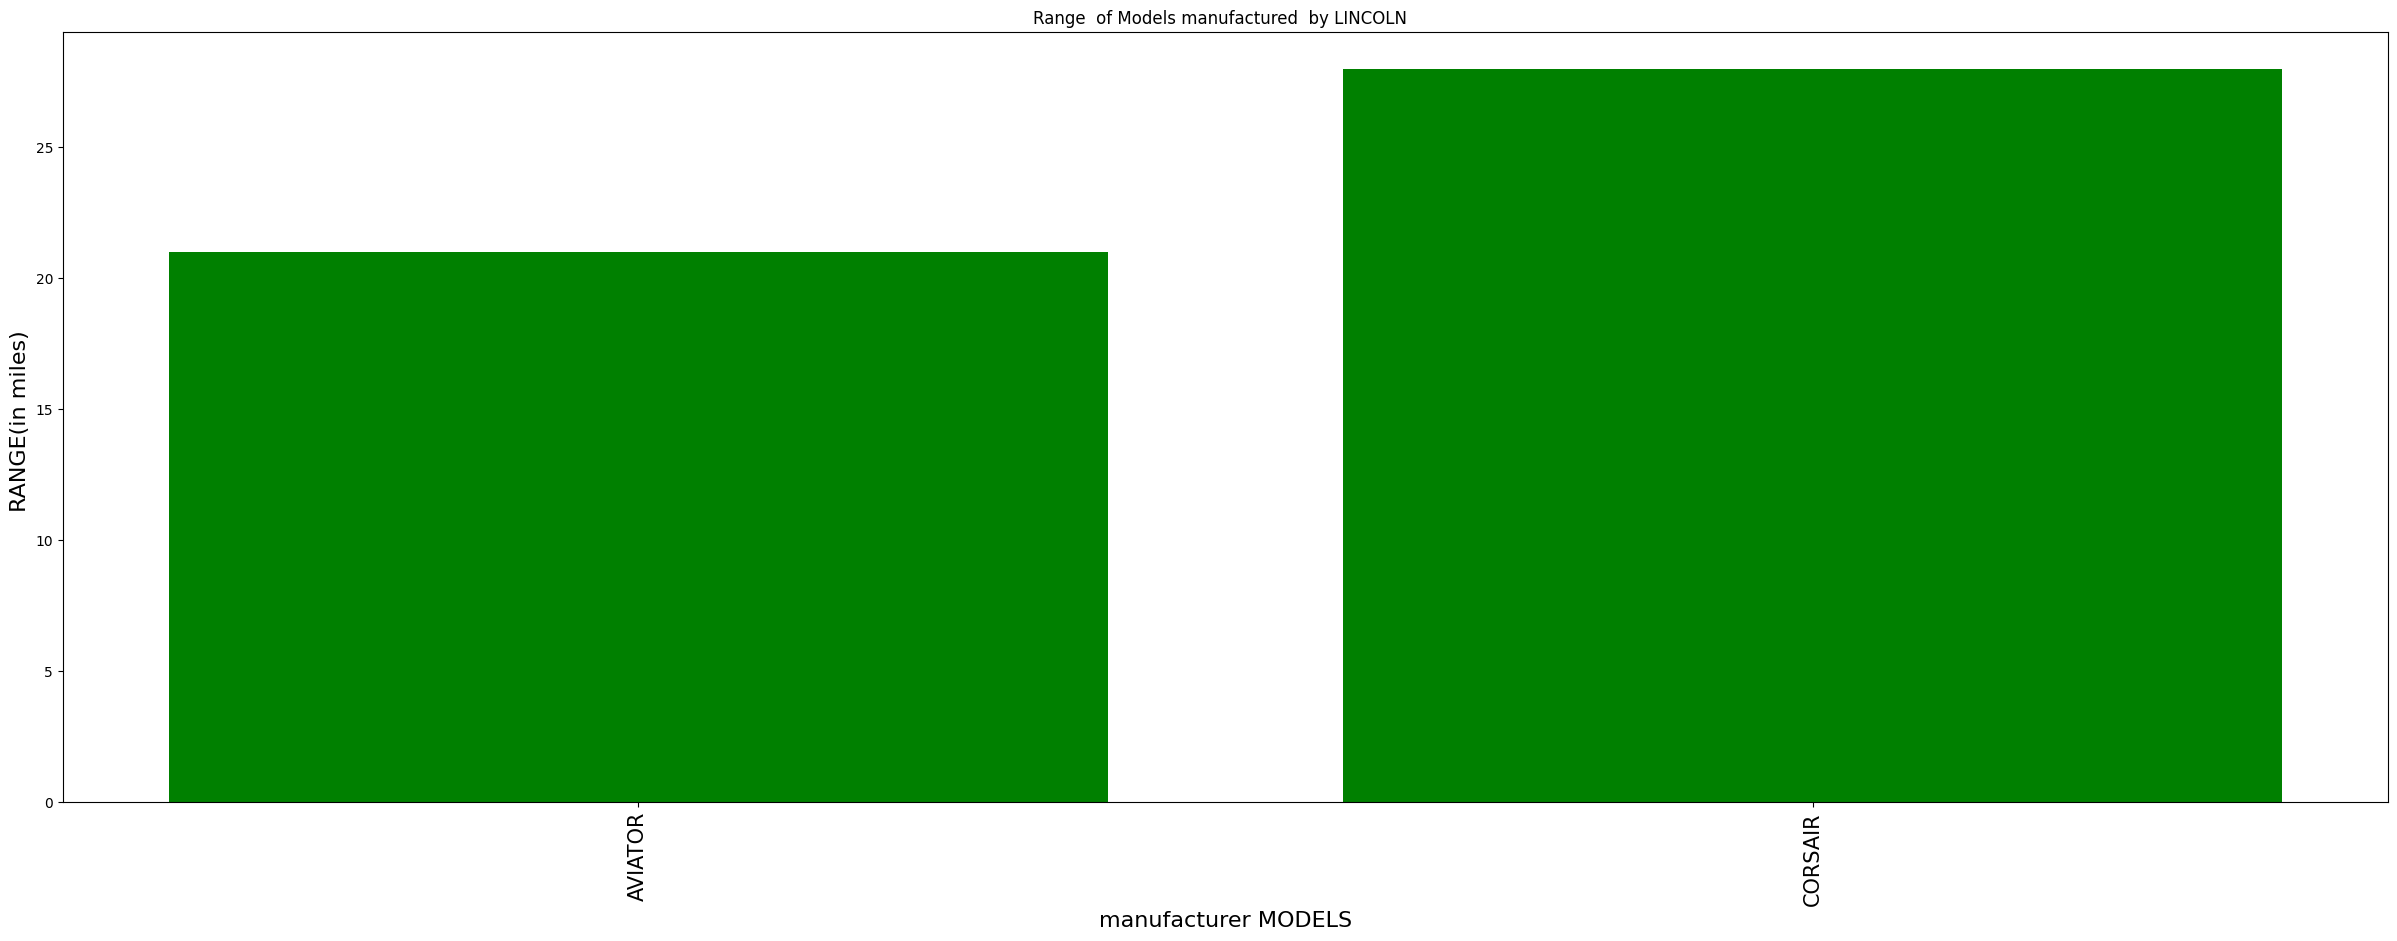

 Average electric range(miles) of LUCID  is Electric Range    0.0
dtype: float64
       Model  Electric Range
149      AIR             0.0
392      AIR             0.0
1194     AIR             0.0
1881     AIR             0.0
2154     AIR             0.0
...      ...             ...
192523   AIR             0.0
193501   AIR             0.0
193662   AIR             0.0
193739   AIR             0.0
193993   AIR             0.0

[265 rows x 2 columns]


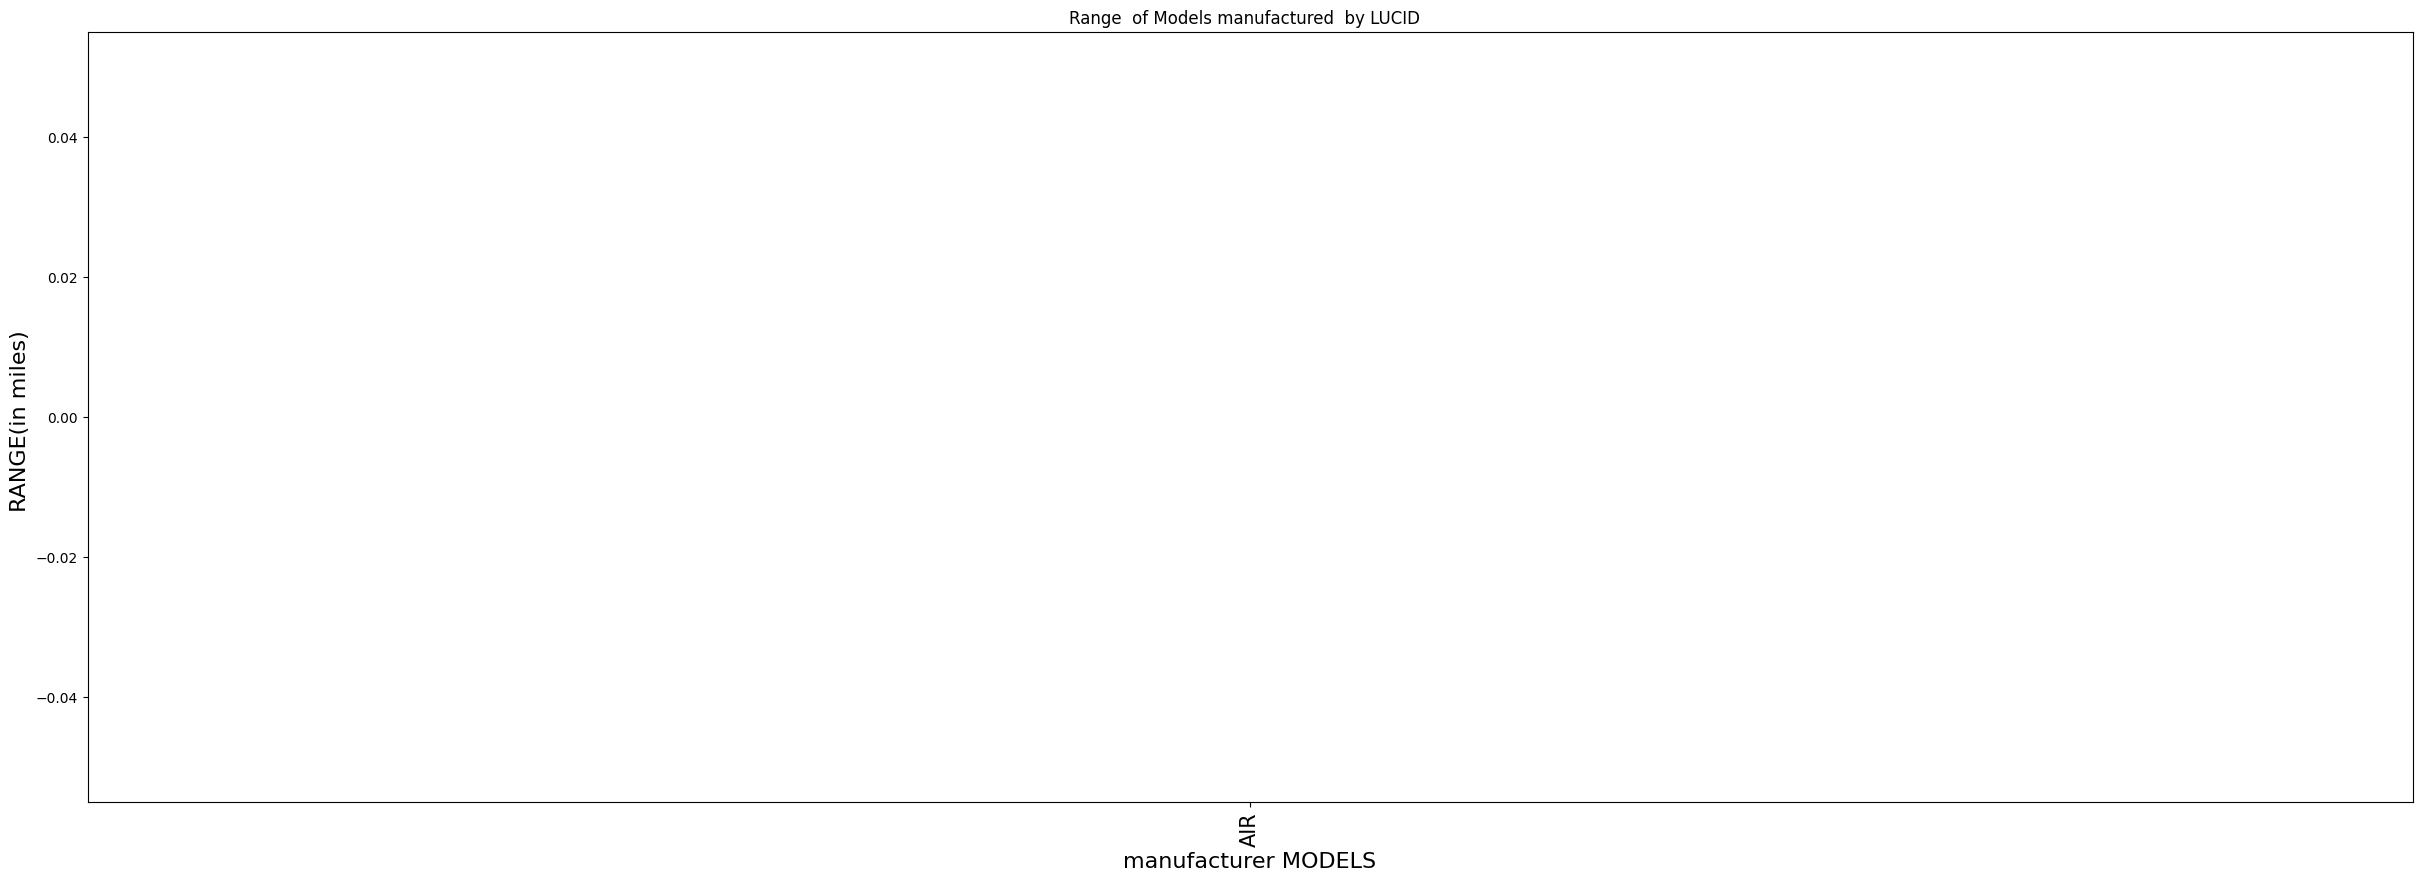

 Average electric range(miles) of SMART  is Electric Range    62.123552
dtype: float64
                        Model  Electric Range
380                 EQ FORTWO            58.0
671     FORTWO ELECTRIC DRIVE            58.0
823                 EQ FORTWO            58.0
1096    FORTWO ELECTRIC DRIVE            58.0
1288                EQ FORTWO            58.0
...                       ...             ...
187815  FORTWO ELECTRIC DRIVE            68.0
189817              EQ FORTWO            58.0
190250  FORTWO ELECTRIC DRIVE            58.0
193296              EQ FORTWO            58.0
194118  FORTWO ELECTRIC DRIVE            68.0

[259 rows x 2 columns]


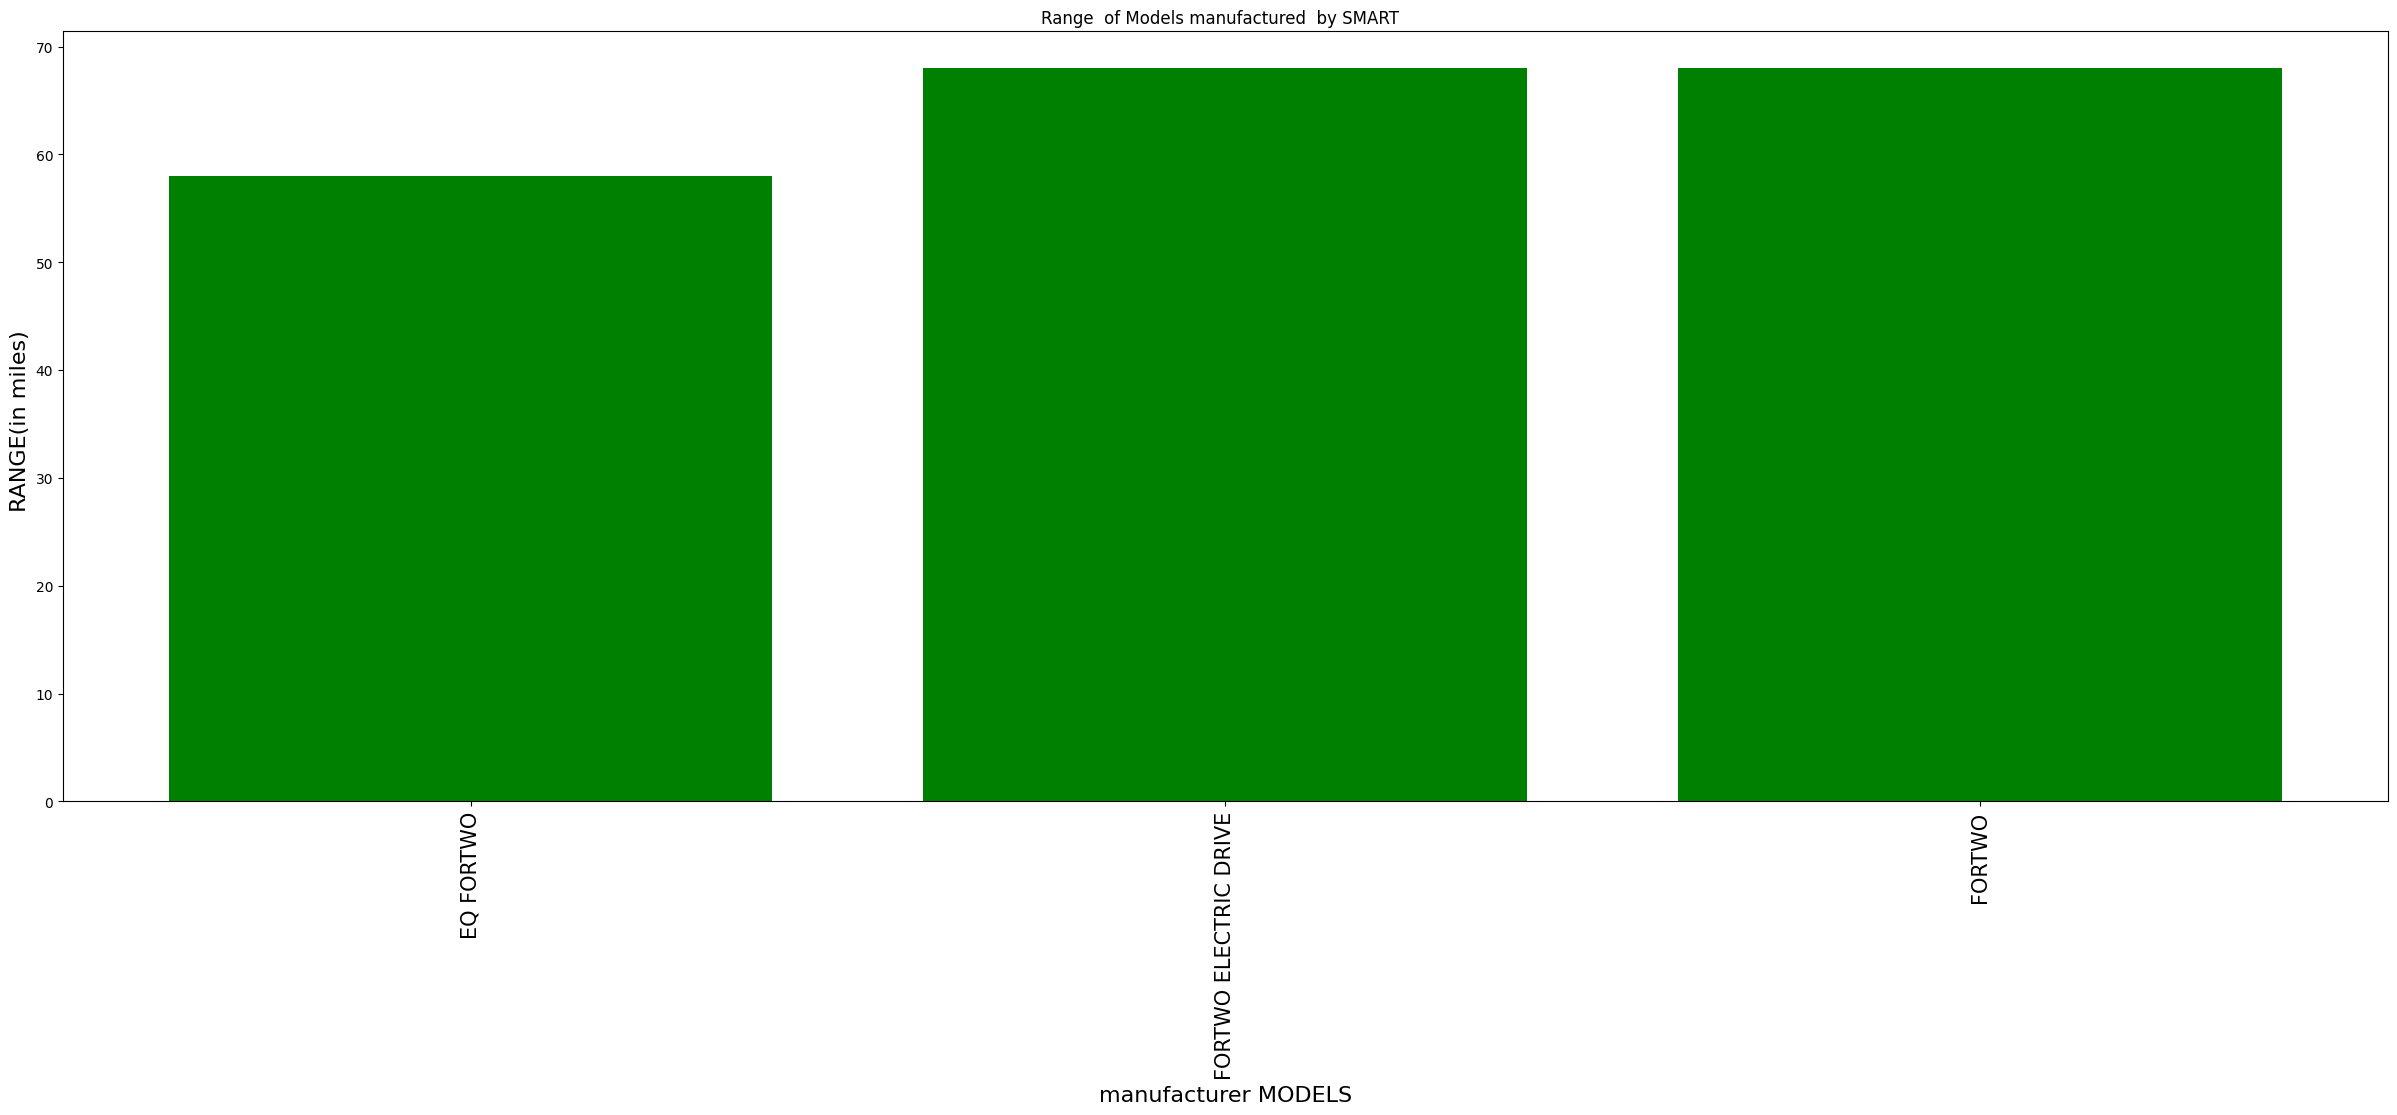

 Average electric range(miles) of GENESIS  is Electric Range    0.0
dtype: float64
       Model  Electric Range
1550    GV70             0.0
2343    GV60             0.0
3364    GV60             0.0
3627     G80             0.0
3938    GV70             0.0
...      ...             ...
188259  GV60             0.0
188486  GV60             0.0
189369  GV60             0.0
190693  GV60             0.0
191261  GV60             0.0

[239 rows x 2 columns]


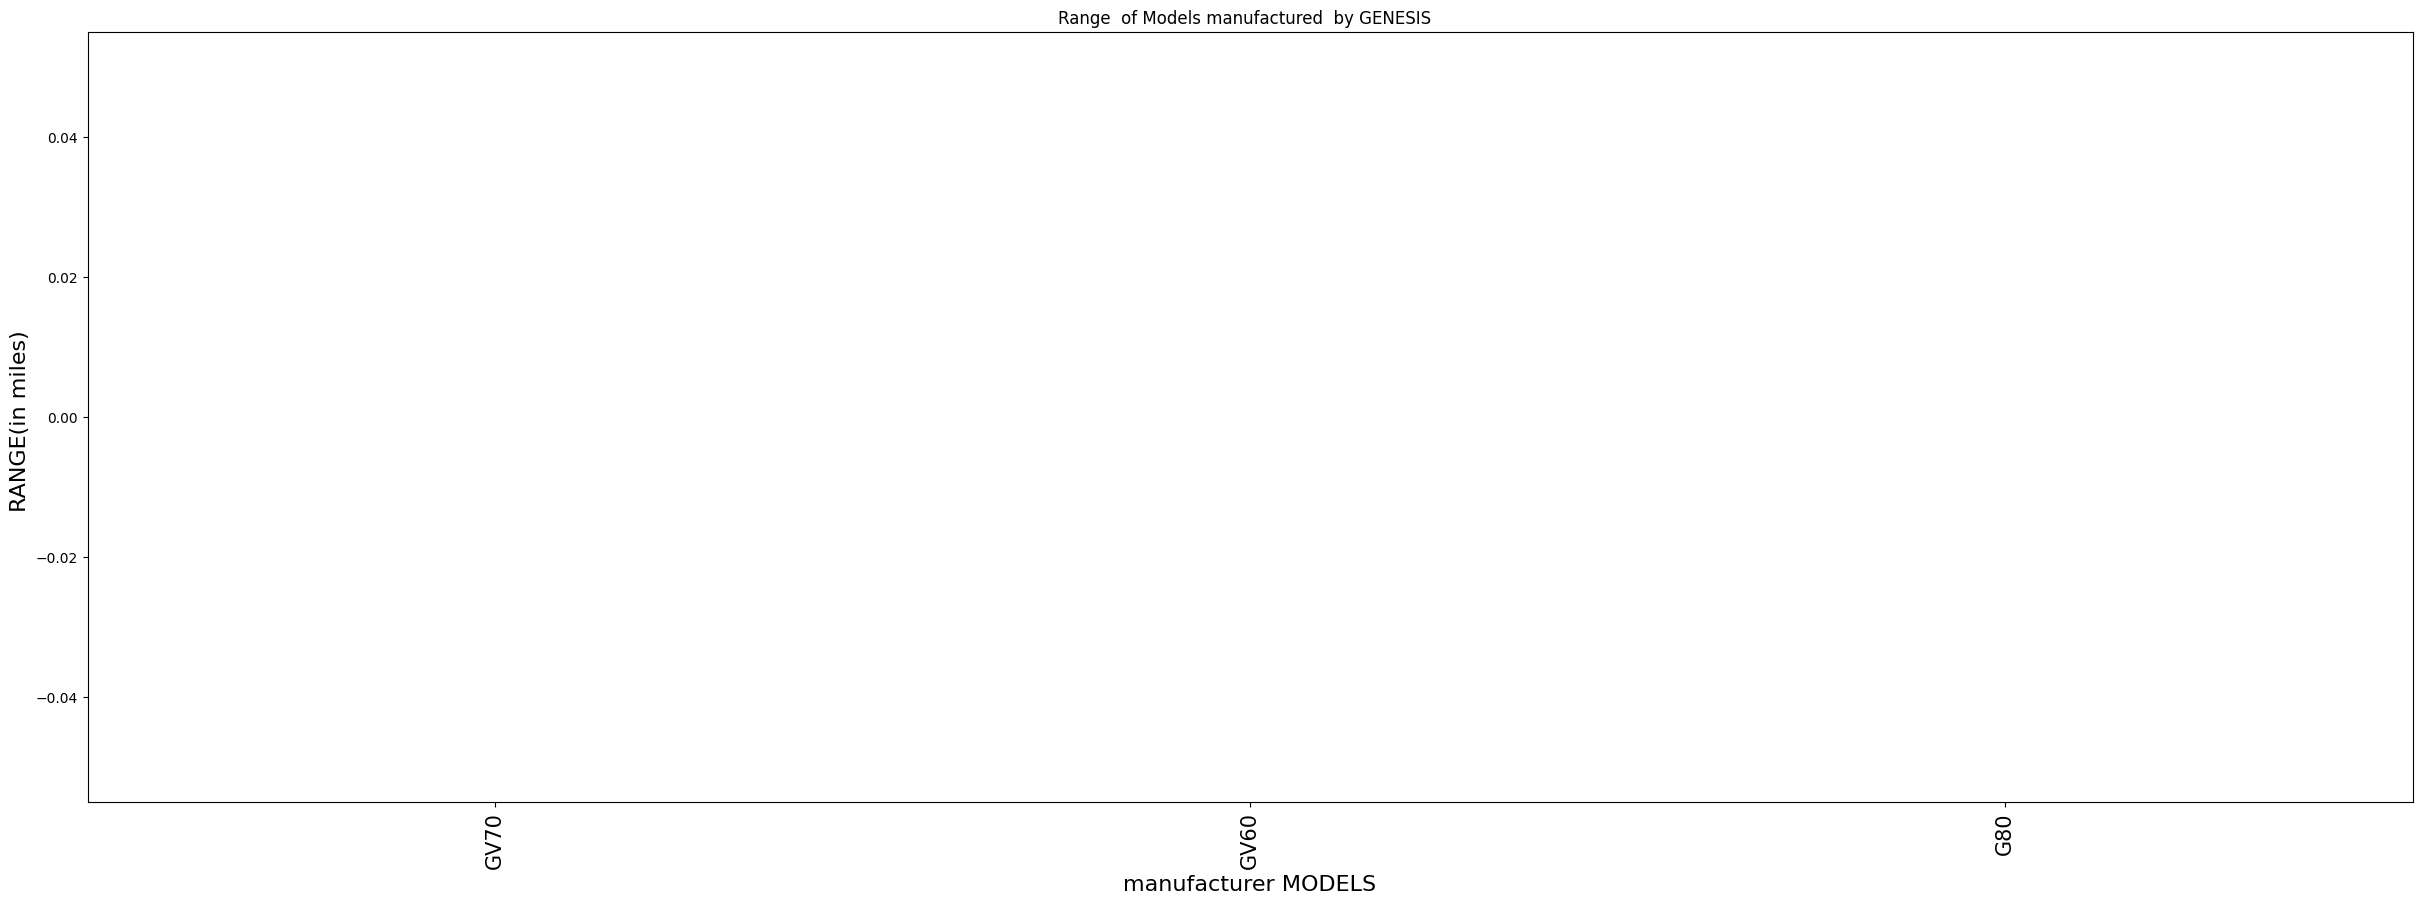

 Average electric range(miles) of JAGUAR  is Electric Range    205.0
dtype: float64
         Model  Electric Range
121     I-PACE           234.0
581     I-PACE           234.0
857     I-PACE             0.0
1265    I-PACE           234.0
1303    I-PACE           234.0
...        ...             ...
187288  I-PACE           234.0
188773  I-PACE           234.0
188912  I-PACE           234.0
191116  I-PACE             0.0
192104  I-PACE             0.0

[234 rows x 2 columns]


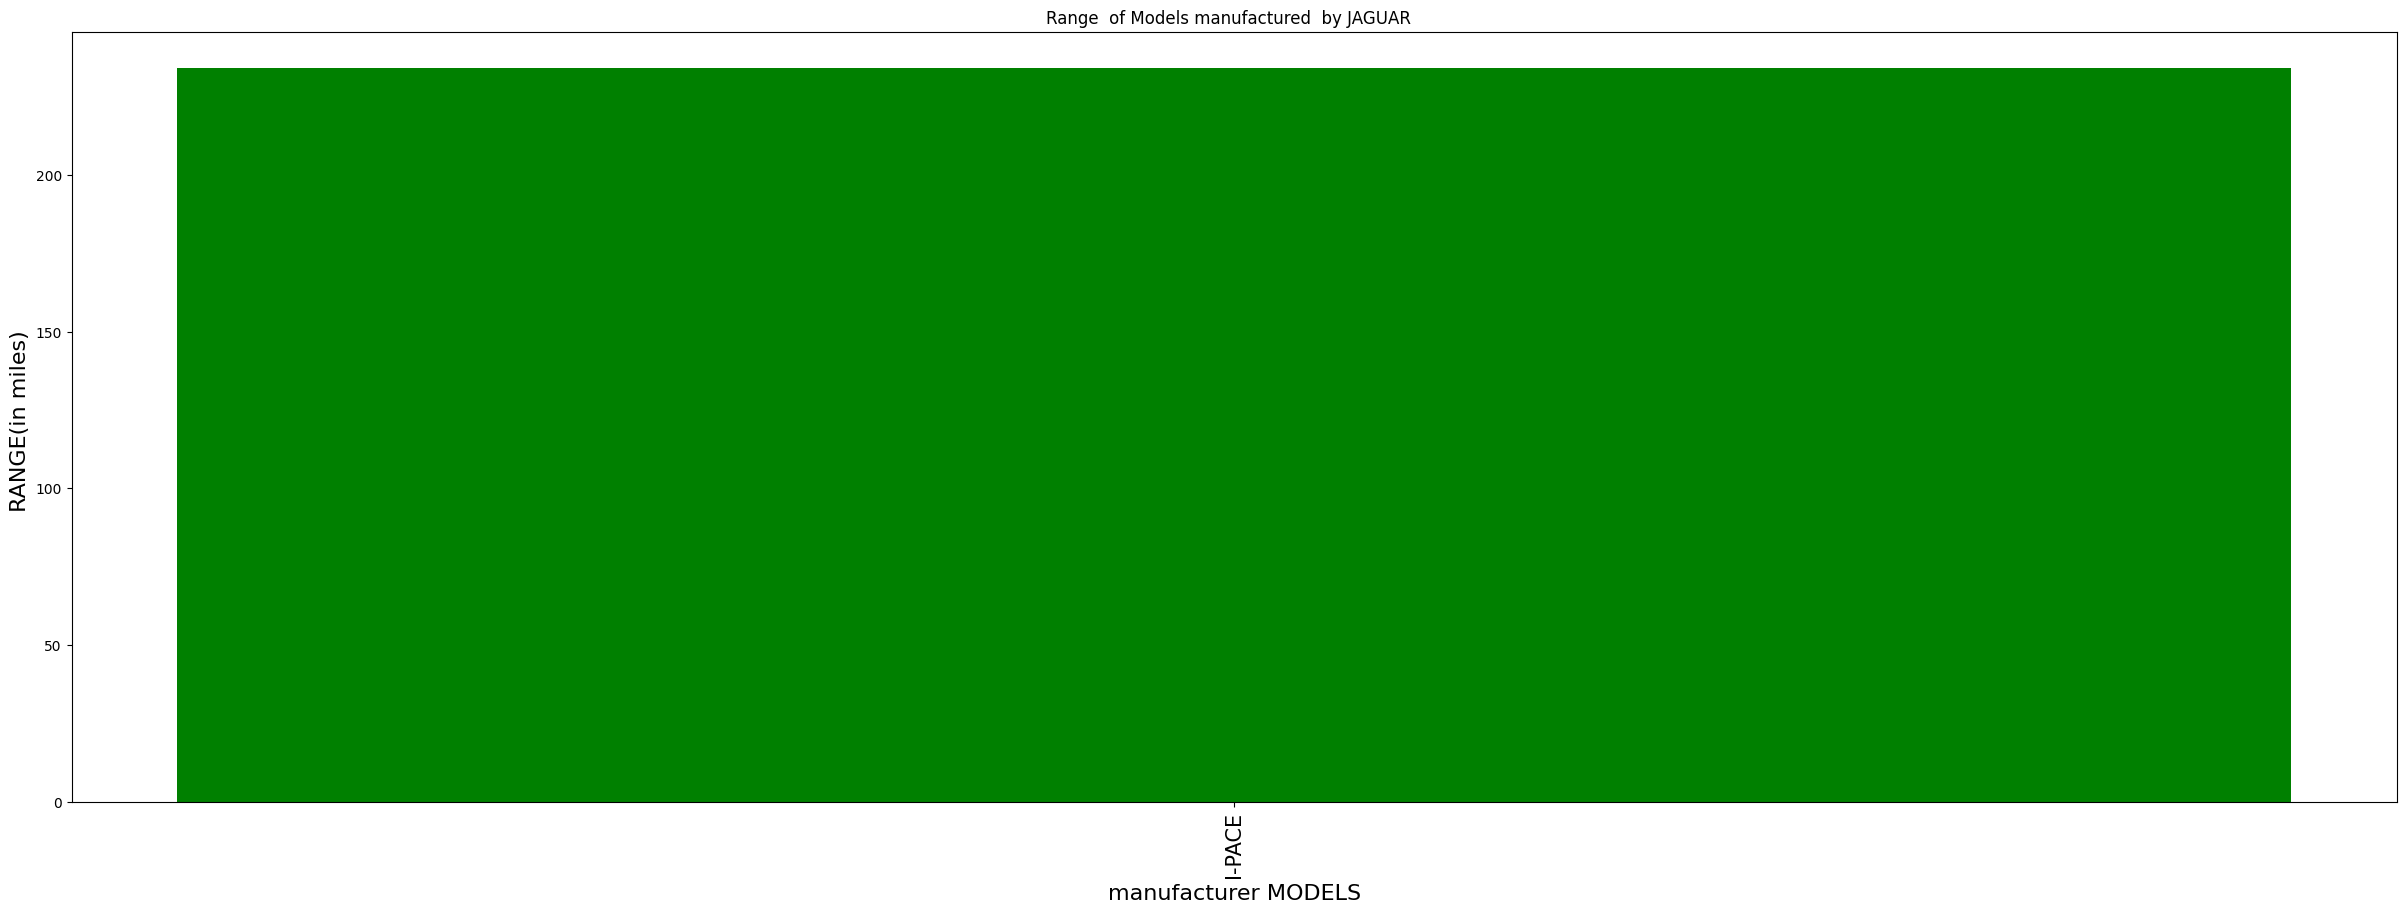

 Average electric range(miles) of FISKER  is Electric Range    2.483871
dtype: float64
        Model  Electric Range
188     OCEAN             0.0
3495    OCEAN             0.0
5093    OCEAN             0.0
7030    OCEAN             0.0
11566   KARMA            33.0
...       ...             ...
188485  OCEAN             0.0
188596  OCEAN             0.0
189361  OCEAN             0.0
189906  OCEAN             0.0
191175  OCEAN             0.0

[186 rows x 2 columns]


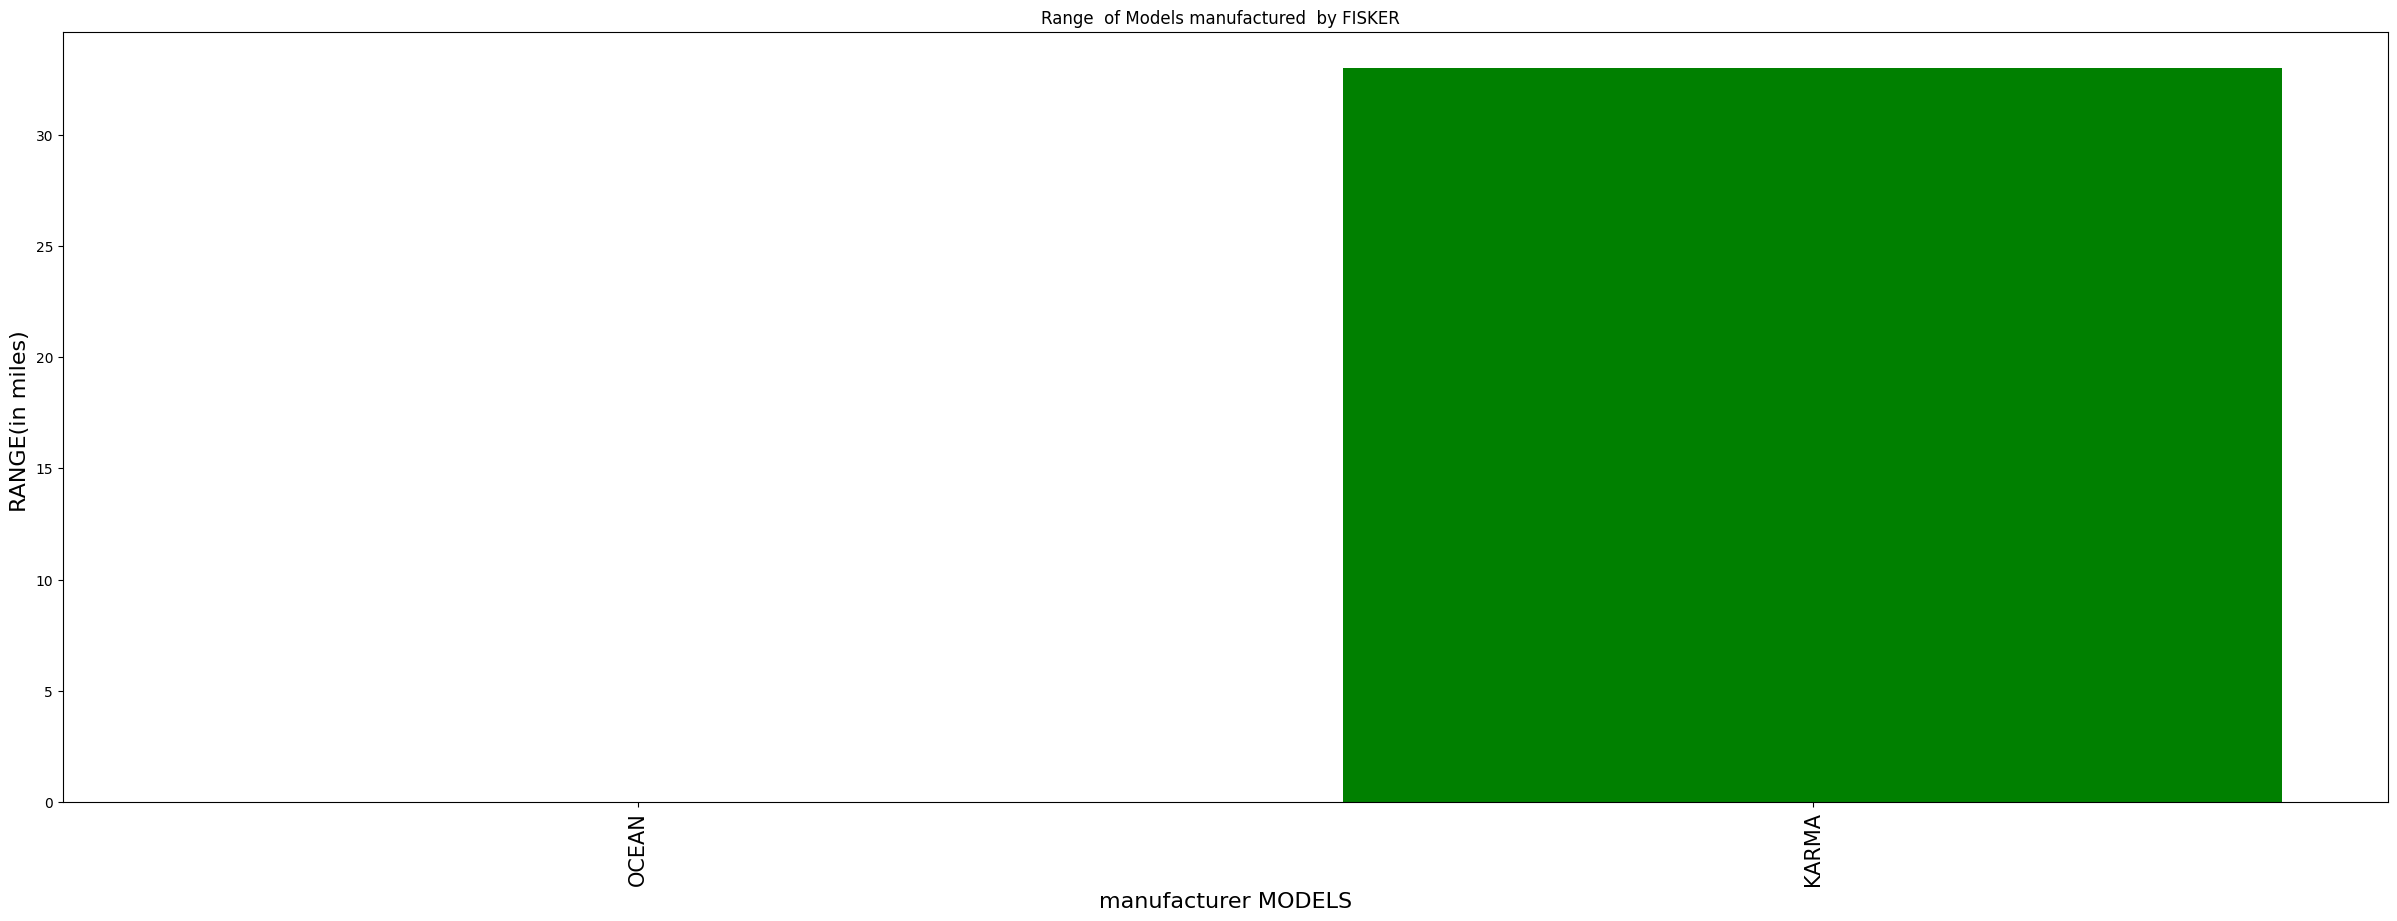

 Average electric range(miles) of LAND ROVER  is Electric Range    28.142857
dtype: float64
                    Model  Electric Range
1819    RANGE ROVER SPORT            59.0
12679   RANGE ROVER SPORT            19.0
13397   RANGE ROVER SPORT            19.0
19787   RANGE ROVER SPORT            19.0
20784   RANGE ROVER SPORT            19.0
...                   ...             ...
175093  RANGE ROVER SPORT            59.0
178873        RANGE ROVER            19.0
188277        RANGE ROVER            59.0
191260        RANGE ROVER            19.0
192451  RANGE ROVER SPORT            19.0

[63 rows x 2 columns]


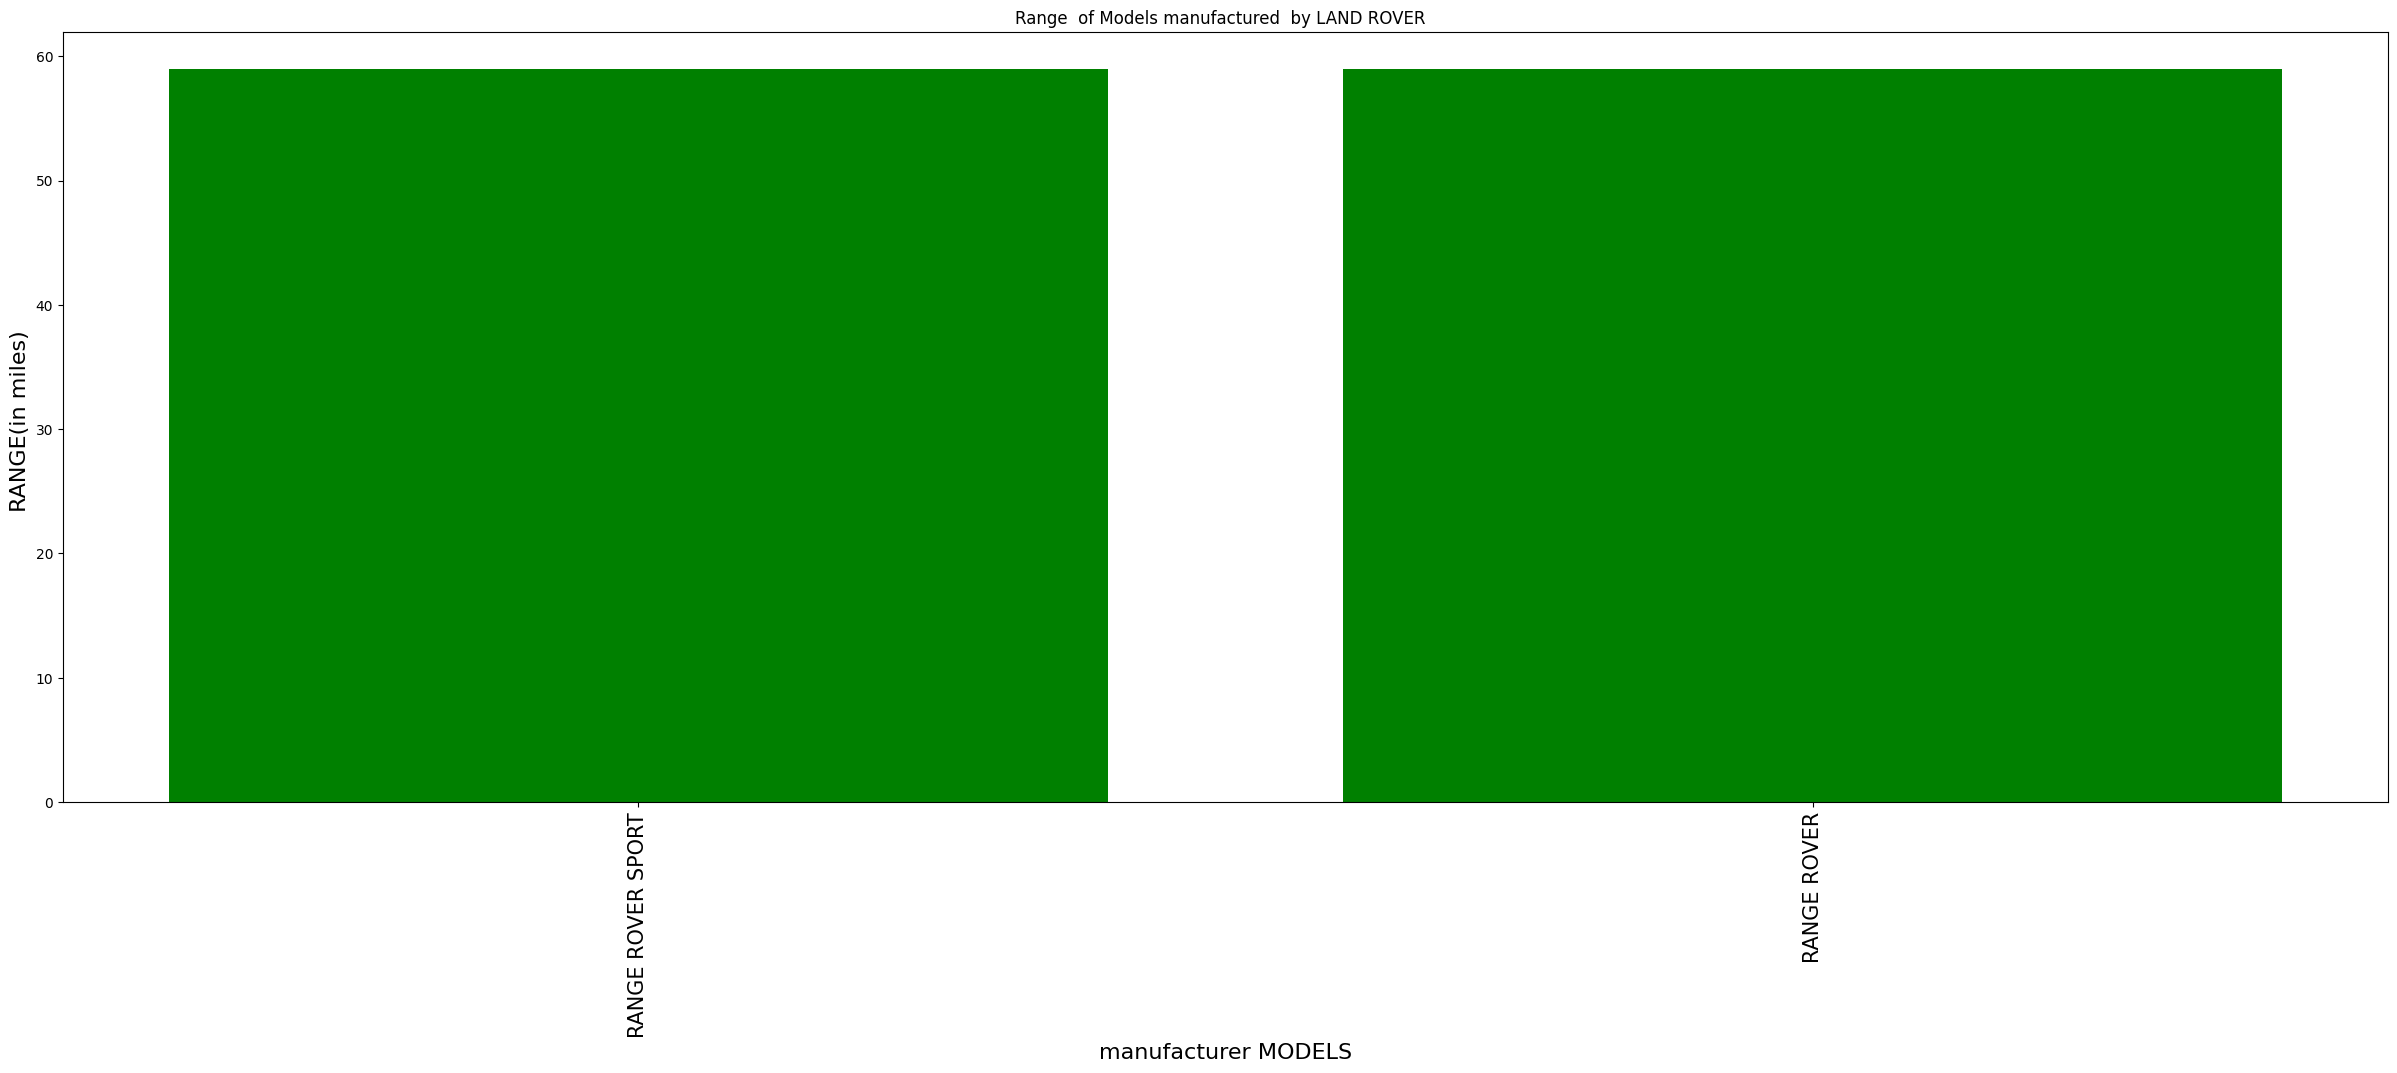

 Average electric range(miles) of ALFA ROMEO  is Electric Range    33.0
dtype: float64
         Model  Electric Range
2049    TONALE            33.0
3052    TONALE            33.0
3547    TONALE            33.0
3813    TONALE            33.0
6885    TONALE            33.0
7197    TONALE            33.0
7392    TONALE            33.0
8019    TONALE            33.0
12790   TONALE            33.0
14000   TONALE            33.0
18732   TONALE            33.0
28569   TONALE            33.0
30074   TONALE            33.0
31759   TONALE            33.0
37998   TONALE            33.0
42275   TONALE            33.0
45892   TONALE            33.0
49897   TONALE            33.0
54463   TONALE            33.0
55803   TONALE            33.0
61597   TONALE            33.0
62470   TONALE            33.0
66409   TONALE            33.0
69763   TONALE            33.0
70331   TONALE            33.0
70413   TONALE            33.0
75846   TONALE            33.0
77099   TONALE            33.0
80690   TONALE

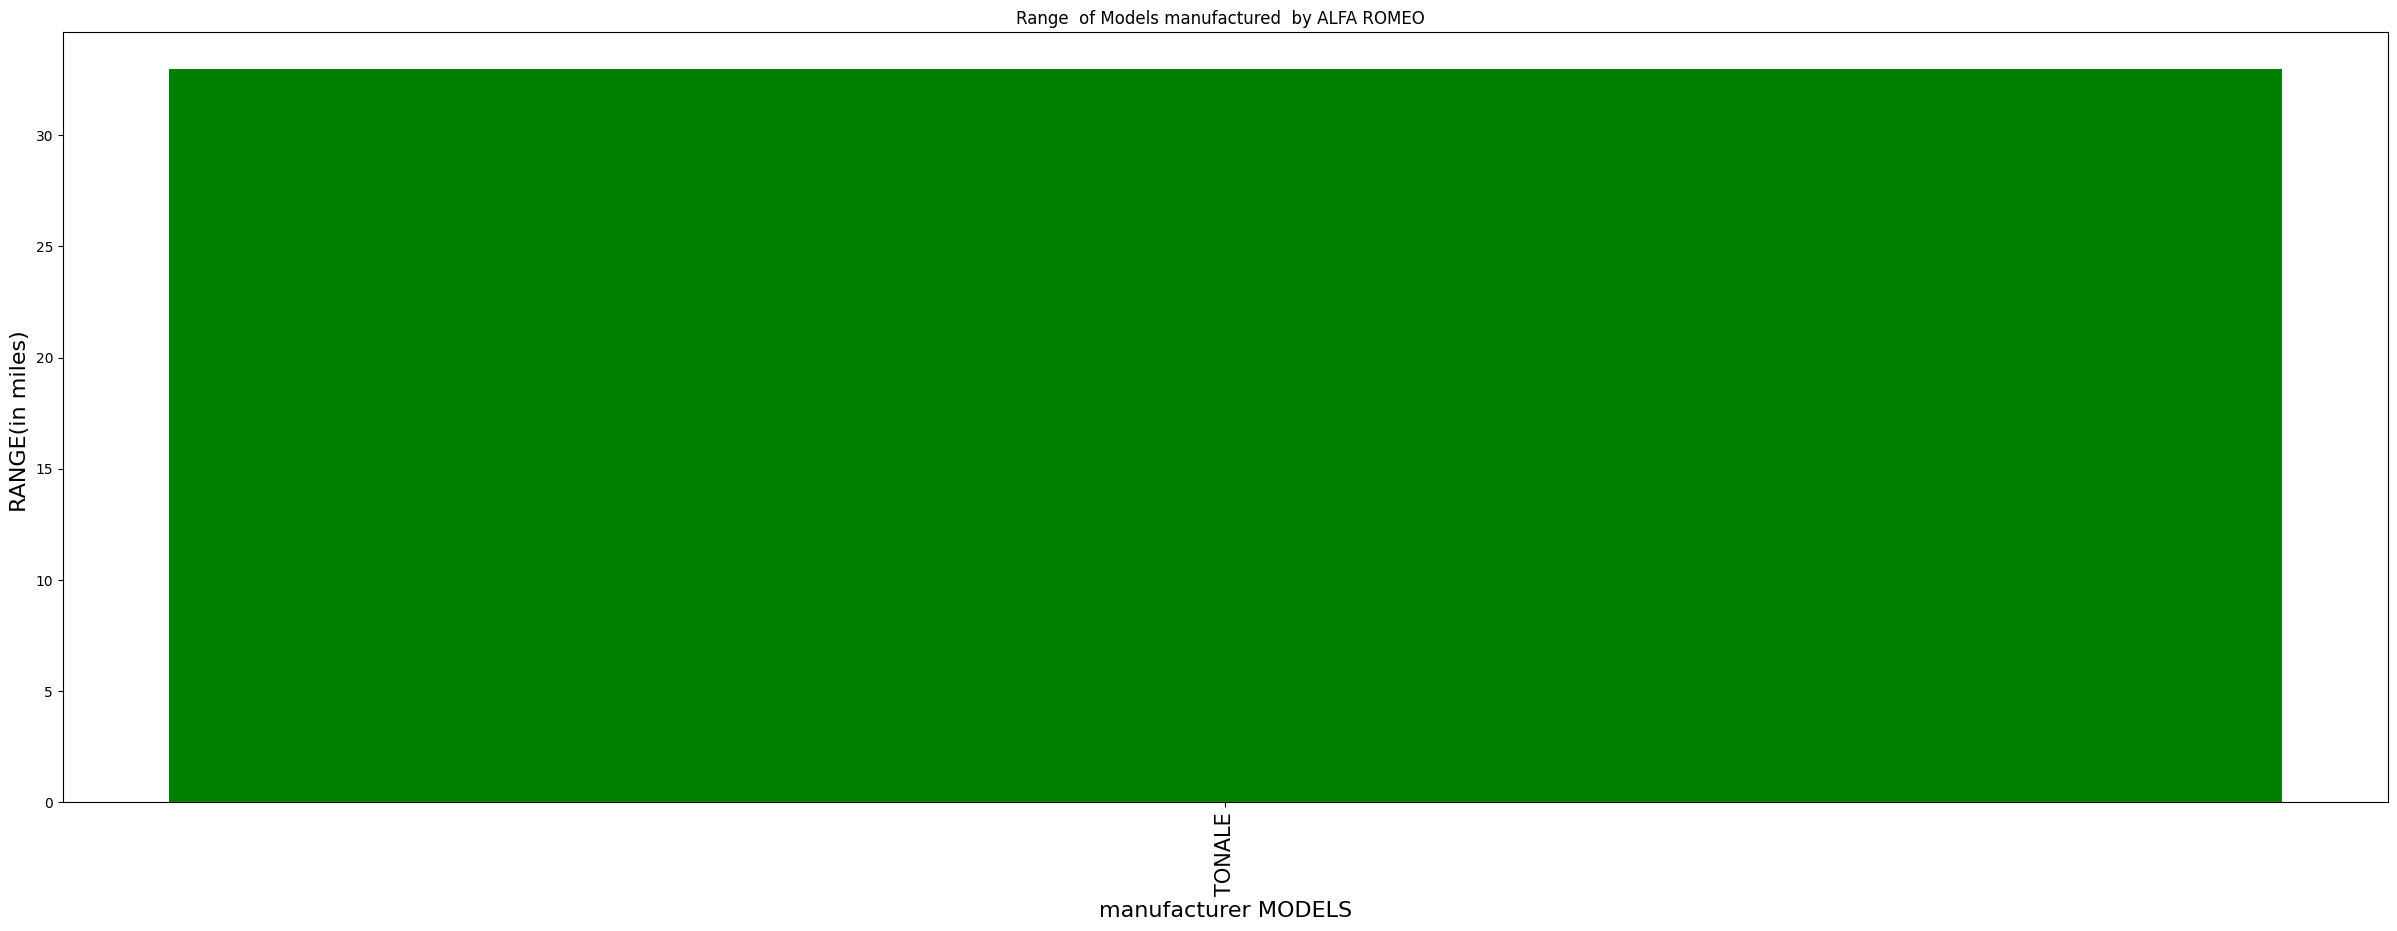

 Average electric range(miles) of GMC  is Electric Range    0.0
dtype: float64
                   Model  Electric Range
21061   HUMMER EV PICKUP             0.0
37310   HUMMER EV PICKUP             0.0
44871   HUMMER EV PICKUP             0.0
51679   HUMMER EV PICKUP             0.0
61706   HUMMER EV PICKUP             0.0
65764   HUMMER EV PICKUP             0.0
67894   HUMMER EV PICKUP             0.0
109644  HUMMER EV PICKUP             0.0
112363  HUMMER EV PICKUP             0.0
126298  HUMMER EV PICKUP             0.0
129268  HUMMER EV PICKUP             0.0
140879  HUMMER EV PICKUP             0.0
165688  HUMMER EV PICKUP             0.0
171035  HUMMER EV PICKUP             0.0
173121  HUMMER EV PICKUP             0.0
178812  HUMMER EV PICKUP             0.0
190326  HUMMER EV PICKUP             0.0


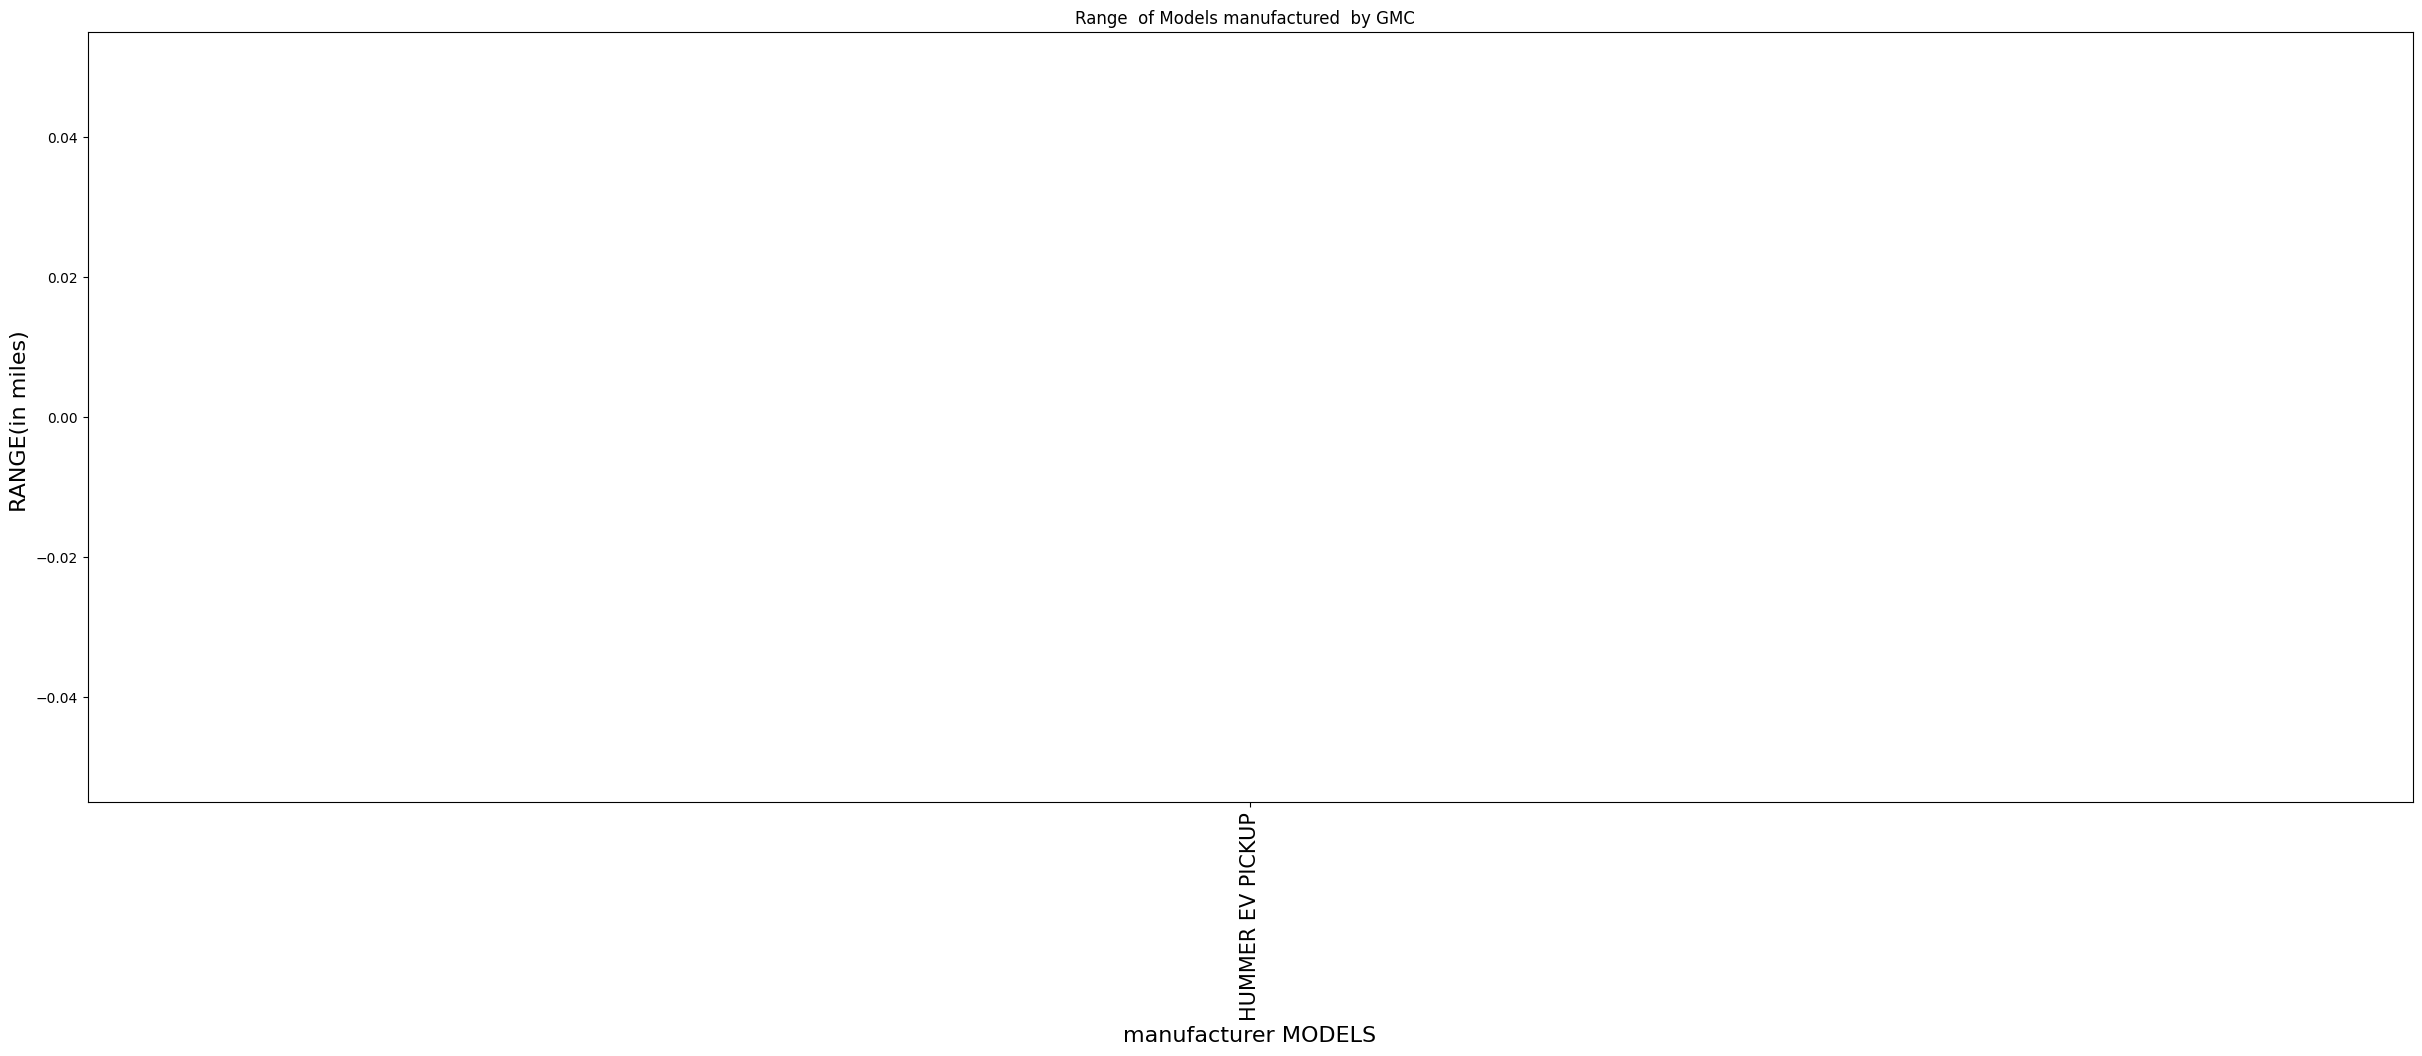

 Average electric range(miles) of ACURA  is Electric Range    0.0
dtype: float64
       Model  Electric Range
44231    ZDX             0.0
95450    ZDX             0.0
114200   ZDX             0.0
127079   ZDX             0.0
143077   ZDX             0.0
158057   ZDX             0.0
164894   ZDX             0.0
193911   ZDX             0.0


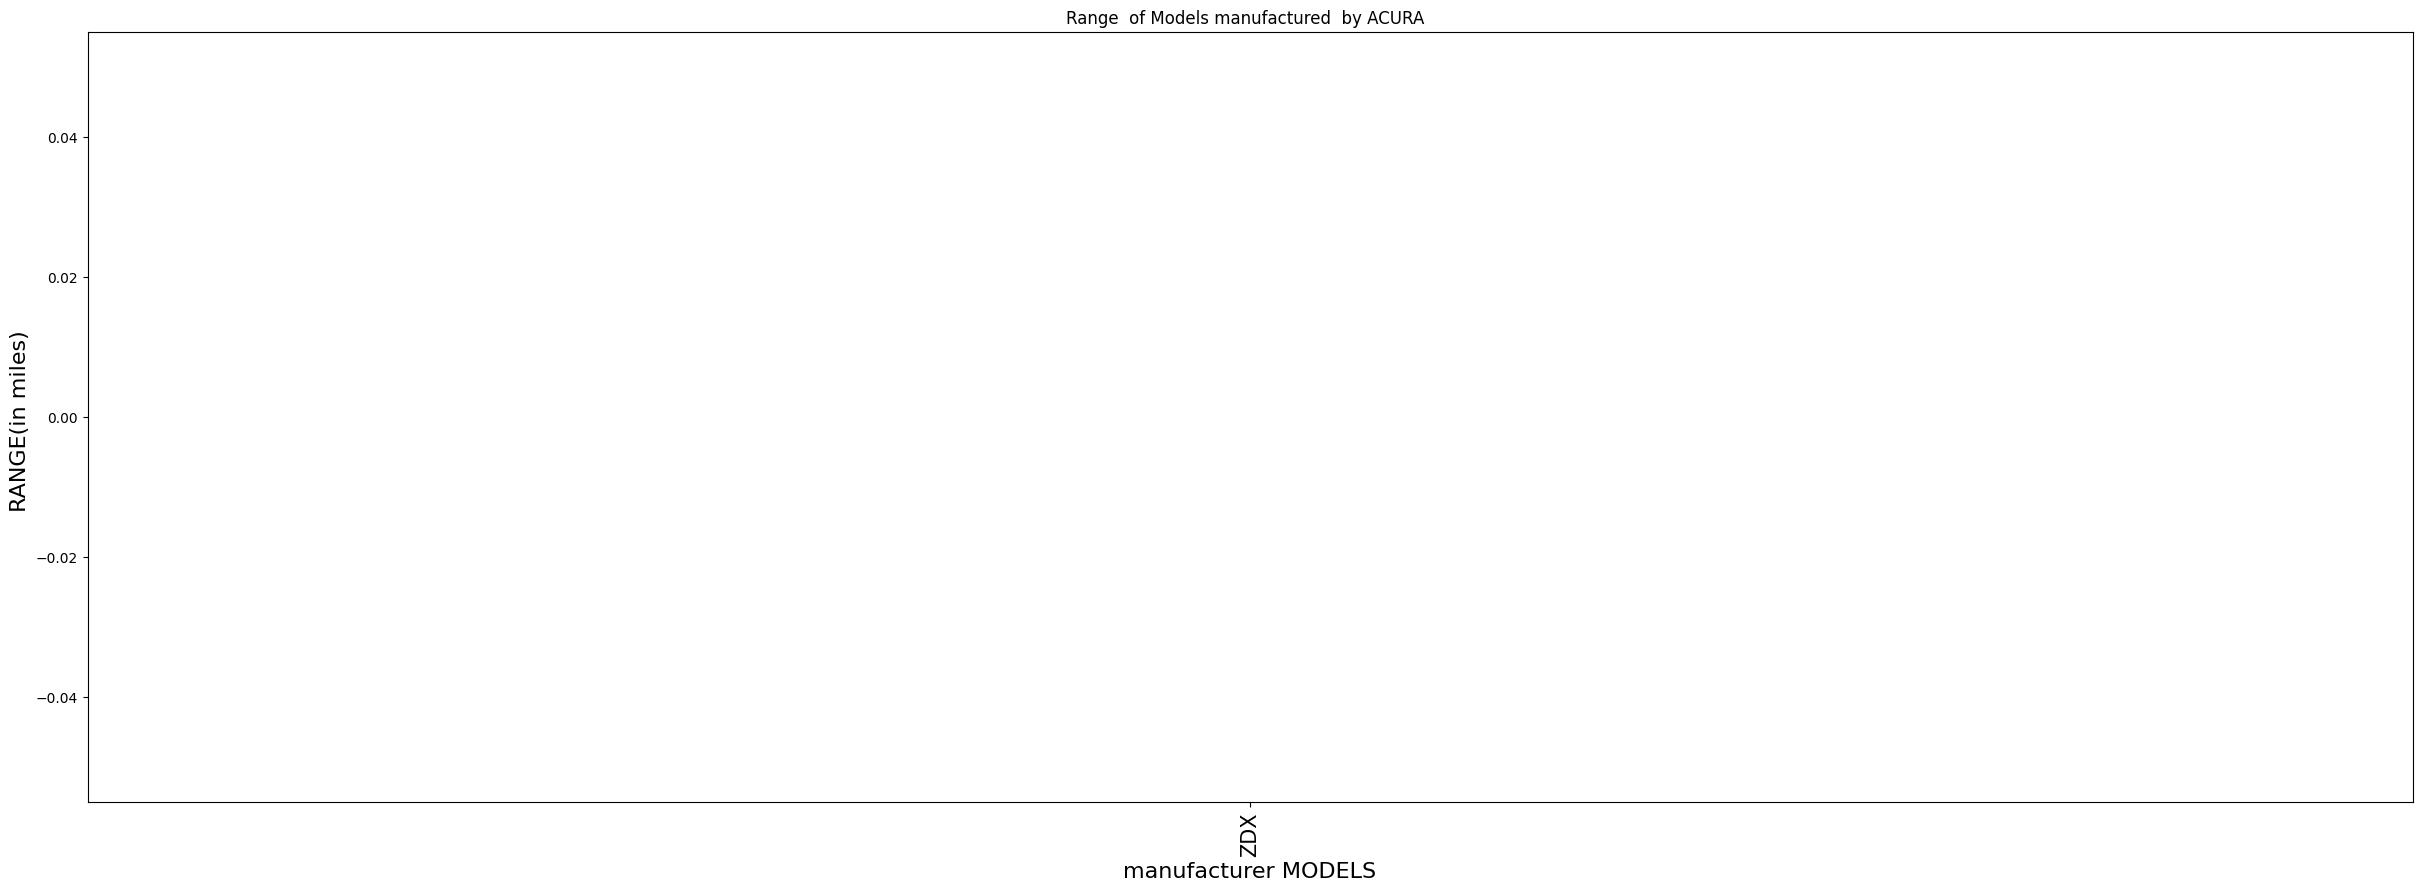

 Average electric range(miles) of TH!NK  is Electric Range    100.0
dtype: float64
       Model  Electric Range
14153   CITY           100.0
44914   CITY           100.0
108438  CITY           100.0
135148  CITY           100.0
142075  CITY           100.0


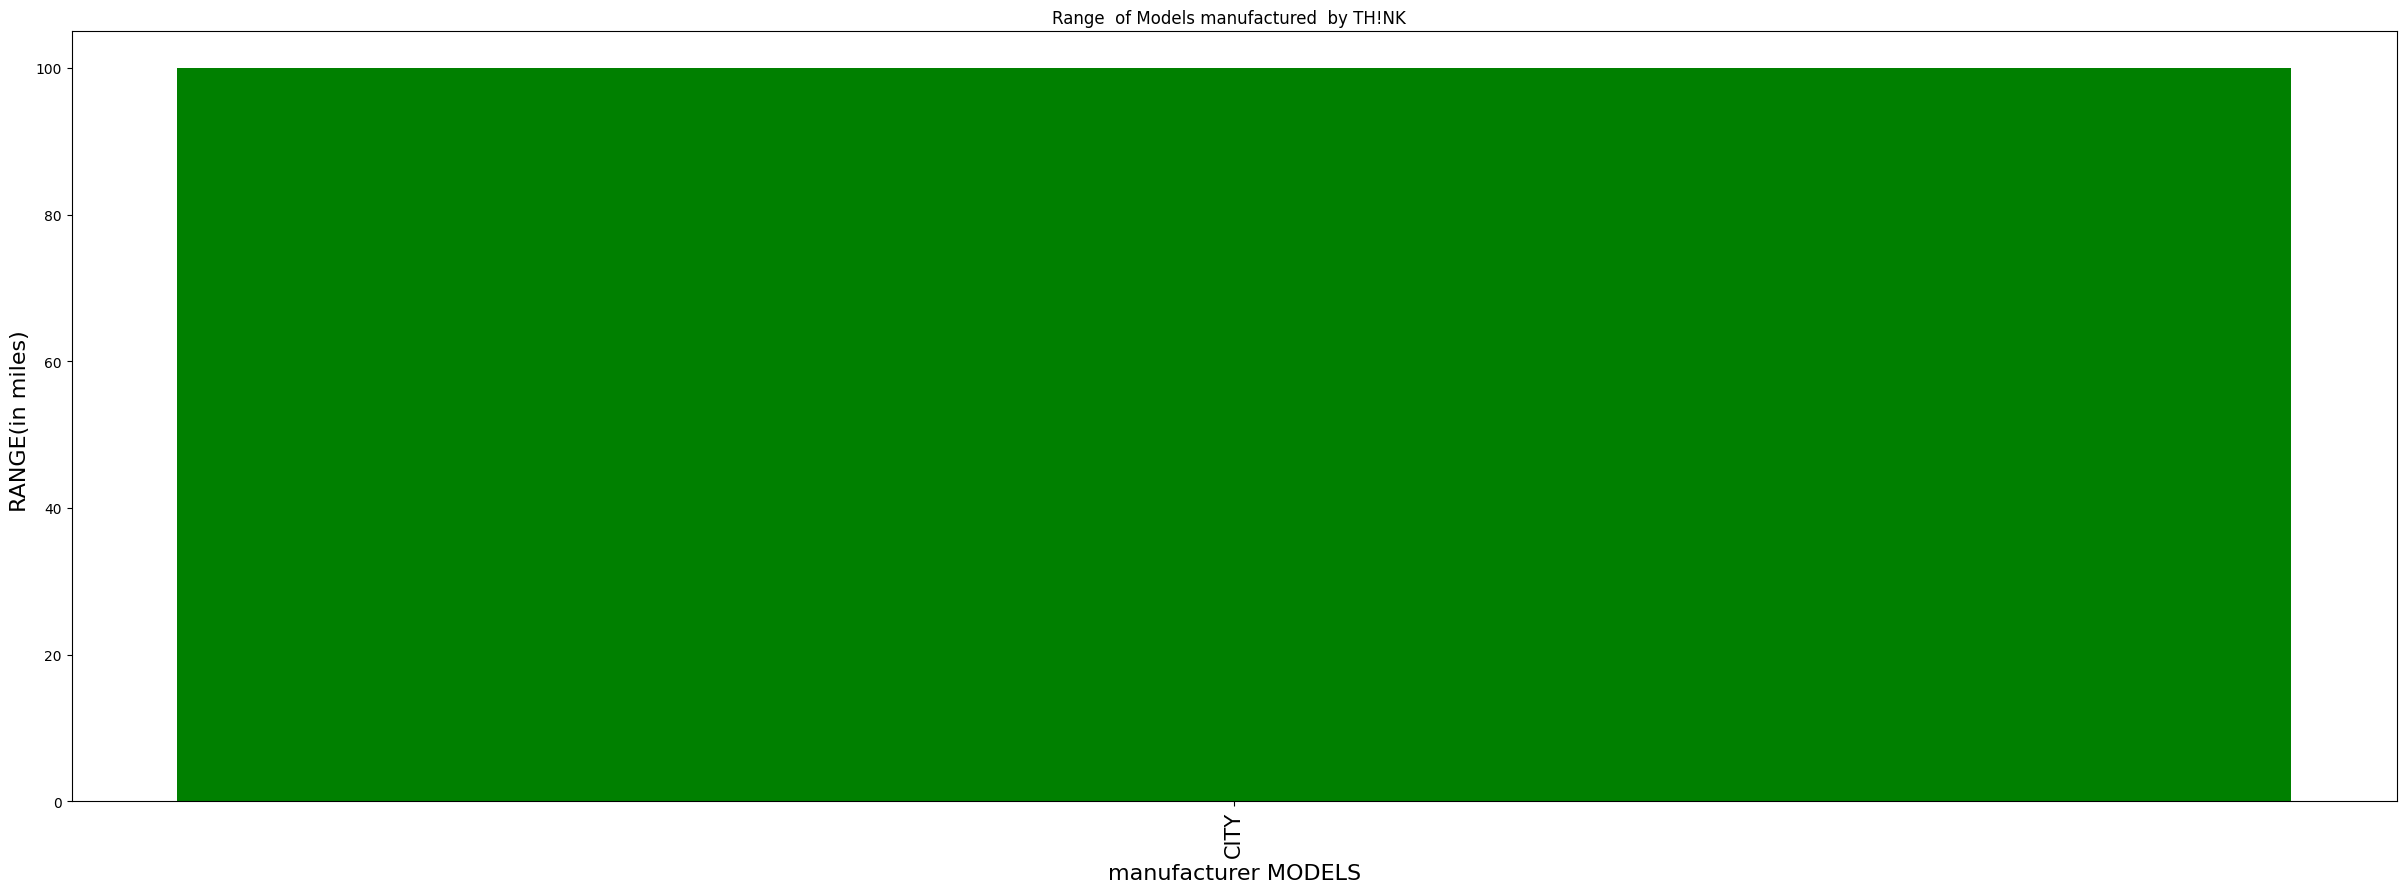

 Average electric range(miles) of AZURE DYNAMICS  is Electric Range    56.0
dtype: float64
                           Model  Electric Range
59255   TRANSIT CONNECT ELECTRIC            56.0
79977   TRANSIT CONNECT ELECTRIC            56.0
91758   TRANSIT CONNECT ELECTRIC            56.0
95924   TRANSIT CONNECT ELECTRIC            56.0
193274  TRANSIT CONNECT ELECTRIC            56.0


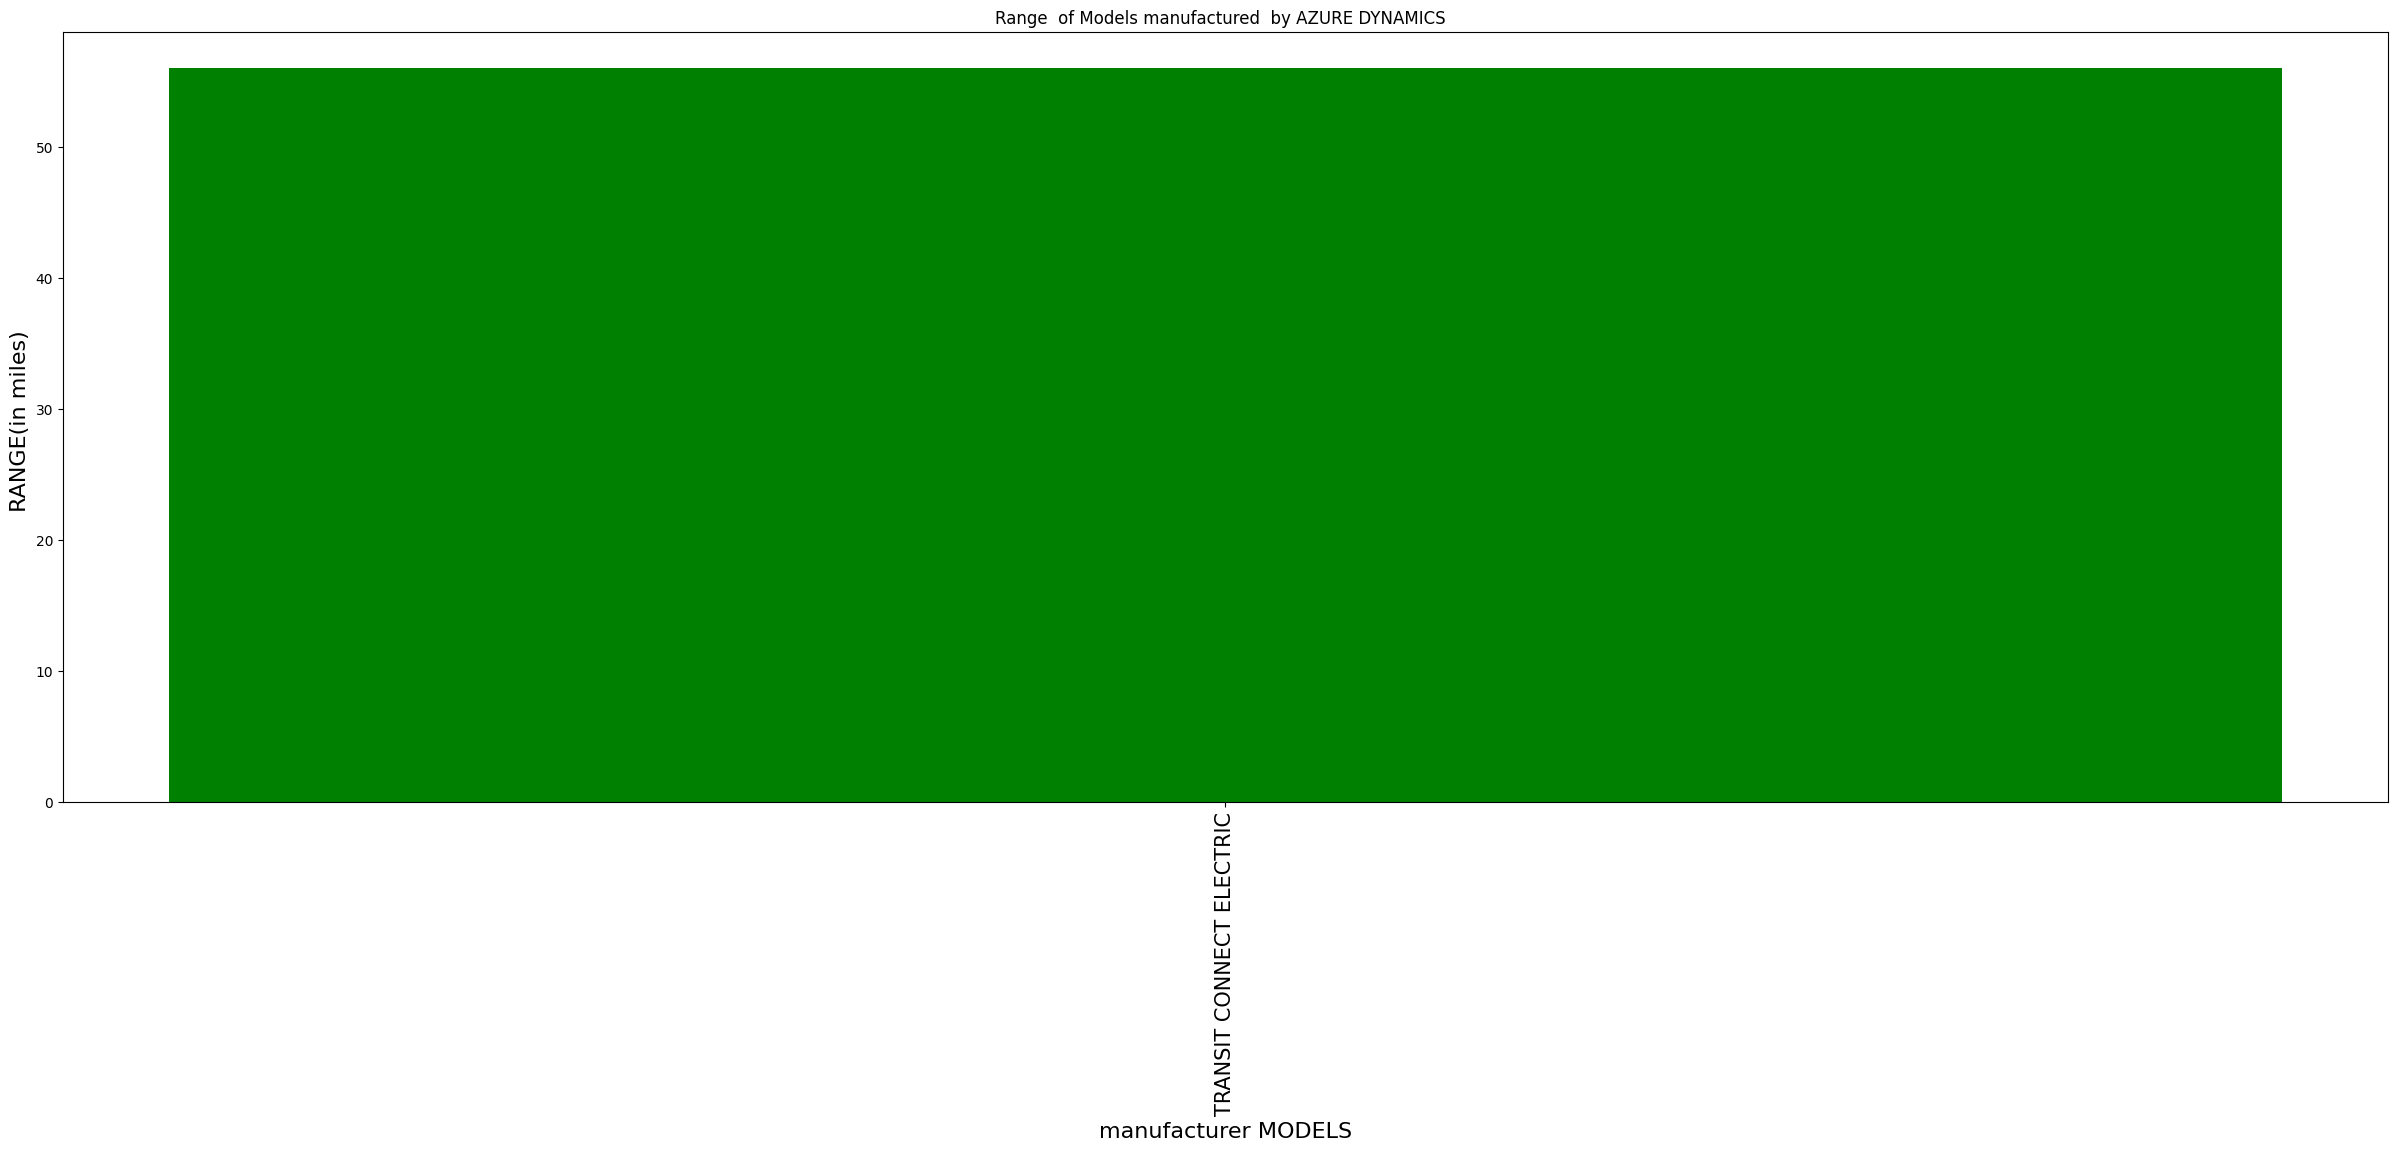

 Average electric range(miles) of BENTLEY  is Electric Range    21.75
dtype: float64
              Model  Electric Range
30715   FLYING SPUR            21.0
60611   FLYING SPUR            21.0
122090     BENTAYGA            28.0
126610     BENTAYGA            17.0


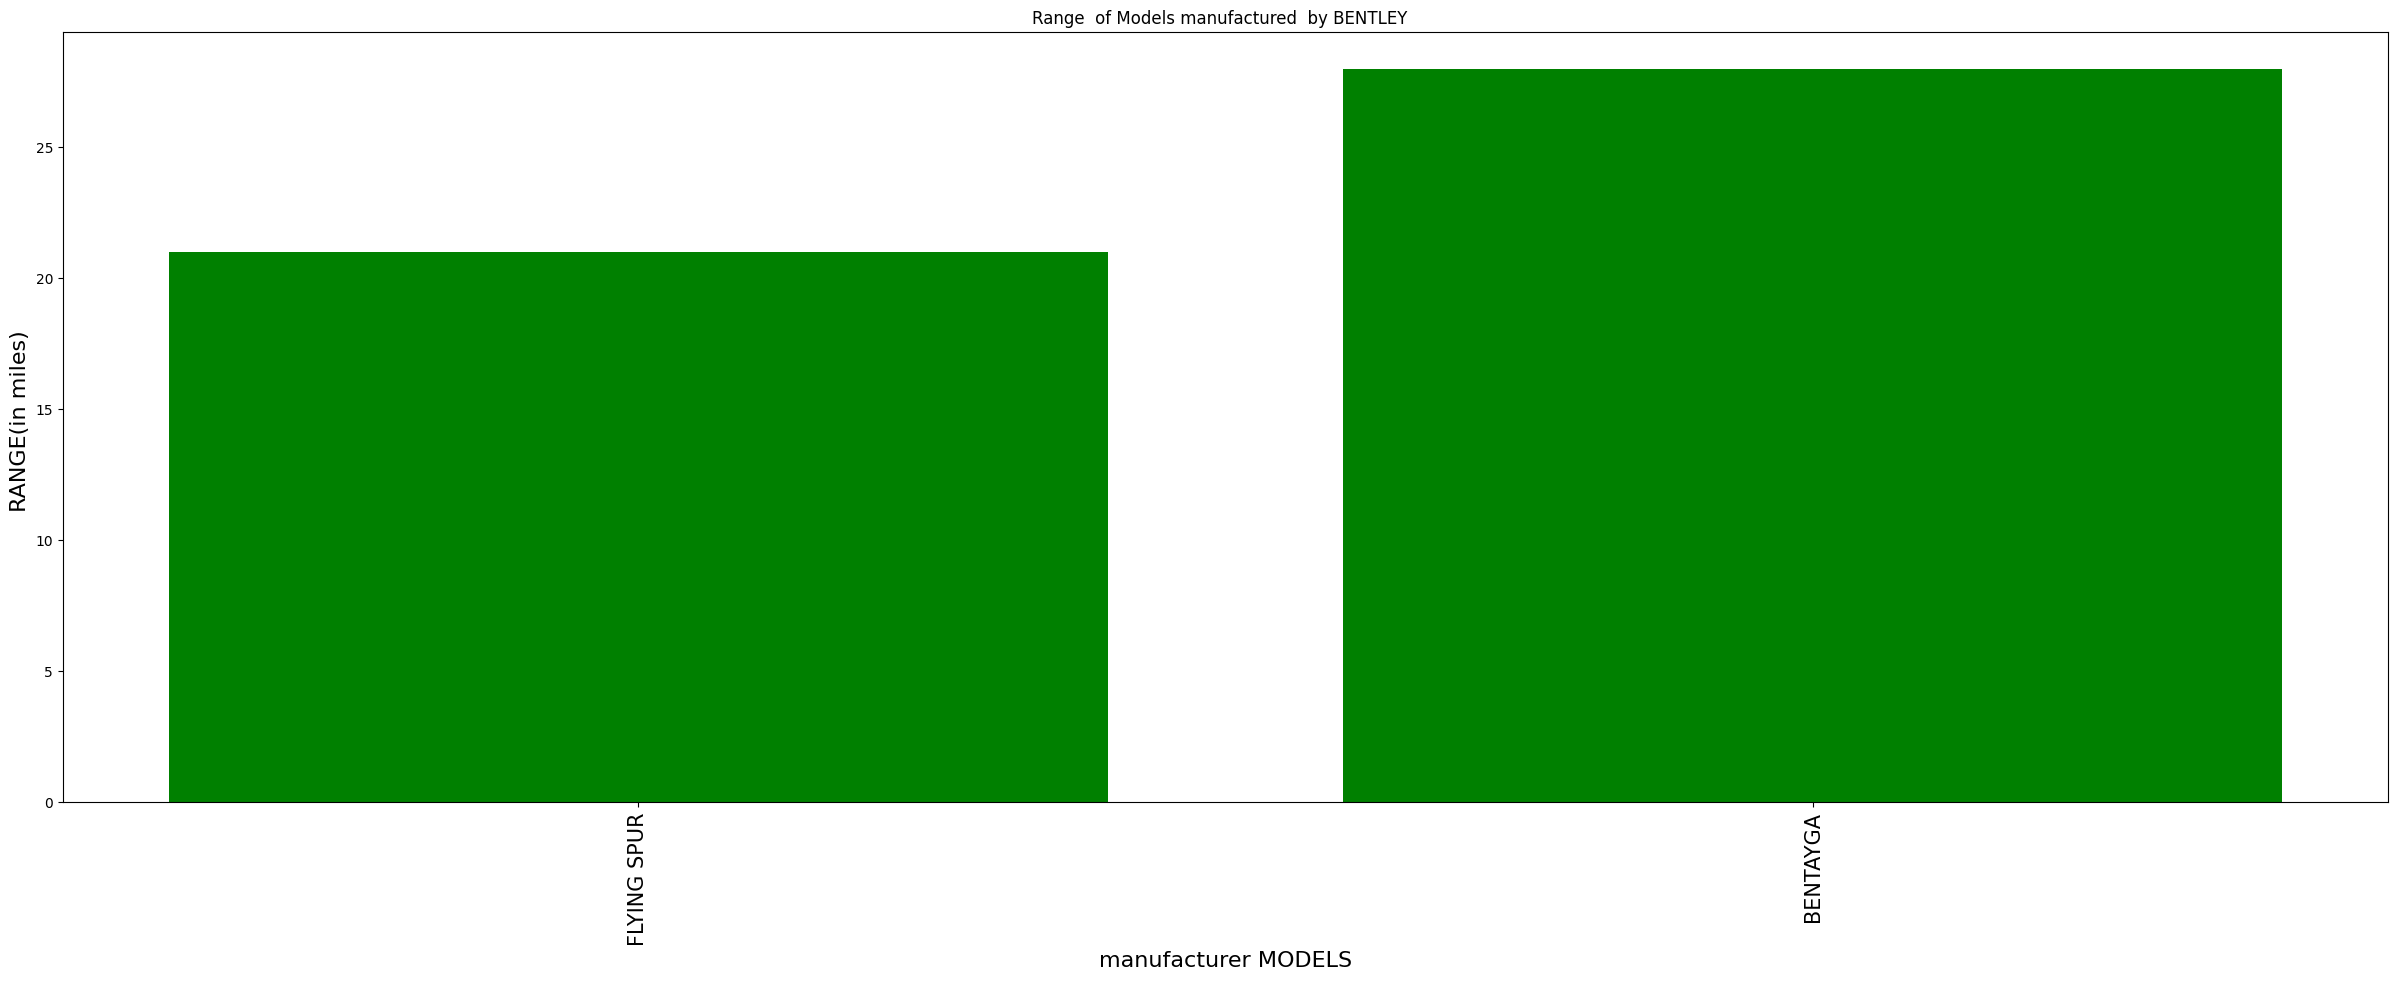

 Average electric range(miles) of WHEEGO ELECTRIC CARS  is Electric Range    100.0
dtype: float64
         Model  Electric Range
53212   WHEEGO           100.0
125243  WHEEGO           100.0
190397  WHEEGO           100.0


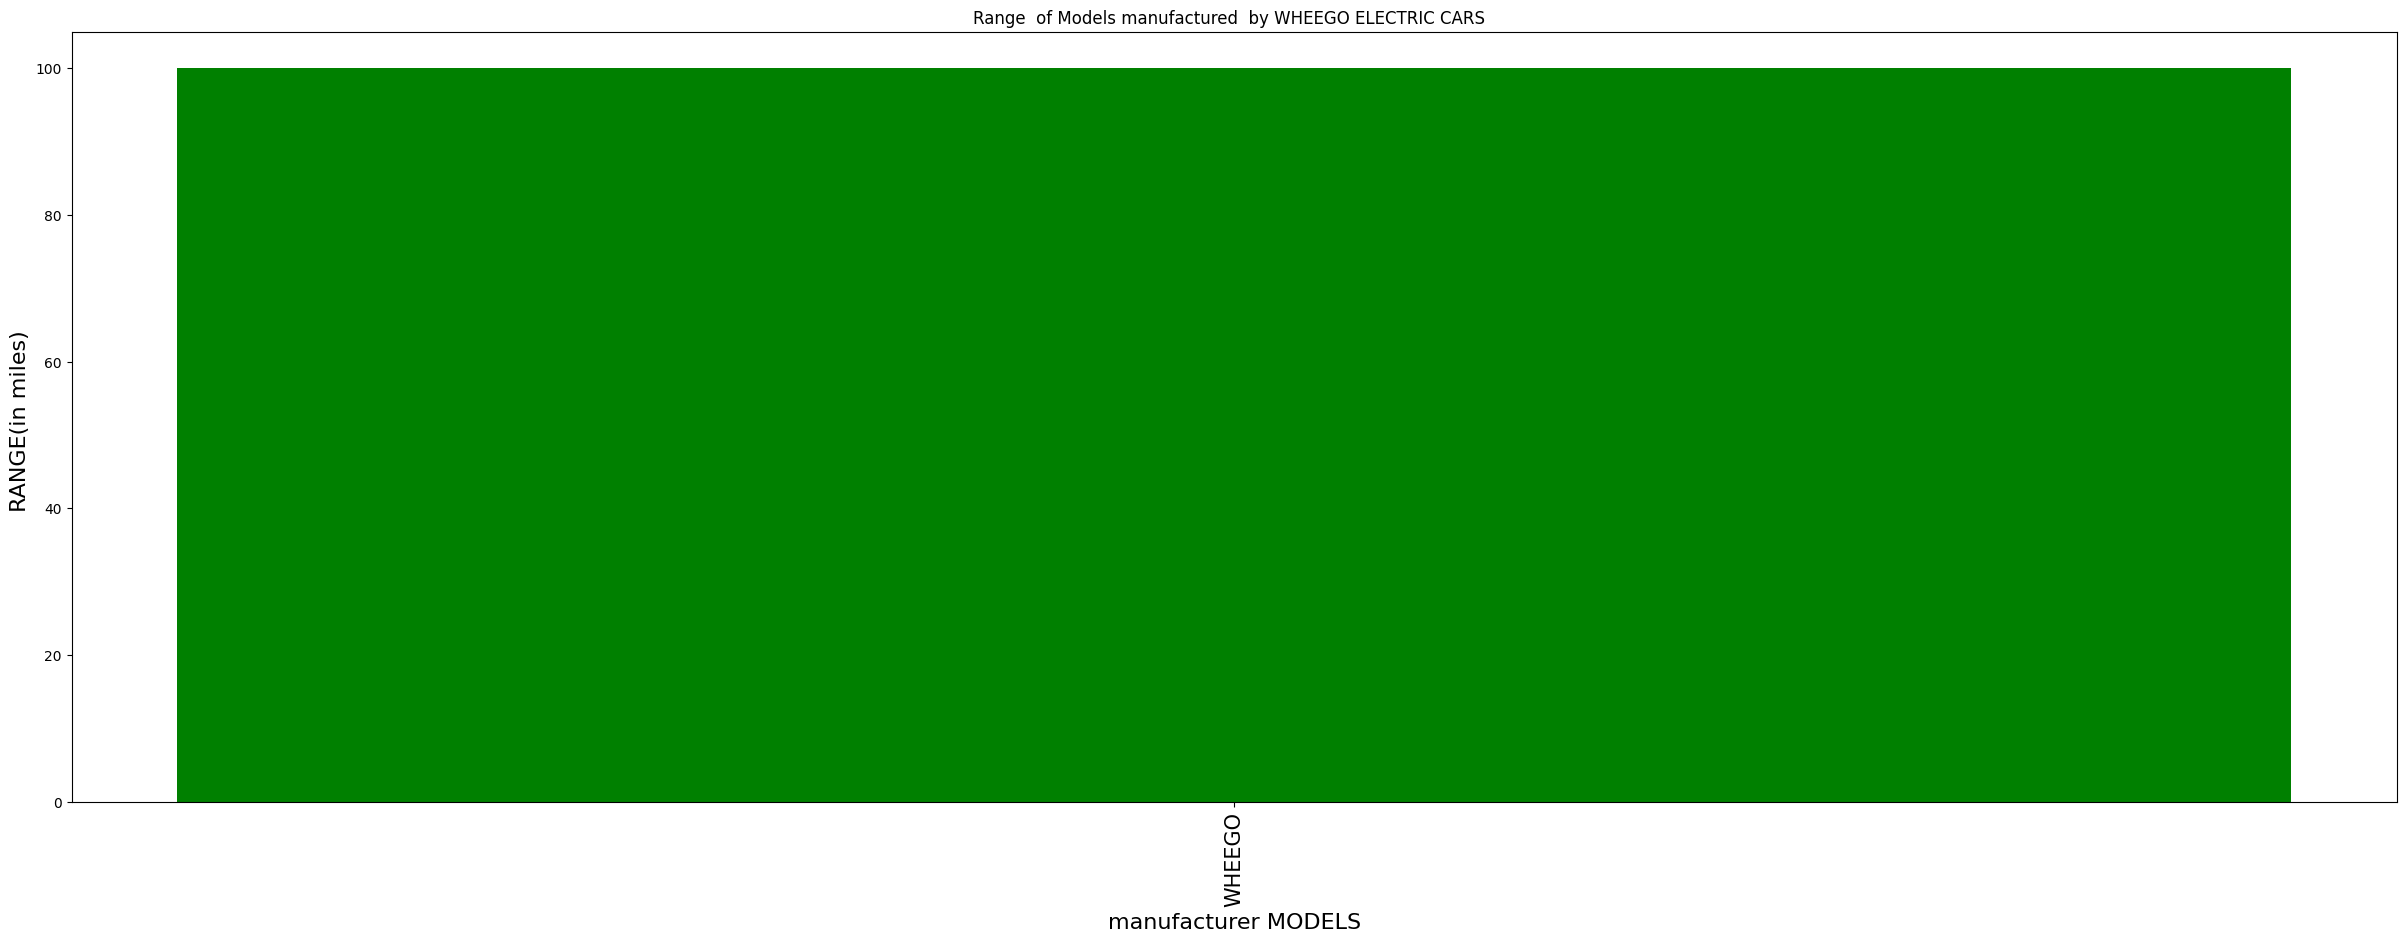

 Average electric range(miles) of ROLLS-ROYCE  is Electric Range    0.0
dtype: float64
          Model  Electric Range
43859   SPECTRE             0.0
134781  SPECTRE             0.0


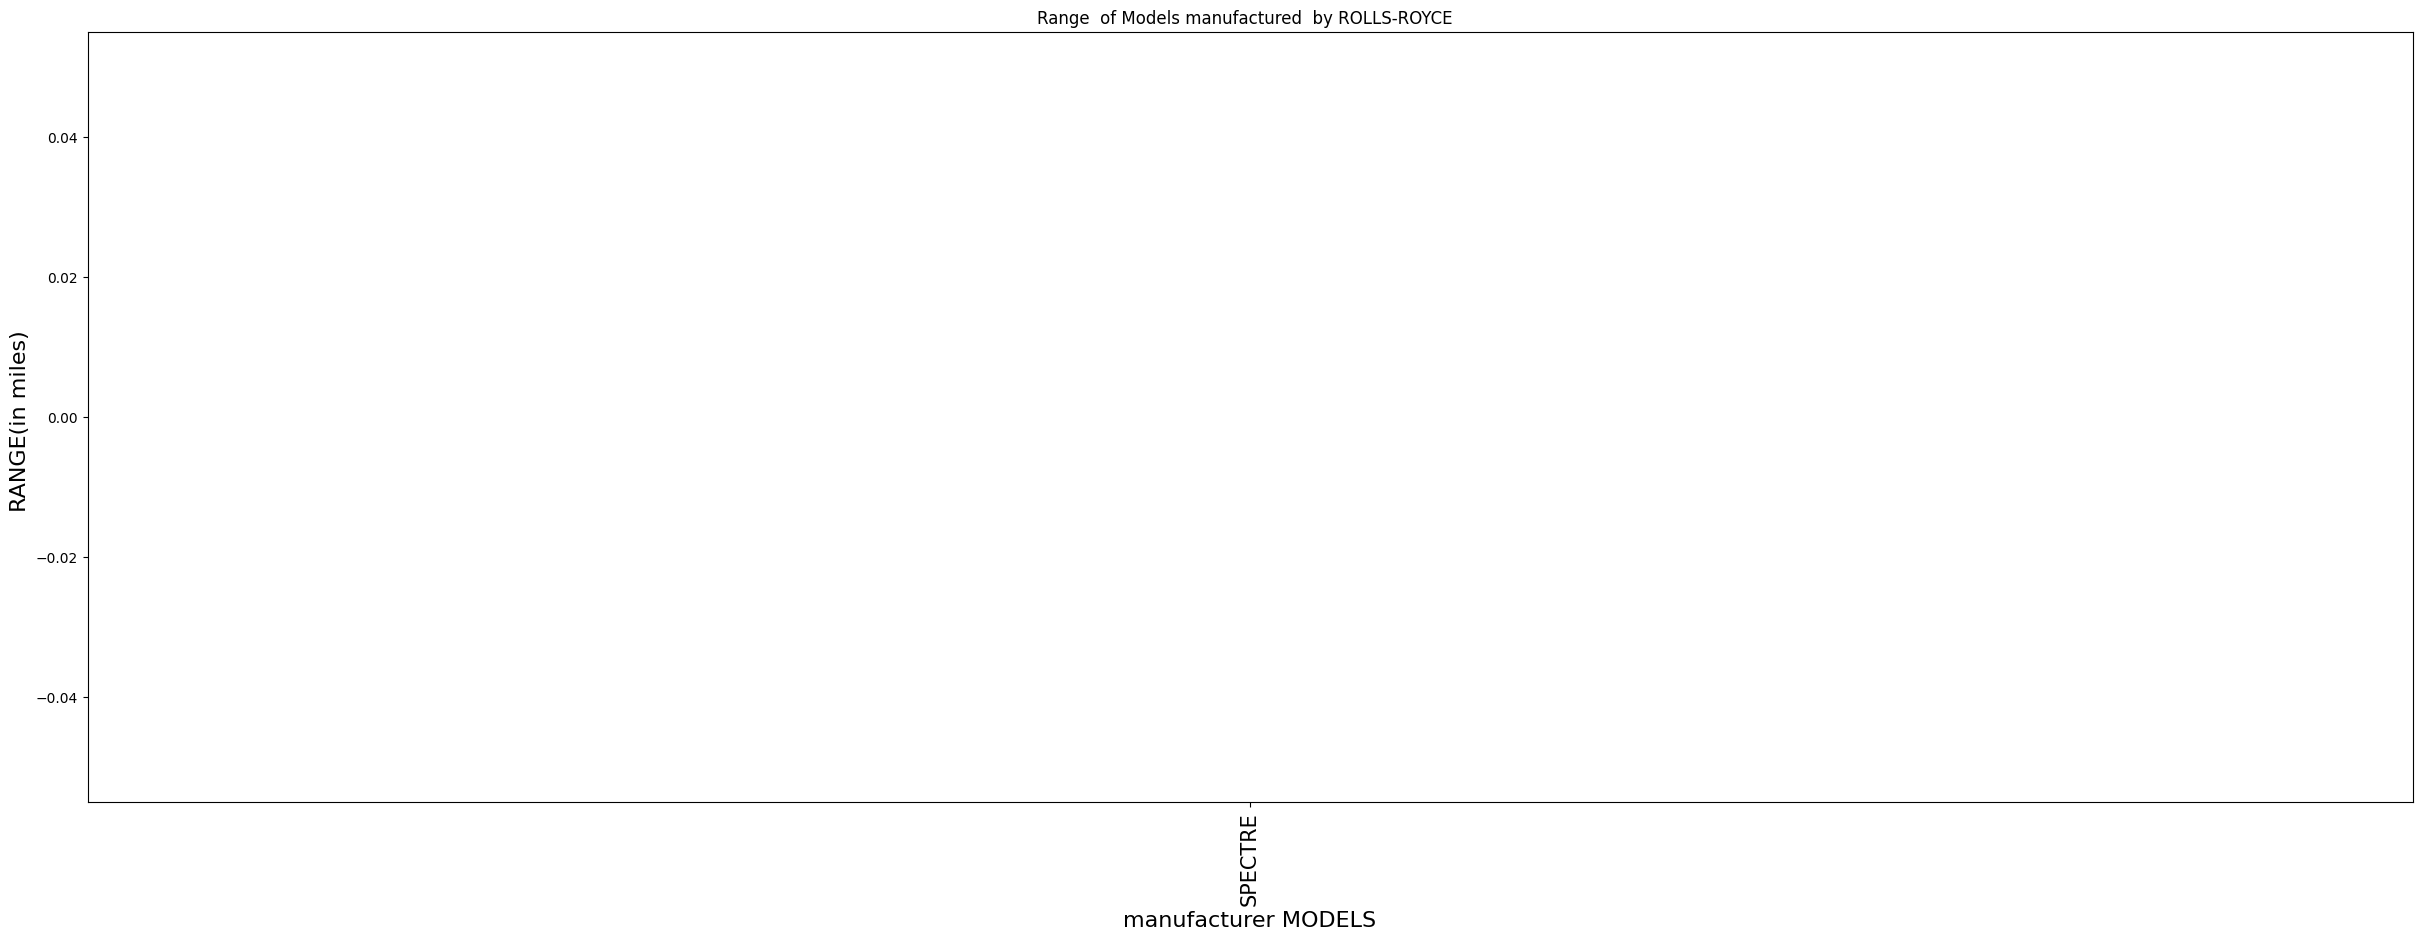

 Average electric range(miles) of RAM  is Electric Range    0.0
dtype: float64
                 Model  Electric Range
181539  PROMASTER 3500             0.0
184031  PROMASTER 3500             0.0


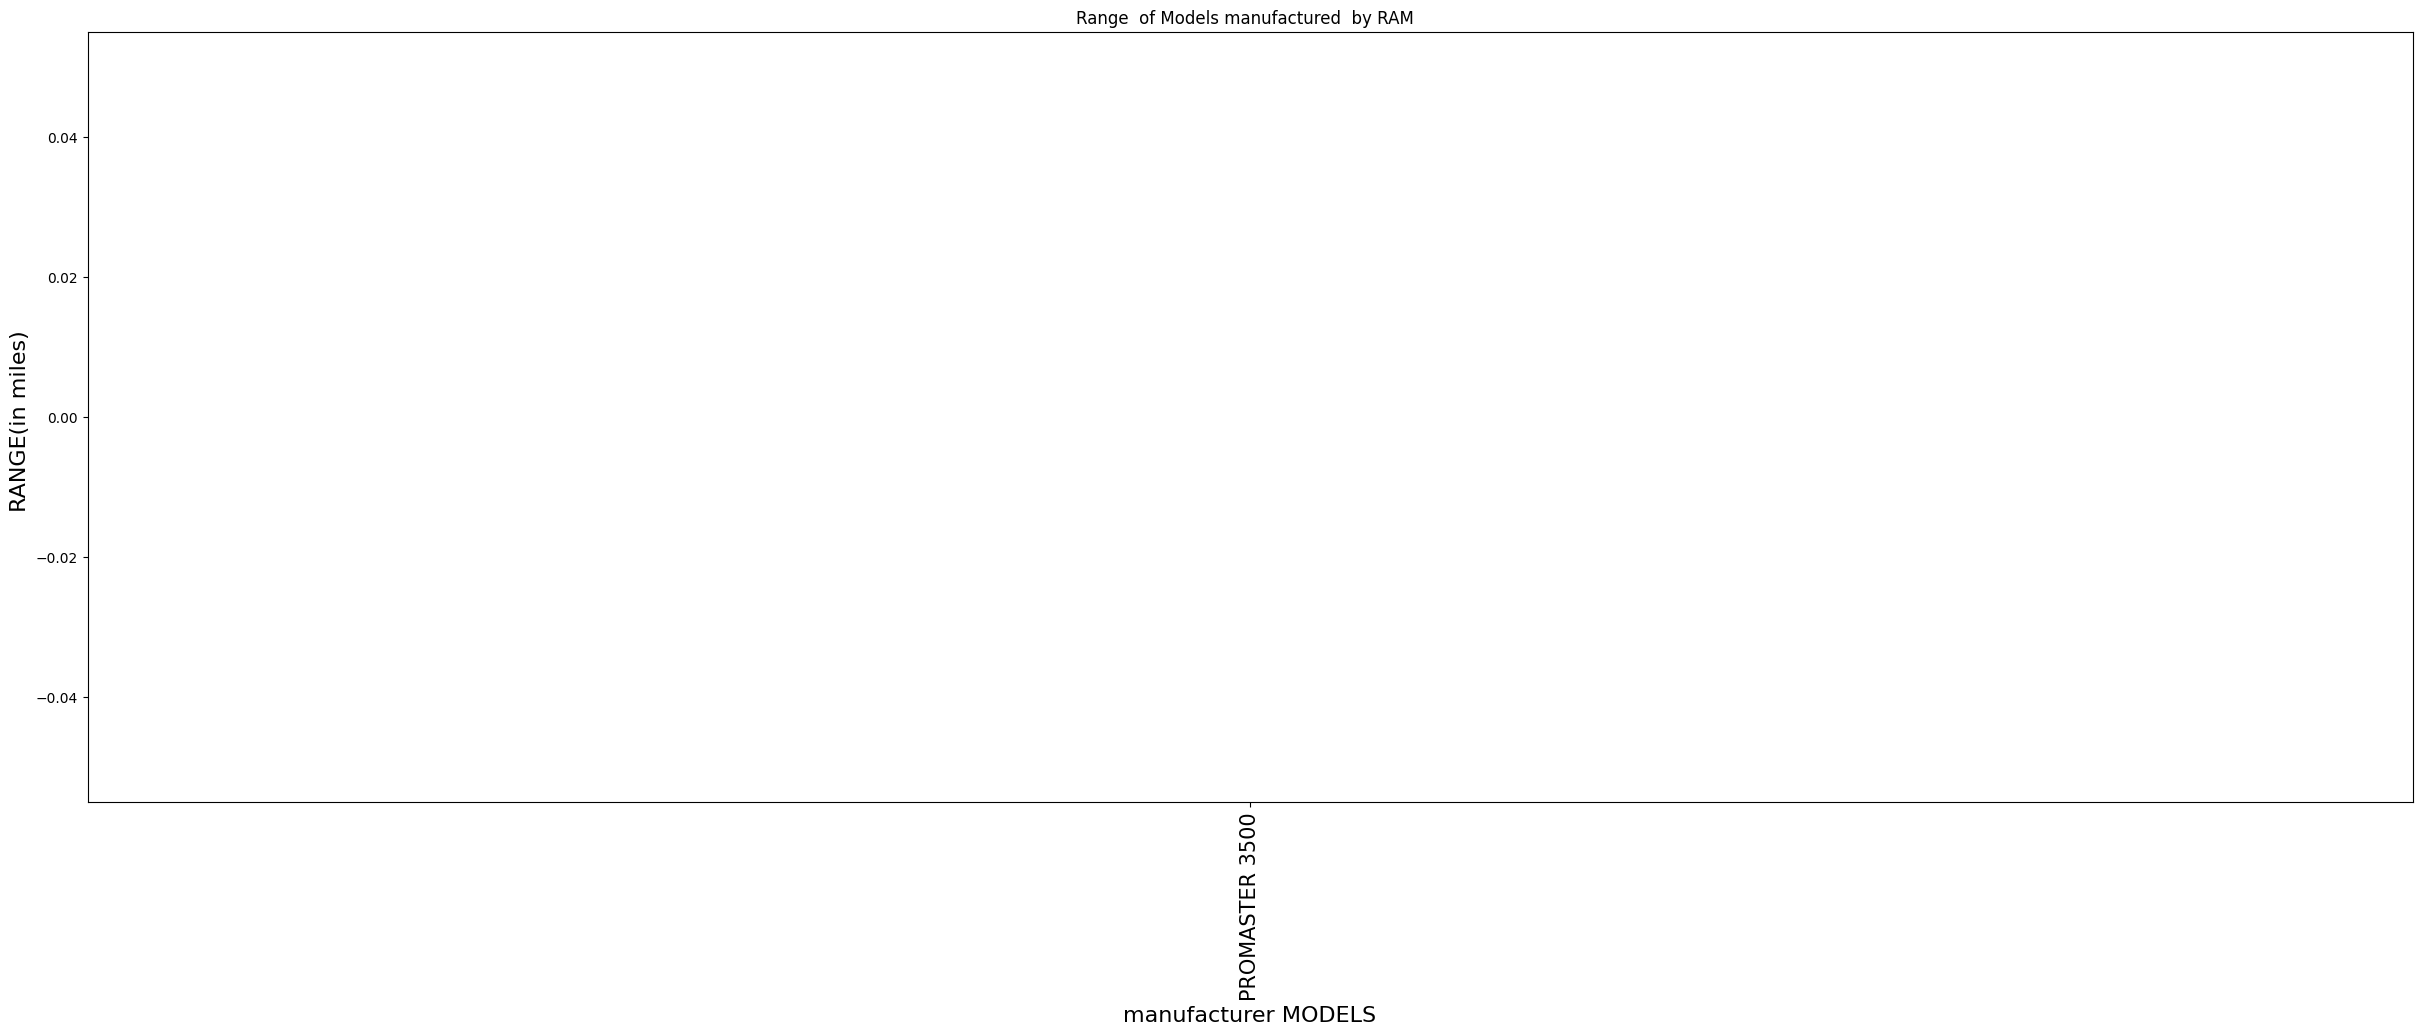

In [17]:
for i in data['Make'].value_counts().index:
    pp=data.groupby('Make')[['Electric Range']].get_group(i).mean()
    print(f" Average electric range(miles) of {i}  is {pp}")
    qq=data[data['Make']==i][['Model','Electric Range']]
    print(qq)
    plt.figure(figsize=(30, 10))
    plt.bar(qq['Model'],qq['Electric Range'],color=['g'])
    plt.xlabel("manufacturer MODELS",size=16)
    plt.ylabel(" RANGE(in miles)  ",size=16)
    plt.xticks(rotation=90,size=15)
    plt.title(f"Range  of Models manufactured  by {i}  ")
    plt.show()


What are the yearly trends in the registration of BEVs and PHEVs?

cars purchased in 2023 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            52165
Plug-in Hybrid Electric Vehicle (PHEV)     7500
Name: count, dtype: int64 


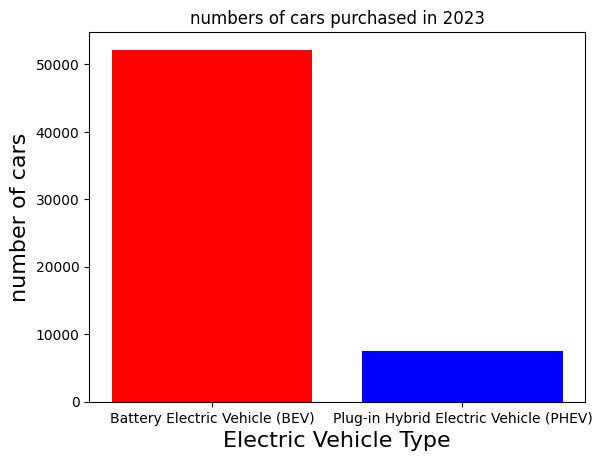

cars purchased in 2022 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            23730
Plug-in Hybrid Electric Vehicle (PHEV)     4426
Name: count, dtype: int64 


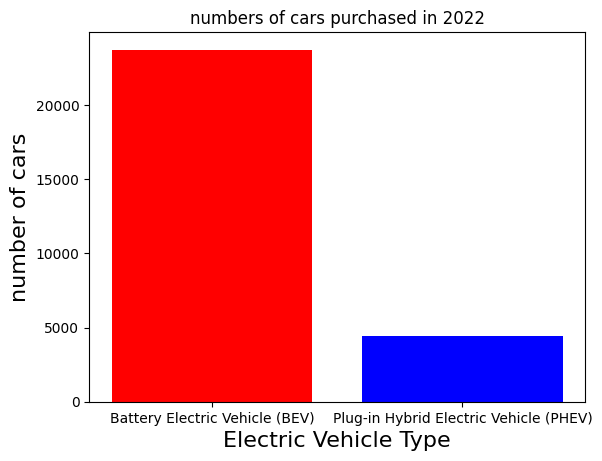

cars purchased in 2024 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            13793
Plug-in Hybrid Electric Vehicle (PHEV)     6481
Name: count, dtype: int64 


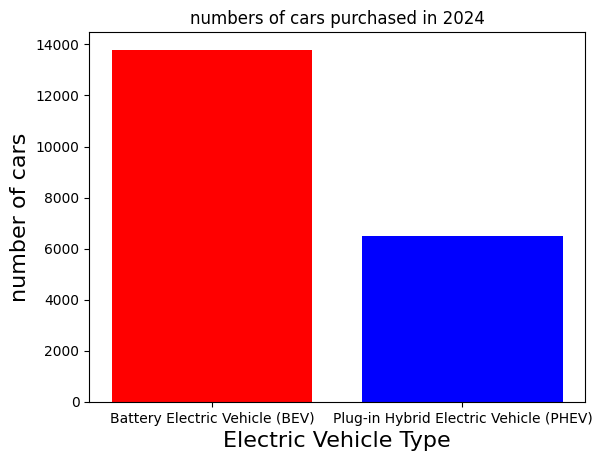

cars purchased in 2021 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            15394
Plug-in Hybrid Electric Vehicle (PHEV)     3922
Name: count, dtype: int64 


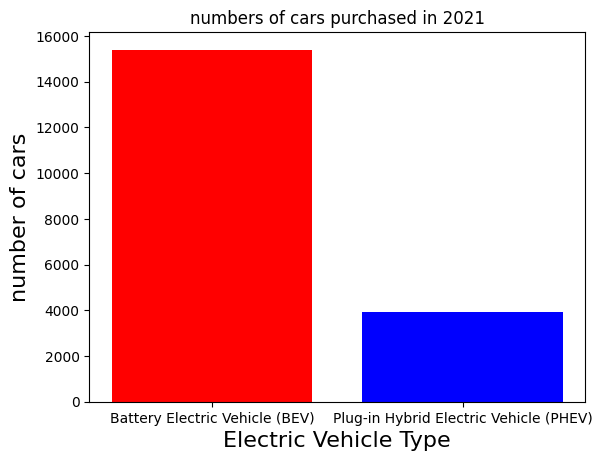

cars purchased in 2018 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            10076
Plug-in Hybrid Electric Vehicle (PHEV)     4376
Name: count, dtype: int64 


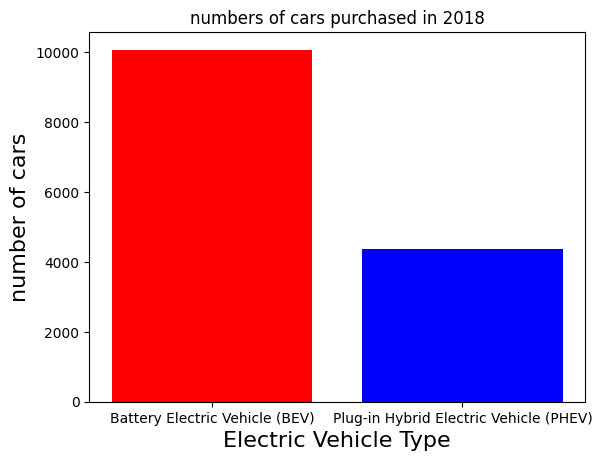

cars purchased in 2020 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            10255
Plug-in Hybrid Electric Vehicle (PHEV)     1834
Name: count, dtype: int64 


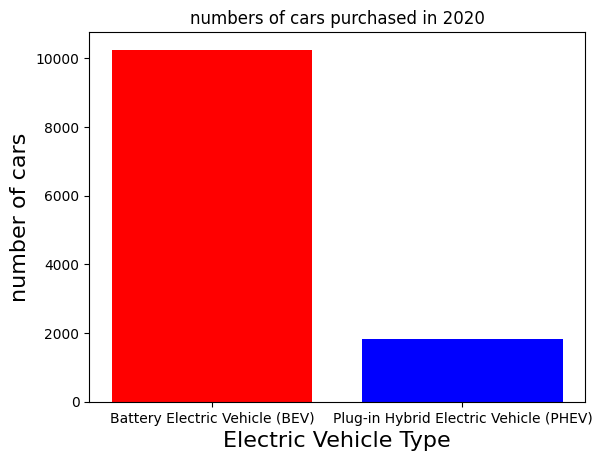

cars purchased in 2019 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            8875
Plug-in Hybrid Electric Vehicle (PHEV)    2031
Name: count, dtype: int64 


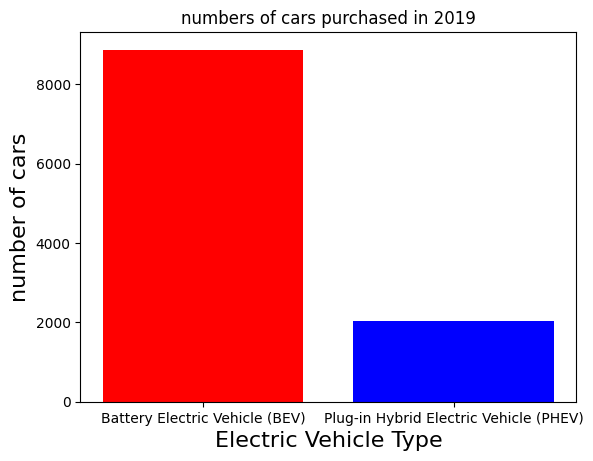

cars purchased in 2017 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            4588
Plug-in Hybrid Electric Vehicle (PHEV)    4075
Name: count, dtype: int64 


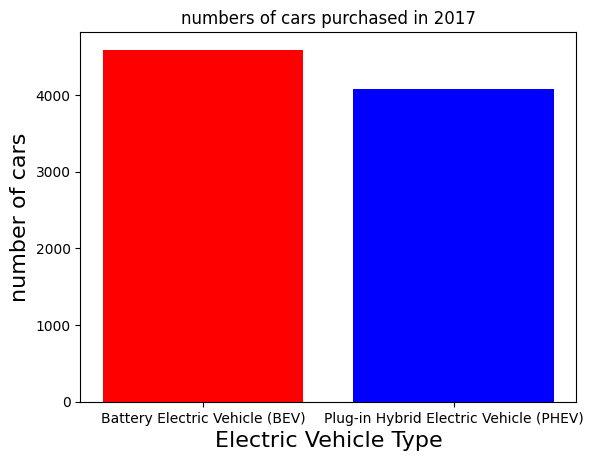

cars purchased in 2016 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            3785
Plug-in Hybrid Electric Vehicle (PHEV)    1762
Name: count, dtype: int64 


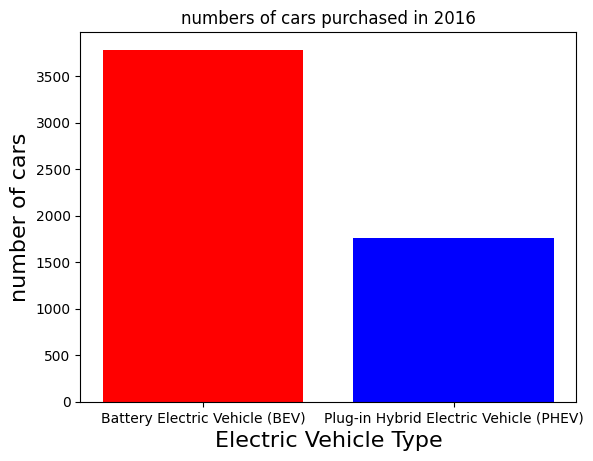

cars purchased in 2015 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            3489
Plug-in Hybrid Electric Vehicle (PHEV)    1308
Name: count, dtype: int64 


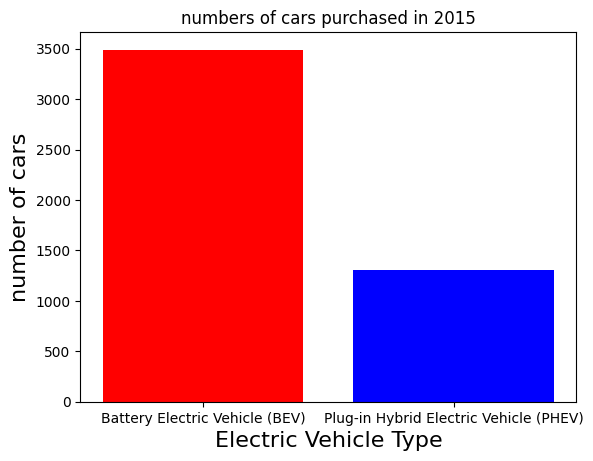

cars purchased in 2013 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            2806
Plug-in Hybrid Electric Vehicle (PHEV)    1590
Name: count, dtype: int64 


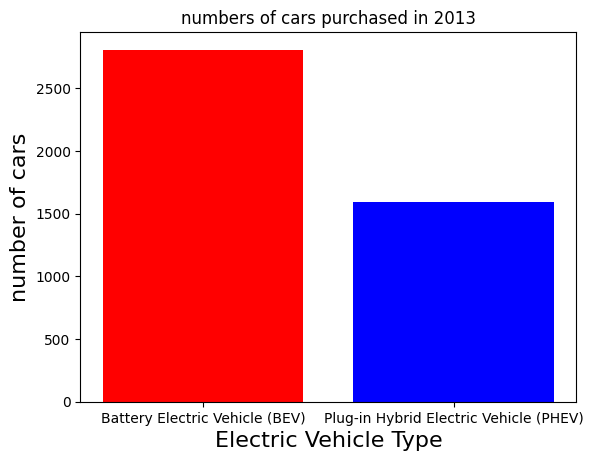

cars purchased in 2014 are Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)    1792
Battery Electric Vehicle (BEV)            1746
Name: count, dtype: int64 


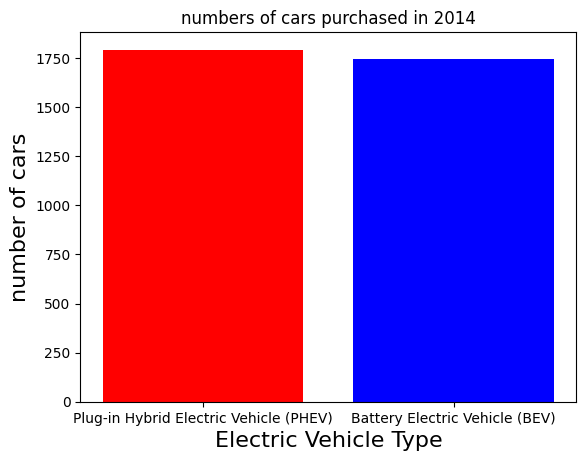

cars purchased in 2012 are Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)    855
Battery Electric Vehicle (BEV)            739
Name: count, dtype: int64 


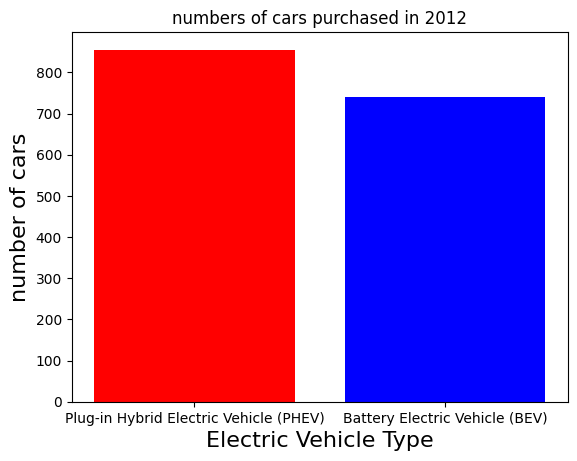

cars purchased in 2011 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            662
Plug-in Hybrid Electric Vehicle (PHEV)     68
Name: count, dtype: int64 


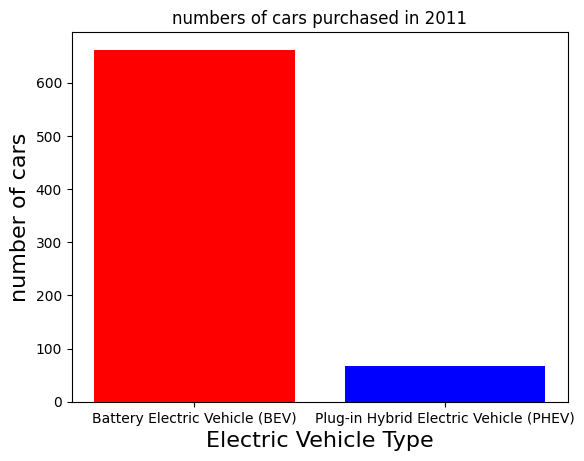

cars purchased in 2025 are Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)    30
Battery Electric Vehicle (BEV)            18
Name: count, dtype: int64 


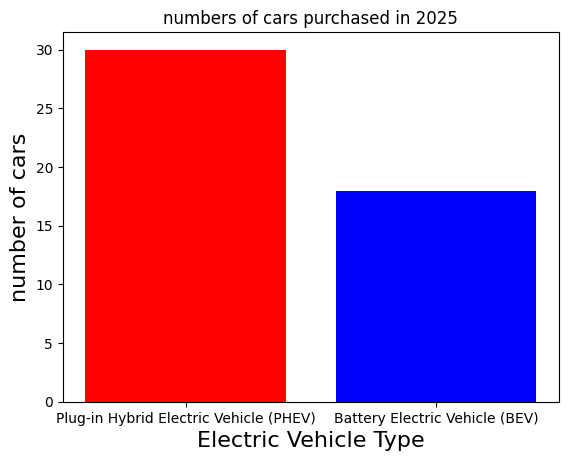

cars purchased in 2010 are Electric Vehicle Type
Battery Electric Vehicle (BEV)            21
Plug-in Hybrid Electric Vehicle (PHEV)     3
Name: count, dtype: int64 


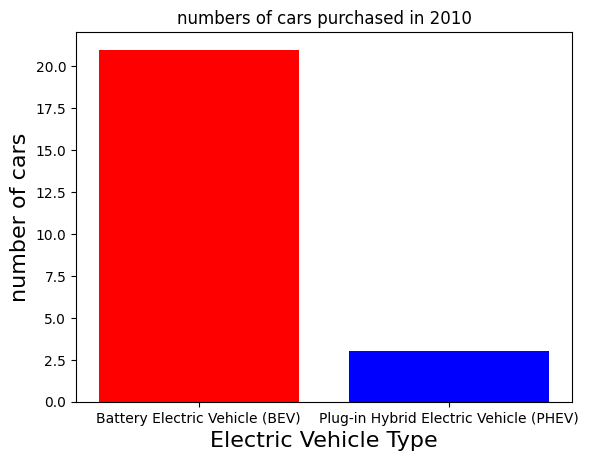

cars purchased in 2008 are Electric Vehicle Type
Battery Electric Vehicle (BEV)    21
Name: count, dtype: int64 


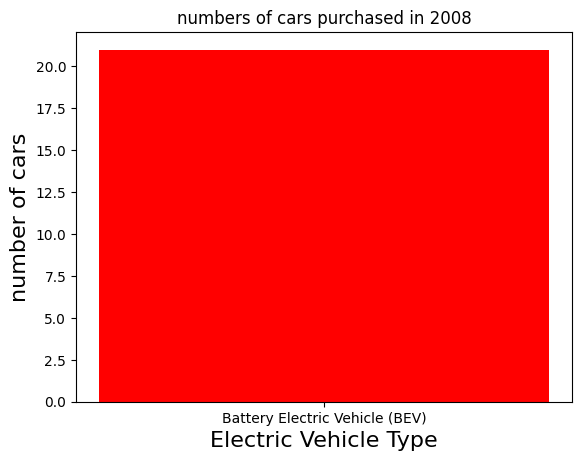

cars purchased in 2000 are Electric Vehicle Type
Battery Electric Vehicle (BEV)    7
Name: count, dtype: int64 


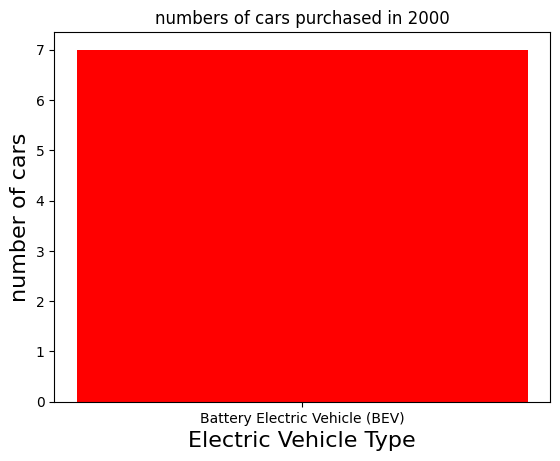

cars purchased in 1999 are Electric Vehicle Type
Battery Electric Vehicle (BEV)    5
Name: count, dtype: int64 


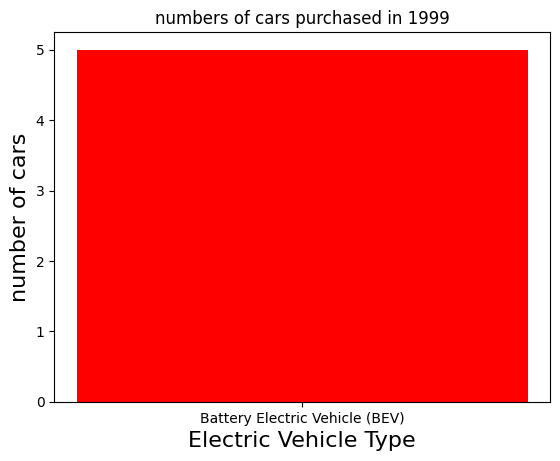

cars purchased in 2002 are Electric Vehicle Type
Battery Electric Vehicle (BEV)    2
Name: count, dtype: int64 


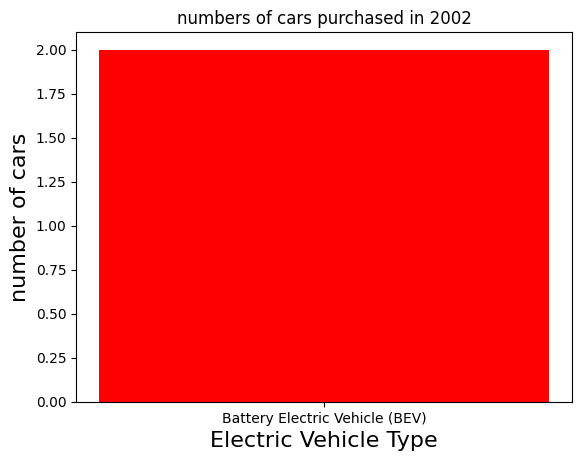

cars purchased in 1997 are Electric Vehicle Type
Battery Electric Vehicle (BEV)    1
Name: count, dtype: int64 


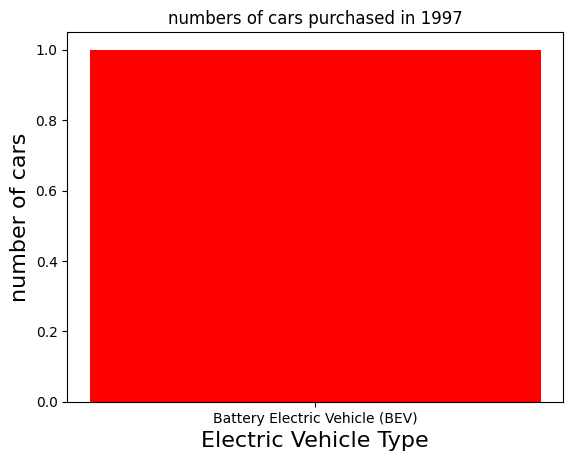

cars purchased in 2003 are Electric Vehicle Type
Battery Electric Vehicle (BEV)    1
Name: count, dtype: int64 


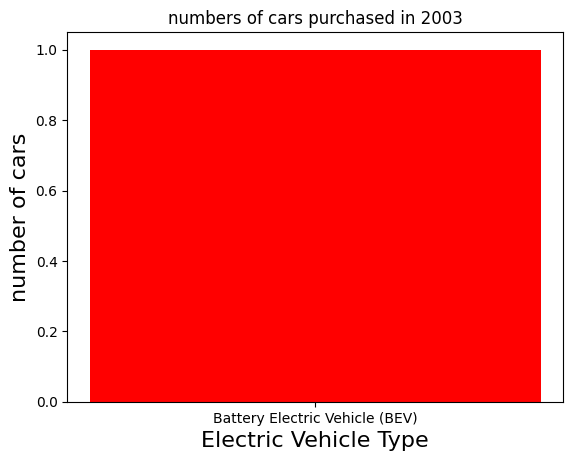

In [23]:
year=data['Model Year'].value_counts()
for i in year.index:
    ytinbp=data.groupby('Model Year')[['Make','Electric Vehicle Type']].get_group(i)
    ytinbpp=ytinbp['Electric Vehicle Type'].value_counts()
    print(f"cars purchased in {i} are {ytinbpp} ")
    plt.bar(ytinbpp.index,ytinbpp.values,color=['r','b'])
    plt.xlabel("Electric Vehicle Type",size=16)
    plt.ylabel("number of cars",size=16)
    plt.xticks(rotation=0)
    plt.title(f"numbers of cars purchased in {i}")
    plt.show()
    

How have the trends in BEV and PHEV registrations changed over the past five years?

cars purchased in 2025 are 48
cars purchased in 2024 are 20274
cars purchased in 2023 are 59665
cars purchased in 2022 are 28156
cars purchased in 2021 are 19316


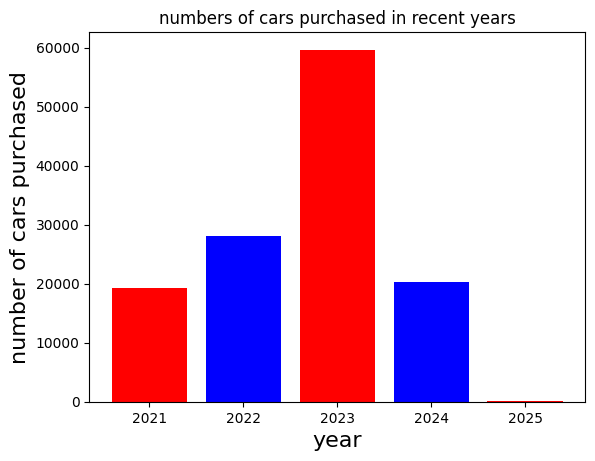

In [32]:
year=data['Model Year'].value_counts().sort_index(ascending=False).index[:5]
l1=[]
l2=[]
for i in year:
    ytinbpp=data.groupby('Model Year')[['Make','Electric Vehicle Type']].get_group(i)
    ytinbppp=ytinbpp['Electric Vehicle Type'].value_counts()

    aa=ytinbppp.values.sum()
    print(f"cars purchased in {i} are {aa}")
    l1.append(aa)
    l2.append(i)

plt.bar(l2,l1,color=['r','b'])
plt.xlabel("year",size=16)
plt.ylabel("number of cars purchased",size=16)
plt.xticks(rotation=0)
plt.title(f"numbers of cars purchased in recent years")
plt.show()
    

Clean Alternative Fuel Vehicle (CAFV) Eligibility  

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    104636
Clean Alternative Fuel Vehicle Eligible                          68816
Not eligible due to low battery range                            20780
Name: count, dtype: int64


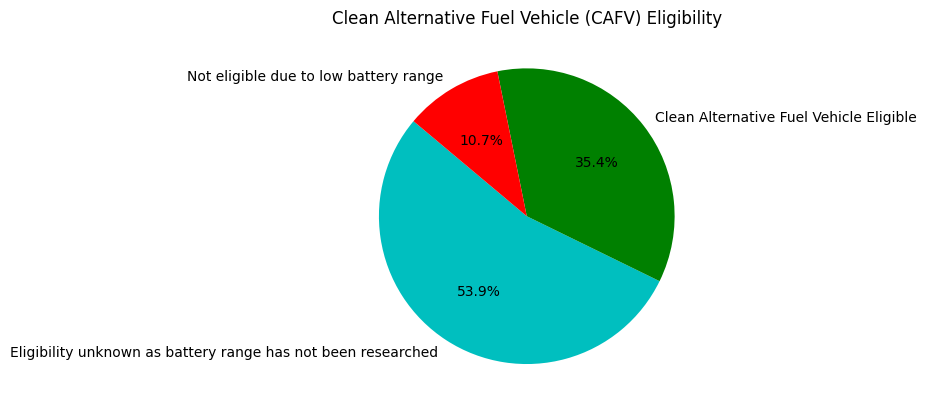

In [39]:
p=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(p)
plt.pie(p.values, labels=p.index, autopct='%1.1f%%', startangle=140,colors=['c','g','r'])
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()


BEVs Clean Alternative Fuel Vehicle (CAFV) Eligibility  

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    104636
Clean Alternative Fuel Vehicle Eligible                          47535
Not eligible due to low battery range                                8
Name: count, dtype: int64


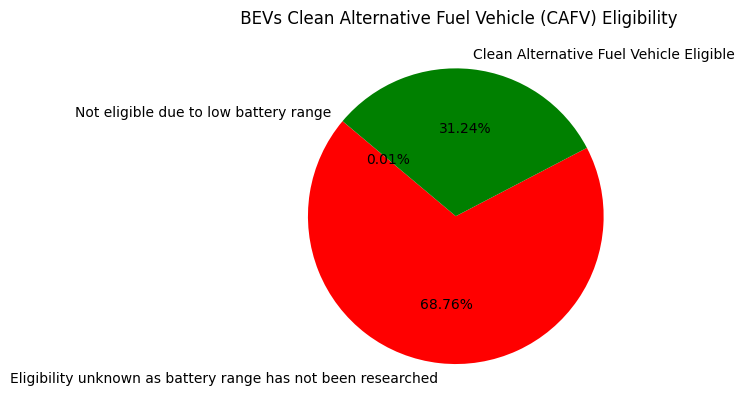

In [47]:
beccc=data[data['Electric Vehicle Type']=="Battery Electric Vehicle (BEV)"]['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(beccc)
plt.pie(beccc.values, labels=beccc.index, autopct='%.2f%%', startangle=140,colors=['r','g'])
plt.title(' BEVs Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()


PHEVs Clean Alternative Fuel Vehicle (CAFV) Eligibility  

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible    21281
Not eligible due to low battery range      20772
Name: count, dtype: int64


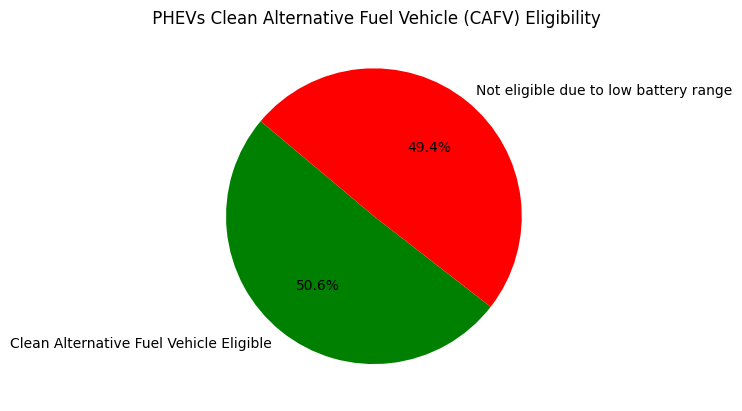

In [48]:
pheccc=data[data['Electric Vehicle Type']=="Plug-in Hybrid Electric Vehicle (PHEV)"]['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(pheccc)
plt.pie(pheccc.values, labels=pheccc.index, autopct='%1.1f%%', startangle=140,colors=['g','r'])
plt.title(' PHEVs Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()
